In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/home/xupeng/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
from ipywidgets import interact,Dropdown,IntSlider,FloatRangeSlider, FloatSlider, RadioButtons
rc('animation', html='html5')

In [3]:
colorsgallery  = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229),
            (240,128,128),(233,150,122),(250,128,114),(255,160,122),
            (50,205,50),(144,238,144),(152,251,152),(143,188,143),
            (0,250,154),(0,255,127),(102,205,170),(60,179,113),
            (70,130,180),(100,149,237),(0,191,255),(30,144,255),
            (173,216,230),(135,206,235),(199,21,133),(219,112,147),
            (255,20,147),(255,105,180),(255,182,193),(255,192,203),(250,235,215),
                          (31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229),
            (240,128,128),(233,150,122),(250,128,114),(255,160,122),
            (50,205,50),(144,238,144),(152,251,152),(143,188,143),
            (0,250,154),(0,255,127),(102,205,170),(60,179,113),
            (70,130,180),(100,149,237),(0,191,255),(30,144,255),
            (173,216,230),(135,206,235),(199,21,133),(219,112,147),
            (255,20,147),(255,105,180),(255,182,193),(255,192,203),(250,235,215)])/255.

In [4]:
cd /home/xupeng/projects/membrane/

/home/xupeng/projects/membrane


In [5]:
ls data/

mip1/  mip2/  mip3/  mip4/  train/


In [8]:
print (scipy.misc.imread('data/mip1/png/Bundle_1_2_merged_EM_VAST.vsseg_export_s0200.png').shape,
scipy.misc.imread('data/mip2/Bundle_1_2_merged_EM_VAST.vsseg_export_s0200.png').shape,
scipy.misc.imread('data/mip3/Bundle_1_2_merged_EM_VAST.vsseg_export_s0200.png').shape,
scipy.misc.imread('data/mip4/Bundle_1_2_merged_EM_VAST.vsseg_export_s0200.png').shape)

((499, 872, 3), (268, 452, 3), (1091, 1887, 3), (999, 1745, 3))


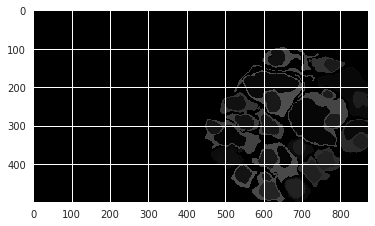

In [10]:
imshow(scipy.misc.imread('data/mip1/png/Bundle_1_2_merged_EM_VAST.vsseg_export_s0001.png'))

In [11]:
segdata = {}
for i in tqdm(np.arange(0,1444)):
    segdata[i] = scipy.misc.imread('data/mip1/png/Bundle_1_2_merged_EM_VAST.vsseg_export_s'+'{0:04}'.format(i+1)+'.png')

In [12]:
emdata = {}
for i in tqdm(np.arange(0,1444)):
    emdata[i] = scipy.misc.imread('data/mip1/png/Bundle_1_2_merged_EM_VAST_export_s'+'{0:04}'.format(i+1)+'.png')

In [13]:
uniqueind = np.unique(segdata[1].reshape(-1,3),axis=0)

In [14]:
uniqueind1 = np.unique(segdata[1193].reshape(-1,3),axis=0)

In [15]:
uniqueind

array([[ 0,  0,  0],
       [ 5,  5,  5],
       [ 6,  6,  6],
       [ 7,  7,  7],
       [ 8,  8,  8],
       [ 9,  9,  9],
       [10, 10, 10],
       [11, 11, 11],
       [12, 12, 12],
       [13, 13, 13],
       [14, 14, 14],
       [15, 15, 15],
       [16, 16, 16],
       [17, 17, 17],
       [18, 18, 18],
       [19, 19, 19],
       [20, 20, 20],
       [21, 21, 21],
       [22, 22, 22],
       [23, 23, 23],
       [24, 24, 24],
       [25, 25, 25],
       [26, 26, 26],
       [27, 27, 27],
       [28, 28, 28],
       [29, 29, 29],
       [30, 30, 30],
       [31, 31, 31],
       [32, 32, 32],
       [33, 33, 33],
       [34, 34, 34],
       [35, 35, 35],
       [44, 44, 44],
       [45, 45, 45],
       [51, 51, 51],
       [53, 53, 53],
       [63, 63, 63],
       [64, 64, 64],
       [66, 66, 66],
       [67, 67, 67],
       [68, 68, 68],
       [69, 69, 69],
       [71, 71, 71],
       [72, 72, 72],
       [73, 73, 73],
       [77, 77, 77],
       [78, 78, 78]], dtype=uint8)

## preprocess
- windowsize
- remove schwann cell
- find contour
- store to hdf5 as image and mask

In [16]:
def transform_rgb(img):
    num = np.unique(img.reshape(-1,3),axis=0).shape[0]
    #print (num)
    #rgbarr = np.ndarray([num*3])
    #for i in range(num*3):
      #  rgbarr[i] = np.random.uniform(0,1)
    #rgbarr = rgbarr.reshape(-1,3)
    image = np.zeros([img.shape[0]*img.shape[1],3])
    sumimg = np.sum(img.reshape(-1,3),axis=1)
    uniqueind = np.unique(img.reshape(-1,3),axis=0)
    for i in np.arange(0,num-1):
        image[sumimg==3*(uniqueind[i][0]+1)] = colorsgallery[i]
    #print (sumimg.shape)
    image[sumimg==0] = [1,1,1]
    return image.reshape(img.shape[0],img.shape[1],3)

In [17]:
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[0])
sns.set_style(styles[0])

## cutting window
find the min, max position!

In [18]:
def find_bounding(data):
    xmin = np.sort(np.where(data[:,:,0]!=0)[0])[0]
    xmax = np.sort(np.where(data[:,:,0]!=0)[0])[-1]
    ymin = np.sort(np.where(data[:,:,0]!=0)[1])[0]
    ymax = np.sort(np.where(data[:,:,0]!=0)[1])[-1]
    return xmin, xmax, ymin, ymax

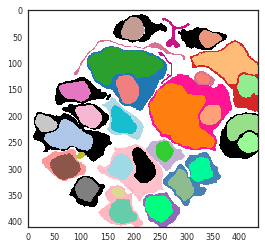

In [19]:
i = 1
j = 0
xmin, xmax, ymin, ymax = find_bounding(segdata[i*2+j])
imshow(transform_rgb(segdata[i*2+j][(xmin-10): (xmax+10), (ymin-10): (ymax+10)]))

In [20]:
np.where(segdata[1]!=0)

(array([ 97,  97,  97, ..., 498, 498, 498]),
 array([637, 637, 637, ..., 695, 695, 695]),
 array([0, 1, 2, ..., 0, 1, 2]))

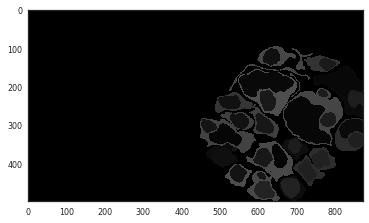

In [21]:
imshow(segdata[1])

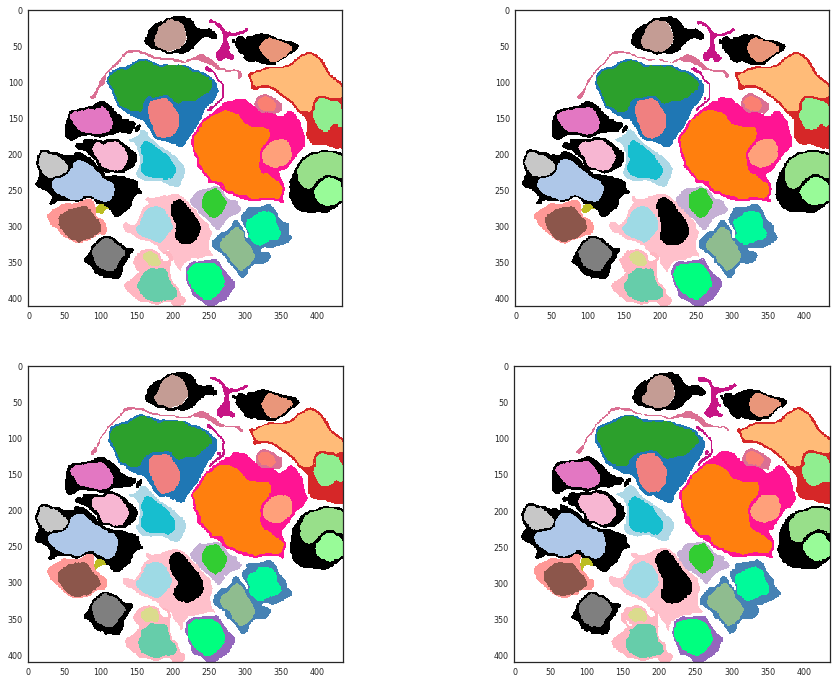

In [25]:
row = 2
fig,ax=plt.subplots(row,2,figsize=(16,6*row))
for i in range(row):
    for j in range(2):
        xmin, xmax, ymin, ymax = find_bounding(segdata[1+i*2+j])
        ax[i,j].imshow(transform_rgb(segdata[1+i*2+j][(xmin-10): (xmax+10), (ymin-10): (ymax+10)]))

In [26]:
uniqueind[:22,:]

array([[ 0,  0,  0],
       [ 5,  5,  5],
       [ 6,  6,  6],
       [ 7,  7,  7],
       [ 8,  8,  8],
       [ 9,  9,  9],
       [10, 10, 10],
       [11, 11, 11],
       [12, 12, 12],
       [13, 13, 13],
       [14, 14, 14],
       [15, 15, 15],
       [16, 16, 16],
       [17, 17, 17],
       [18, 18, 18],
       [19, 19, 19],
       [20, 20, 20],
       [21, 21, 21],
       [22, 22, 22],
       [23, 23, 23],
       [24, 24, 24],
       [25, 25, 25]], dtype=uint8)

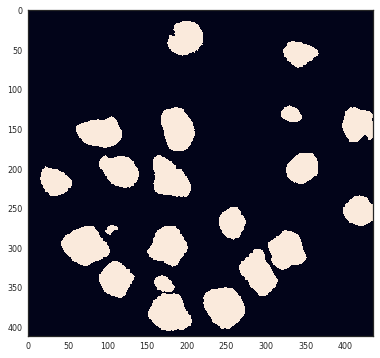

In [22]:
#numlist=np.array([5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
numlist=np.array([15,16,17,18,19,20,21,22,23,24, 25,26,27,28,29,30,31,32,33,34,35])
def remove_schwann(img,uniqueind):
    num = np.unique(img.reshape(-1,3),axis=0).shape[0]
    image = np.zeros([img.shape[0]*img.shape[1]])
    sumimg = np.sum(img.reshape(-1,3),axis=1)
    for i in np.arange(0,num):
        if np.where(numlist==i)[0].shape[0]!=0:
            image[sumimg==3*(i)] = 100
        else:
            image[sumimg==3*(i)] = 0
    image[image!=100] =0
    image[image==100] =1
    #image[sumimg==0] = [1,1,1]
    return image.reshape(img.shape[0],img.shape[1])
xmin, xmax, ymin, ymax = find_bounding(segdata[1])
fig,ax=plt.subplots(1,figsize=(8,6))
imshow(remove_schwann(segdata[0][(xmin-10): (xmax+10), (ymin-10): (ymax+10)],uniqueind))

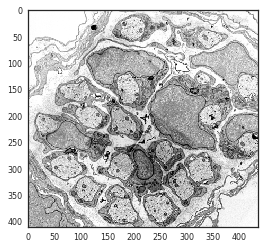

In [23]:
imshow(emdata[0][(xmin-10): (xmax+10), (ymin-10): (ymax+10)])

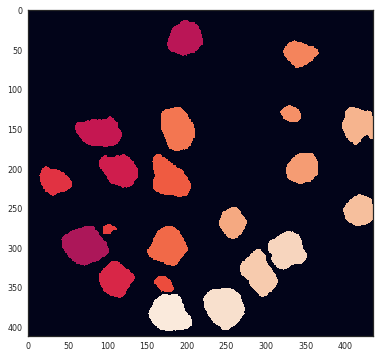

In [24]:
def remove_schwann_(img,uniqueind):
    num = np.unique(img.reshape(-1,3),axis=0).shape[0]
    #print (num)
    #rgbarr = np.ndarray([num*3])
    #for i in range(num*3):
      #  rgbarr[i] = np.random.uniform(0,1)
    #rgbarr = rgbarr.reshape(-1,3)
    image = np.zeros([img.shape[0]*img.shape[1]])
    sumimg = np.sum(img.reshape(-1,3),axis=1)
    #uniqueind = np.unique(img.reshape(-1,3),axis=0)
    #print (uniqueind)
    for i in np.arange(0,num):
        #print (uniqueind.shape)
        if np.where(numlist==i)[0].shape[0]!=0:
            image[sumimg==3*(i)] = i
            #print (uniqueind[:22,:][i][0]+1)
        else:
            image[sumimg==3*(i)] = 0
            
    #print (sumimg.shape)
    #image[sumimg==0] = [1,1,1]
    return image.reshape(img.shape[0],img.shape[1])
xmin, xmax, ymin, ymax = find_bounding(segdata[1])
fig,ax=plt.subplots(1,figsize=(8,6))
imshow(remove_schwann_(segdata[1][(xmin-10): (xmax+10), (ymin-10): (ymax+10)],uniqueind))

In [25]:
np.unique(remove_schwann_(segdata[1][(xmin-10): (xmax+10), (ymin-10): (ymax+10)],uniqueind))

array([ 0., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [26]:
### process pipeline

In [27]:
removedimg = {}
for i in tqdm(np.arange(0,1444)):
    #if np.isin(i,np.concatenate((np.arange(391,394),np.arange(597,598),np.arange(940,941)))):
       # print ('pass')
    try:
        xmin, xmax, ymin, ymax = find_bounding(segdata[i])   
        removedimg[i] = remove_schwann(segdata[i][(xmin-10): (xmax+10), (ymin-10): (ymax+10)],uniqueind)
    except:
        print("type error: "+ str(i))

type error: 391
type error: 392
type error: 393
type error: 991
type error: 992
type error: 1062
type error: 1063
type error: 1064
type error: 1065
type error: 1066
type error: 1067
type error: 1068
type error: 1069
type error: 1070
type error: 1071
type error: 1072
type error: 1073
type error: 1074
type error: 1131
type error: 1132
type error: 1133
type error: 1134
type error: 1135
type error: 1136
type error: 1137
type error: 1138
type error: 1139



In [28]:
emimg = {}
for i in tqdm(np.arange(0,1444)):
    #if np.isin(i,np.concatenate((np.arange(391,394),np.arange(597,598)))):
     #   print ('pass')
    try:
        xmin, xmax, ymin, ymax = find_bounding(segdata[i])      
        emimg[i] = emdata[i][(xmin-10): (xmax+10), (ymin-10): (ymax+10)][:,:,0]
    except:
        print("type error: "+ str(i))

In [30]:
width, height = {},{}
counterror=0
for i in tqdm(np.arange(0,1444)):
    try:
        width[i], height[i] = removedimg[i].shape
    except:
        print("type error: "+ str(i))
        counterror +=1

type error: 391
type error: 392
type error: 393
type error: 991
type error: 992
type error: 1062
type error: 1063
type error: 1064
type error: 1065
type error: 1066
type error: 1067
type error: 1068
type error: 1069
type error: 1070
type error: 1071
type error: 1072
type error: 1073
type error: 1074
type error: 1131
type error: 1132
type error: 1133
type error: 1134
type error: 1135
type error: 1136
type error: 1137
type error: 1138
type error: 1139



In [31]:
counterror

27

In [32]:
maxwidth = np.max(np.array([x for (y,x) in width.items()]))
maxheight = np.max(np.array([x for (y,x) in height.items()])) 
print ( maxwidth,maxheight)
maxmax = np.max(np.array([maxwidth,maxheight]))

(564, 877)


In [43]:
paddedmask = np.ndarray([1444-counterror,maxmax,maxmax])
paddedem = np.ndarray([1444-counterror,maxmax,maxmax])
count=0
for i in tqdm(np.arange(0,1444-counterror)):
    try:
        print (i)
        xnan = maxmax - emimg[i+1+count].shape[0]
        ynan = maxmax - emimg[i+1+count].shape[1]
        xleft = int(xnan/2)
        xright = int(xnan - xleft)
        yleft = int(ynan/2)
        yright = int(ynan - yleft)
        paddedem[i] = np.pad(emimg[i+1+count], ((xleft,xright),(yleft,yright)), 'reflect')
        paddedmask[i] = np.pad(removedimg[i+1+count], ((xleft,xright),(yleft,yright)), 'reflect')
    except:
        print("type error: "+ str(i))
        count +=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

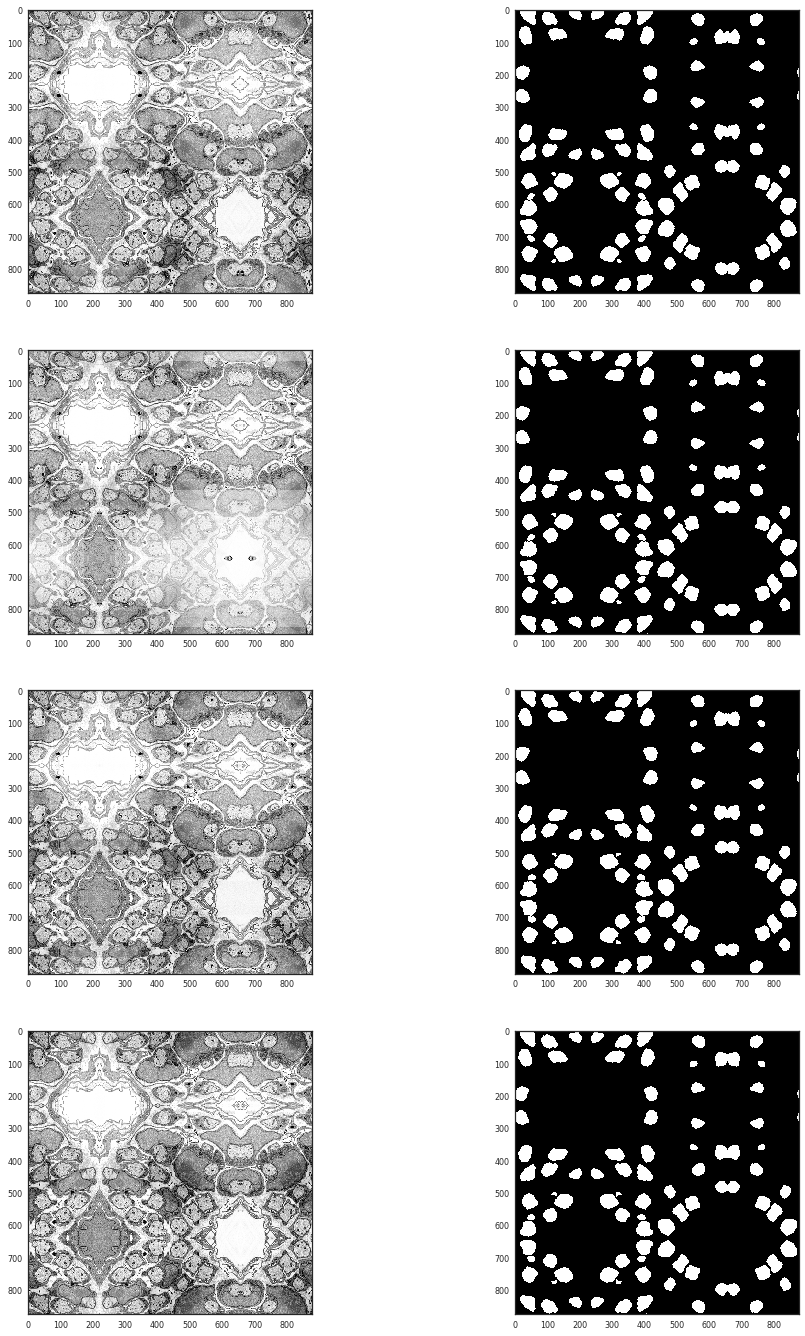

In [44]:
row = 4
fig,ax=plt.subplots(row,2,figsize=(16,6*row))
for i in range(row):
    for j in range(2):
        ax[i,0].imshow(paddedem[i],cmap='gray')
        ax[i,1].imshow(paddedmask[i],cmap='gray')

In [45]:
np.unique(paddedmask)

array([0., 1.])

In [46]:
paddedem = paddedem.astype('uint8')
paddedmask = paddedmask.astype('uint8')

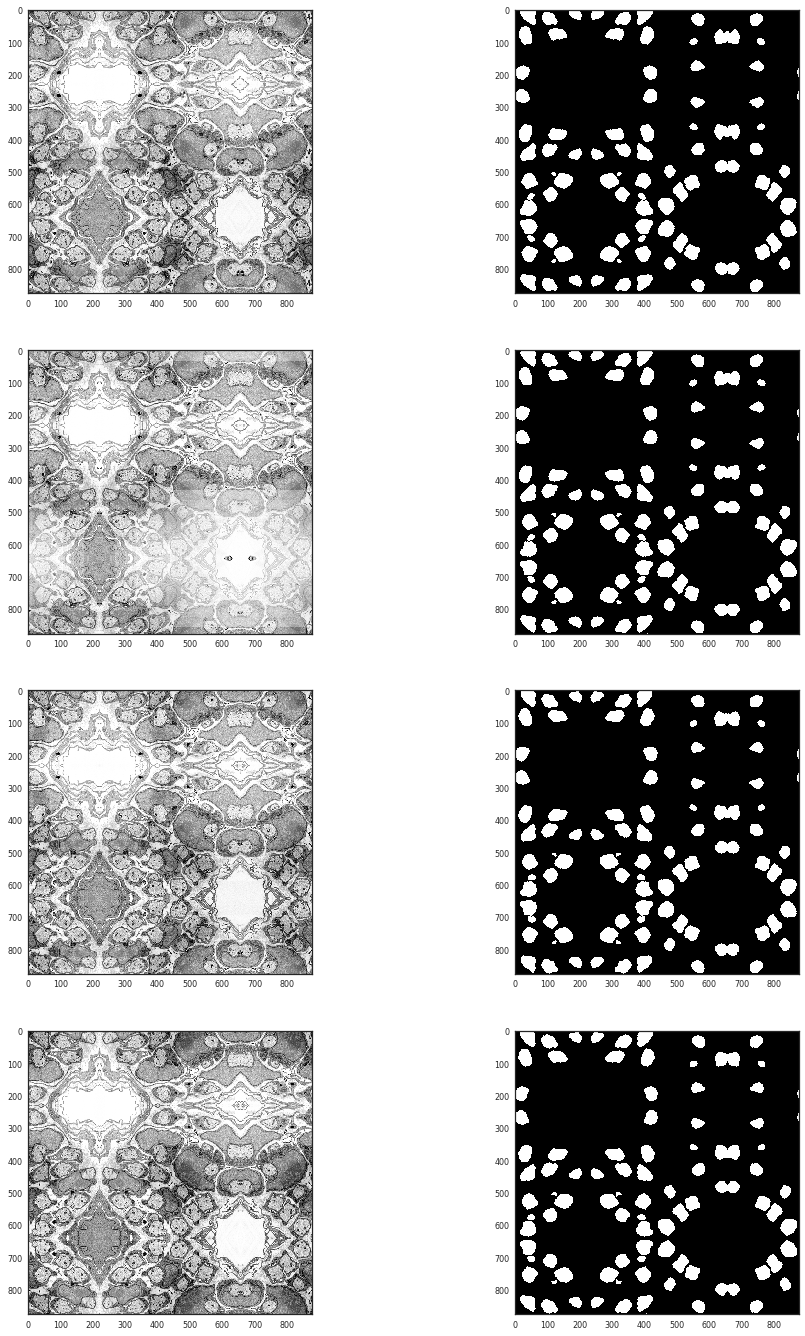

In [47]:
row = 4
fig,ax=plt.subplots(row,2,figsize=(16,6*row))
for i in range(row):
    for j in range(2):
        ax[i,0].imshow(paddedem[i],cmap='gray')
        ax[i,1].imshow(paddedmask[i],cmap='gray')

In [42]:
np.unique(paddedmask)

array([0, 1], dtype=uint8)

In [36]:
with h5py.File('data/train/mip1/em_equ.h5') as f:
    f.create_dataset('main',data=paddedem)
with h5py.File('data/train/mip1/mask_equ.h5') as f:
    f.create_dataset('main',data=paddedmask)

In [37]:
for i in tqdm(np.arange(0,1444-counterror)):
    scipy.misc.imsave('data/train/mip1/em/equal'+str(i)+'.png',paddedem[i])
    scipy.misc.imsave('data/train/mip1/mask/equal'+str(i)+'.png',paddedmask[i])

In [62]:
[(maxmax -512)/2:(maxmax -512)/2+512]

[182, 694]

In [63]:
for i in tqdm(np.arange(200,1444-counterror)):
    scipy.misc.imsave('data/train/mip1/trainingpath/Train/image_'+str(i-200)+'.png',
                      paddedem[i][(maxmax -512)/2:(maxmax -512)/2+512,(maxmax -512)/2:(maxmax -512)/2+512])
    scipy.misc.imsave('data/train/mip1/trainingpath/Train/mask_'+str(i-200)+'.png',
                      paddedmask[i][(maxmax -512)/2:(maxmax -512)/2+512,(maxmax -512)/2:(maxmax -512)/2+512])

In [56]:
paddedem[i].shape, paddedmask[i].shape

((877, 877), (877, 877))

In [64]:
for i in tqdm(np.arange(0,200)):
    scipy.misc.imsave('data/train/mip1/trainingpath/Validation/image_'+str(i)+'.png',
                      paddedem[i][(maxmax -512)/2:(maxmax -512)/2+512,(maxmax -512)/2:(maxmax -512)/2+512])
    scipy.misc.imsave('data/train/mip1/trainingpath/Validation/mask_'+str(i)+'.png',
                      paddedmask[i][(maxmax -512)/2:(maxmax -512)/2+512,(maxmax -512)/2:(maxmax -512)/2+512])

In [67]:
for i in tqdm(np.arange(20,80)):
    scipy.misc.imsave('data/train/mip1/trainingpathtest/Train/image_'+str(i-20)+'.png',
                      paddedem[i][(maxmax -512)/2:(maxmax -512)/2+512,(maxmax -512)/2:(maxmax -512)/2+512])
    scipy.misc.imsave('data/train/mip1/trainingpathtest/Train/mask_'+str(i-20)+'.png',
                      paddedmask[i][(maxmax -512)/2:(maxmax -512)/2+512,(maxmax -512)/2:(maxmax -512)/2+512])
for i in tqdm(np.arange(0,20)):
    scipy.misc.imsave('data/train/mip1/trainingpathtest/Validation/image_'+str(i)+'.png',
                      paddedem[i][(maxmax -512)/2:(maxmax -512)/2+512,(maxmax -512)/2:(maxmax -512)/2+512])
    scipy.misc.imsave('data/train/mip1/trainingpathtest/Validation/mask_'+str(i)+'.png',
                      paddedmask[i][(maxmax -512)/2:(maxmax -512)/2+512,(maxmax -512)/2:(maxmax -512)/2+512])

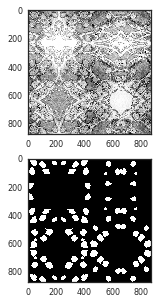

In [65]:
numind = 10
fig,ax=plt.subplots(2,figsize=(10,5))
ax[0].imshow(scipy.misc.imread('data/train/mip1/em/equal'+str(numind)+'.png'),cmap='gray')
ax[1].imshow(scipy.misc.imread('data/train/mip1/mask/equal'+str(numind)+'.png'),cmap='gray')

In [84]:
paddedem.shape,paddedmask.shape

((1417, 564, 877), (1417, 564, 877))

In [86]:
paddedem.dtype,paddedmask.dtype

(dtype('float64'), dtype('float64'))

In [87]:
np.unique(paddedmask)

array([0., 1.])

In [88]:
np.unique(paddedem)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

import pickle
def save_obj(obj, name ):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [23]:
#xrange, yrange = [],[]
coloredmask = {}
for i in tqdm(np.arange(0,1434)):
    xmin, xmax, ymin, ymax = find_bounding(segdata[i+1]) 
    coloredmask[i] = remove_schwann_(segdata[i+1][(xmin-10): (xmax+10), (ymin-10): (ymax+10)],uniqueind)
    #xrange.append(coloredmask.shape[0])
    #yrange.append(coloredmask.shape[1])

In [29]:
save_obj(coloredmask, 'marcocoloredmask_8.13' )

In [8]:
emimg =load_obj('marcoem_8.13' )

In [9]:
coloredmask =load_obj('marcocoloredmask_8.13' )

In [38]:
emimg = {}
for i in tqdm(np.arange(1,1445)):
    xmin, xmax, ymin, ymax = find_bounding(segdata[i])      
    emimg[i] = emdata[i][(xmin-10): (xmax+10), (ymin-10): (ymax+10)][:,:,0]

In [39]:
save_obj(emimg, 'marcoem_8.13' )

In [10]:
emimg[10].shape,coloredmask[10].shape

((827, 918), (827, 918))

In [11]:
len(coloredmask),len(emimg)

(1434, 1444)

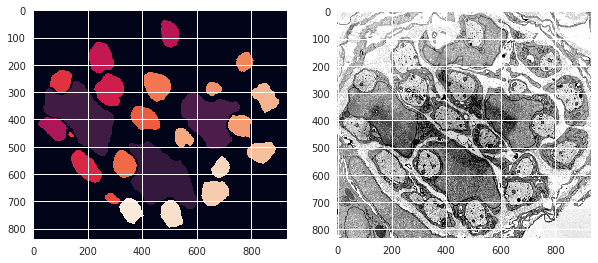

In [12]:
ind = 100
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(coloredmask[ind])
ax[1].imshow(emimg[ind],cmap='gray')

In [13]:
len(emimg)

1444

In [17]:
#paddedcoloredmask = np.ndarray([100,1112, 1734]).astype('uint8')
#paddedem = np.ndarray([100,1112, 1734]).astype('uint8')
#f= h5py.File('data/train_set/marco/coloredmaskmip0.h5')
t= h5py.File('data/train_set/marco/emmip0.h5')
for i in tqdm(np.arange(0,1434)):
    #paddedcoloredmask = np.ndarray([1112, 1734]).astype('uint8')
    paddedem = np.ndarray([1112, 1734]).astype('uint8')
    #xmin, xmax, ymin, ymax = find_bounding(segdata[i+1]) 
    #coloredmask = remove_schwann_(segdata[i+1][(xmin-10): (xmax+10), (ymin-10): (ymax+10)],uniqueind)
    xnan = 1112 - coloredmask[i].shape[0]
    ynan = 1734 - coloredmask[i].shape[1]
    xleft = int(xnan/2)
    xright = int(xnan - xleft)
    yleft = int(ynan/2)
    yright = int(ynan - yleft)
    #print (xleft,xright,yleft,yright)
    #paddedcoloredmask = np.pad(coloredmask[i], ((xleft,xright),(yleft,yright)), 'reflect').astype('uint8')
    paddedem = np.pad(emimg[i+1], ((xleft,xright),(yleft,yright)), 'reflect').astype('uint8')
    #f.create_dataset(str(i),data=paddedcoloredmask)
    t.create_dataset(str(i),data=paddedem)
    print (paddedem.shape)
t.close()

(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)

(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)

(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)
(1112, 1734)

In [20]:
#f= h5py.File('data/train_set/marco/coloredmaskmip0.h5')
t= h5py.File('data/train_set/marco/emmip0.h5')

In [6]:
paddedcoloredmask = np.ndarray([1434,1112, 1734]).astype('uint8')
with h5py.File('data/train_set/marco/coloredmaskmip0.h5') as f:
    for i in tqdm(range(1434)):
        paddedcoloredmask[i] = f[str(i)][:]

In [21]:
paddedem= np.ndarray([1434,1112, 1734]).astype('uint8')
with h5py.File('data/train_set/marco/emmip0.h5') as f:
    for i in tqdm(range(1434)):
        paddedem[i] = t[str(i)][:]

In [7]:
with h5py.File('data/train_set/marco/coloredmaskmip0whole.h5') as f:
    f.create_dataset('main',data=paddedcoloredmask)

In [23]:
with h5py.File('data/train_set/marco/emmip0whole.h5') as f:
    f.create_dataset('main',data=paddedem)

In [24]:
with h5py.File('data/train_set/marco/coloredmaskmip0whole.h5') as f:
    paddedcoloredmask = f['main'][:]
with h5py.File('data/train_set/marco/emmip0whole.h5') as f:
    paddedem = f['main'][:]

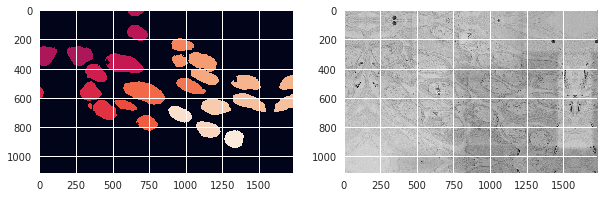

In [26]:
ind = 1000
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(paddedcoloredmask[ind])
ax[1].imshow(paddedem[ind],cmap='gray')

In [35]:
paddedcoloredmask = np.ndarray([1435,565,877])
count=0
for i in tqdm(np.arange(0,1434)):
    if np.isin(i,np.arange(1191,1201)):
        print ('pass')
        count+=1
    else:
        xmin, xmax, ymin, ymax = find_bounding(segdata[i+1+count]) 
        coloredmask = remove_schwann_(segdata[i+1+count][(xmin-10): (xmax+10), (ymin-10): (ymax+10)],uniqueind)
        xnan = 565 - coloredmask.shape[0]
        ynan = 877 - coloredmask.shape[1]
        xleft = int(xnan/2)
        xright = int(xnan - xleft)
        yleft = int(ynan/2)
        yright = int(ynan - yleft)
        paddedcoloredmask[i] = np.pad(coloredmask, ((xleft,xright),(yleft,yright)), 'reflect')

 83%|████████▎ | 1191/1434 [05:09<01:03,  3.85it/s]

pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


100%|██████████| 1434/1434 [07:01<00:00,  3.40it/s]


In [54]:
xlefts,xrights,ylefts,yrights = {},{},{},{}
count=0
for i in tqdm(np.arange(0,1434)):
    if np.isin(i,np.arange(1191,1201)):
        print ('pass')
        count+=1
    else:
        xmin, xmax, ymin, ymax = find_bounding(segdata[i+1+count]) 
        coloredmask = remove_schwann_(segdata[i+1+count][(xmin-10): (xmax+10), (ymin-10): (ymax+10)],uniqueind)
        xnan = 565 - coloredmask.shape[0]
        ynan = 877 - coloredmask.shape[1]
        xleft = int(xnan/2)
        xright = int(xnan - xleft)
        yleft = int(ynan/2)
        yright = int(ynan - yleft)
    xlefts[i],xrights[i],ylefts[i],yrights[i] = xleft,xright,yleft,yright




  0%|          | 0/1434 [00:00<?, ?it/s]


  0%|          | 1/1434 [00:00<04:20,  5.51it/s]


  0%|          | 2/1434 [00:00<04:21,  5.48it/s]


  0%|          | 3/1434 [00:00<04:30,  5.29it/s]


  0%|          | 4/1434 [00:00<04:27,  5.34it/s]


  0%|          | 5/1434 [00:00<04:25,  5.38it/s]


  0%|          | 6/1434 [00:01<04:24,  5.40it/s]


  0%|          | 7/1434 [00:01<04:26,  5.34it/s]


  1%|          | 8/1434 [00:01<04:25,  5.37it/s]


  1%|          | 9/1434 [00:01<04:24,  5.38it/s]


  1%|          | 10/1434 [00:01<04:24,  5.38it/s]


  1%|          | 11/1434 [00:02<04:23,  5.39it/s]


  1%|          | 12/1434 [00:02<04:23,  5.41it/s]


  1%|          | 13/1434 [00:02<04:22,  5.41it/s]


  1%|          | 14/1434 [00:02<04:22,  5.41it/s]


  1%|          | 15/1434 [00:02<04:23,  5.39it/s]


  1%|          | 16/1434 [00:02<04:22,  5.39it/s]


  1%|          | 17/1434 [00:03<04:22,  5.40it/s]


  1%|▏         | 18/1434 [00:03<04:22,  5.40it/s]


  1%|▏         | 19/1434 [0

  9%|▉         | 134/1434 [00:24<04:00,  5.40it/s]


  9%|▉         | 135/1434 [00:25<04:00,  5.40it/s]


  9%|▉         | 136/1434 [00:25<04:00,  5.39it/s]


 10%|▉         | 137/1434 [00:25<04:01,  5.36it/s]


 10%|▉         | 138/1434 [00:25<04:02,  5.34it/s]


 10%|▉         | 139/1434 [00:26<04:02,  5.34it/s]


 10%|▉         | 140/1434 [00:26<04:02,  5.34it/s]


 10%|▉         | 141/1434 [00:26<04:01,  5.34it/s]


 10%|▉         | 142/1434 [00:26<04:01,  5.34it/s]


 10%|▉         | 143/1434 [00:26<04:01,  5.35it/s]


 10%|█         | 144/1434 [00:26<04:01,  5.35it/s]


 10%|█         | 145/1434 [00:27<04:01,  5.35it/s]


 10%|█         | 146/1434 [00:27<04:00,  5.35it/s]


 10%|█         | 147/1434 [00:27<04:00,  5.35it/s]


 10%|█         | 148/1434 [00:27<04:00,  5.35it/s]


 10%|█         | 149/1434 [00:27<04:00,  5.35it/s]


 10%|█         | 150/1434 [00:28<03:59,  5.35it/s]


 11%|█         | 151/1434 [00:28<03:59,  5.35it/s]


 11%|█         | 152/1434 [00:28<03:59,  5.35i

 28%|██▊       | 398/1434 [01:15<03:16,  5.28it/s]


 28%|██▊       | 399/1434 [01:15<03:16,  5.27it/s]


 28%|██▊       | 400/1434 [01:15<03:16,  5.27it/s]


 28%|██▊       | 401/1434 [01:16<03:15,  5.27it/s]


 28%|██▊       | 402/1434 [01:16<03:15,  5.27it/s]


 28%|██▊       | 403/1434 [01:16<03:15,  5.27it/s]


 28%|██▊       | 404/1434 [01:16<03:15,  5.27it/s]


 28%|██▊       | 405/1434 [01:16<03:15,  5.27it/s]


 28%|██▊       | 406/1434 [01:16<03:14,  5.27it/s]


 28%|██▊       | 407/1434 [01:17<03:14,  5.27it/s]


 28%|██▊       | 408/1434 [01:17<03:14,  5.27it/s]


 29%|██▊       | 409/1434 [01:17<03:14,  5.27it/s]


 29%|██▊       | 410/1434 [01:17<03:14,  5.27it/s]


 29%|██▊       | 411/1434 [01:17<03:14,  5.27it/s]


 29%|██▊       | 412/1434 [01:18<03:13,  5.27it/s]


 29%|██▉       | 413/1434 [01:18<03:13,  5.27it/s]


 29%|██▉       | 414/1434 [01:18<03:13,  5.27it/s]


 29%|██▉       | 415/1434 [01:18<03:13,  5.27it/s]


 29%|██▉       | 416/1434 [01:18<03:13,  5.27i

 46%|████▌     | 662/1434 [02:03<02:23,  5.38it/s]


 46%|████▌     | 663/1434 [02:03<02:23,  5.38it/s]


 46%|████▋     | 664/1434 [02:03<02:23,  5.37it/s]


 46%|████▋     | 665/1434 [02:03<02:23,  5.37it/s]


 46%|████▋     | 666/1434 [02:03<02:22,  5.37it/s]


 47%|████▋     | 667/1434 [02:04<02:22,  5.37it/s]


 47%|████▋     | 668/1434 [02:04<02:22,  5.37it/s]


 47%|████▋     | 669/1434 [02:04<02:22,  5.37it/s]


 47%|████▋     | 670/1434 [02:04<02:22,  5.37it/s]


 47%|████▋     | 671/1434 [02:05<02:22,  5.37it/s]


 47%|████▋     | 672/1434 [02:05<02:21,  5.37it/s]


 47%|████▋     | 673/1434 [02:05<02:21,  5.37it/s]


 47%|████▋     | 674/1434 [02:05<02:21,  5.36it/s]


 47%|████▋     | 675/1434 [02:05<02:21,  5.36it/s]


 47%|████▋     | 676/1434 [02:06<02:21,  5.36it/s]


 47%|████▋     | 677/1434 [02:06<02:21,  5.36it/s]


 47%|████▋     | 678/1434 [02:06<02:21,  5.36it/s]


 47%|████▋     | 679/1434 [02:06<02:20,  5.36it/s]


 47%|████▋     | 680/1434 [02:06<02:20,  5.36i

 65%|██████▍   | 926/1434 [03:13<01:46,  4.79it/s]


 65%|██████▍   | 927/1434 [03:13<01:46,  4.78it/s]


 65%|██████▍   | 928/1434 [03:14<01:45,  4.78it/s]


 65%|██████▍   | 929/1434 [03:14<01:45,  4.78it/s]


 65%|██████▍   | 930/1434 [03:14<01:45,  4.78it/s]


 65%|██████▍   | 931/1434 [03:15<01:45,  4.77it/s]


 65%|██████▍   | 932/1434 [03:15<01:45,  4.77it/s]


 65%|██████▌   | 933/1434 [03:15<01:45,  4.77it/s]


 65%|██████▌   | 934/1434 [03:16<01:44,  4.76it/s]


 65%|██████▌   | 935/1434 [03:16<01:44,  4.76it/s]


 65%|██████▌   | 936/1434 [03:16<01:44,  4.76it/s]


 65%|██████▌   | 937/1434 [03:17<01:44,  4.76it/s]


 65%|██████▌   | 938/1434 [03:17<01:44,  4.75it/s]


 65%|██████▌   | 939/1434 [03:17<01:44,  4.75it/s]


 66%|██████▌   | 940/1434 [03:18<01:44,  4.75it/s]


 66%|██████▌   | 941/1434 [03:18<01:43,  4.74it/s]


 66%|██████▌   | 942/1434 [03:18<01:43,  4.74it/s]


 66%|██████▌   | 943/1434 [03:19<01:43,  4.74it/s]


 66%|██████▌   | 944/1434 [03:19<01:43,  4.74i

 83%|████████▎ | 1187/1434 [04:44<00:59,  4.17it/s]


 83%|████████▎ | 1188/1434 [04:44<00:58,  4.17it/s]


 83%|████████▎ | 1189/1434 [04:45<00:58,  4.17it/s]


 83%|████████▎ | 1190/1434 [04:45<00:58,  4.17it/s]


 83%|████████▎ | 1191/1434 [04:46<00:58,  4.16it/s]

pass
pass
pass
pass
pass
pass
pass
pass
pass
pass





 84%|████████▍ | 1202/1434 [04:46<00:55,  4.19it/s]


 84%|████████▍ | 1203/1434 [04:47<00:55,  4.19it/s]


 84%|████████▍ | 1204/1434 [04:47<00:54,  4.19it/s]


 84%|████████▍ | 1205/1434 [04:47<00:54,  4.18it/s]


 84%|████████▍ | 1206/1434 [04:48<00:54,  4.18it/s]


 84%|████████▍ | 1207/1434 [04:48<00:54,  4.18it/s]


 84%|████████▍ | 1208/1434 [04:49<00:54,  4.17it/s]


 84%|████████▍ | 1209/1434 [04:49<00:53,  4.17it/s]


 84%|████████▍ | 1210/1434 [04:50<00:53,  4.17it/s]


 84%|████████▍ | 1211/1434 [04:50<00:53,  4.16it/s]


 85%|████████▍ | 1212/1434 [04:51<00:53,  4.16it/s]


 85%|████████▍ | 1213/1434 [04:51<00:53,  4.16it/s]


 85%|████████▍ | 1214/1434 [04:52<00:52,  4.15it/s]


 85%|████████▍ | 1215/1434 [04:52<00:52,  4.15it/s]


 85%|████████▍ | 1216/1434 [04:53<00:52,  4.15it/s]


 85%|████████▍ | 1217/1434 [04:53<00:52,  4.14it/s]


 85%|████████▍ | 1218/1434 [04:54<00:52,  4.14it/s]


 85%|████████▌ | 1219/1434 [04:54<00:51,  4.14it/s]


 85%|████████▌ | 1220/143

 93%|█████████▎| 1332/1434 [05:48<00:26,  3.82it/s]


 93%|█████████▎| 1333/1434 [05:49<00:26,  3.82it/s]


 93%|█████████▎| 1334/1434 [05:49<00:26,  3.82it/s]


 93%|█████████▎| 1335/1434 [05:50<00:25,  3.81it/s]


 93%|█████████▎| 1336/1434 [05:50<00:25,  3.81it/s]


 93%|█████████▎| 1337/1434 [05:50<00:25,  3.81it/s]


 93%|█████████▎| 1338/1434 [05:51<00:25,  3.81it/s]


 93%|█████████▎| 1339/1434 [05:51<00:24,  3.81it/s]


 93%|█████████▎| 1340/1434 [05:52<00:24,  3.80it/s]


 94%|█████████▎| 1341/1434 [05:52<00:24,  3.80it/s]


 94%|█████████▎| 1342/1434 [05:53<00:24,  3.80it/s]


 94%|█████████▎| 1343/1434 [05:53<00:23,  3.80it/s]


 94%|█████████▎| 1344/1434 [05:54<00:23,  3.79it/s]


 94%|█████████▍| 1345/1434 [05:54<00:23,  3.79it/s]


 94%|█████████▍| 1346/1434 [05:55<00:23,  3.79it/s]


 94%|█████████▍| 1347/1434 [05:55<00:22,  3.79it/s]


 94%|█████████▍| 1348/1434 [05:56<00:22,  3.79it/s]


 94%|█████████▍| 1349/1434 [05:56<00:22,  3.78it/s]


 94%|█████████▍| 1350/1434 [

In [44]:
xlefts

{0: 71, 1: 72}

In [46]:
paddedcoloredmask[1].shape

(565, 877)

In [65]:
np.savetxt('data/train_set/paddingind.txt',np.concatenate((np.array([xlefts[i] for i in range(1434)]).reshape(-1,1),
np.array([xrights[i] for i in range(1434)]).reshape(-1,1),
np.array([ylefts[i] for i in range(1434)]).reshape(-1,1),
np.array([yrights[i] for i in range(1434)]).reshape(-1,1)),axis=1),'%d')

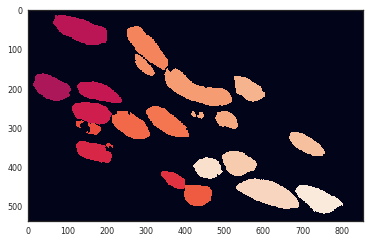

In [58]:
i=1300
imshow(paddedcoloredmask[i][xlefts[i]:-xrights[i],ylefts[i]:-yrights[i]])

In [36]:
paddedcoloredmask.shape

(1435, 565, 877)

In [37]:
with h5py.File('data/train_set/marco/coloredmask') as f:
    f.create_dataset('main',data=paddedcoloredmask,dtype=uint8)

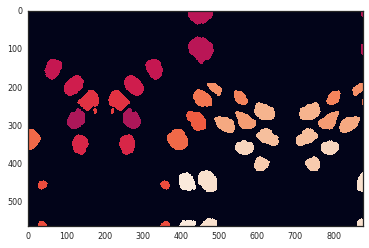

In [40]:
imshow(paddedcoloredmask[300])

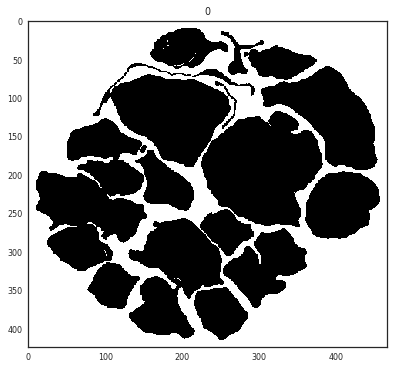

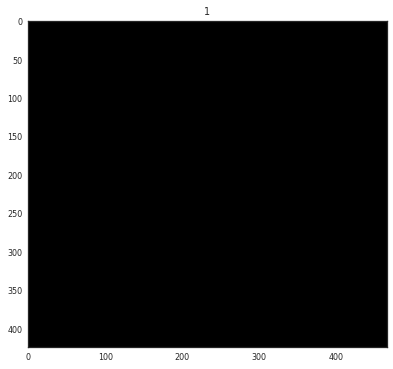

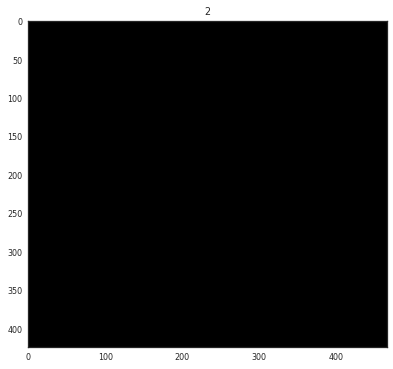

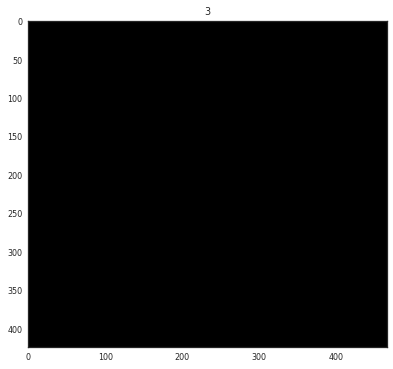

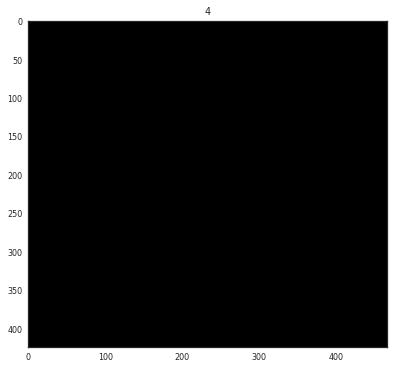

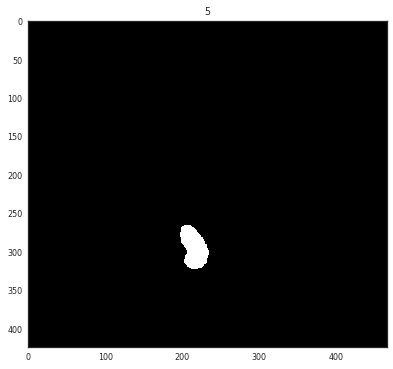

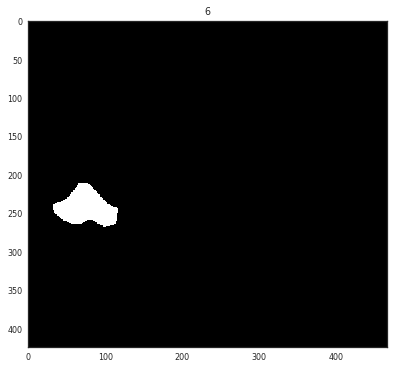

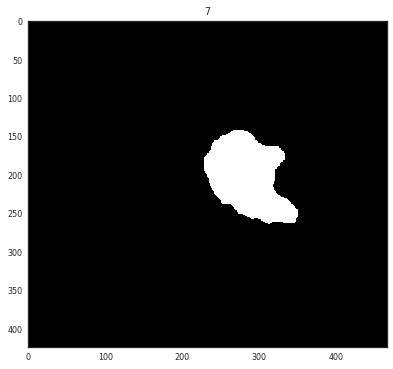

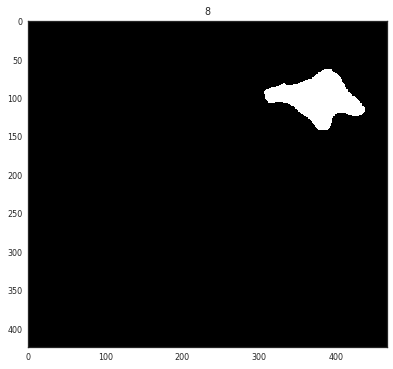

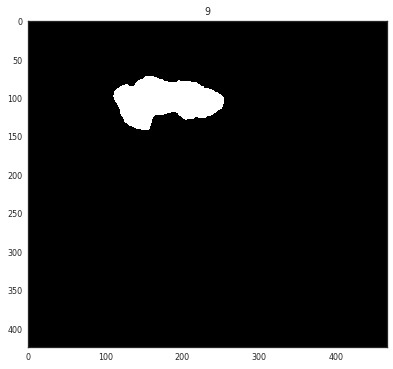

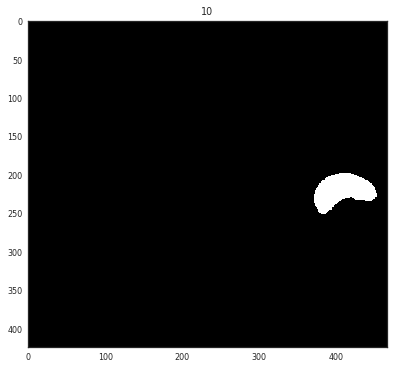

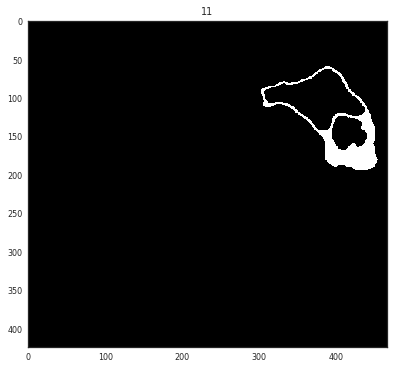

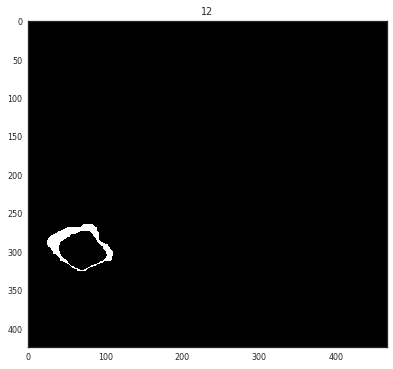

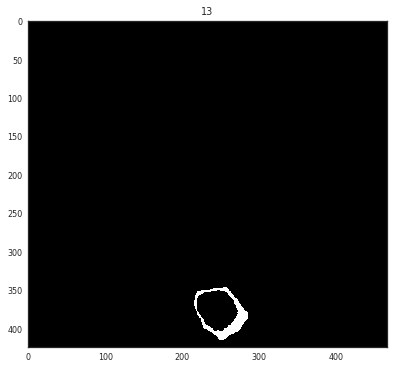

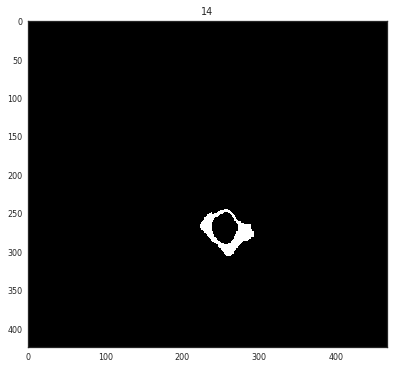

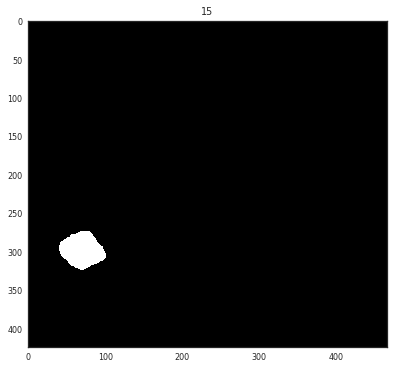

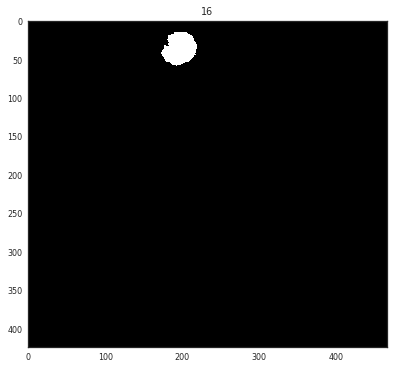

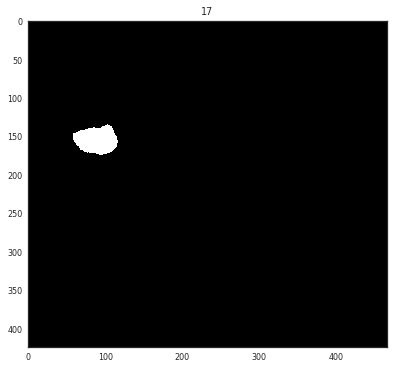

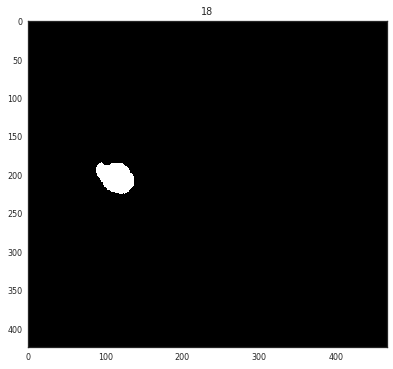

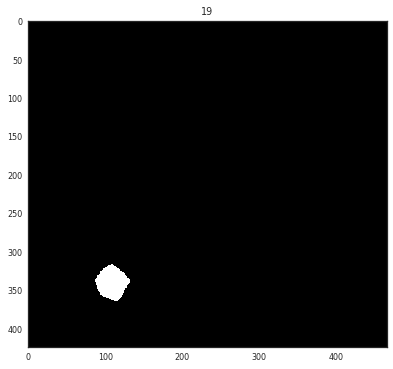

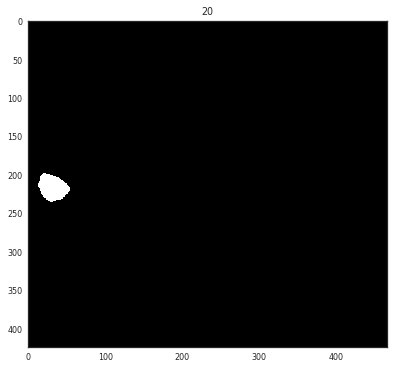

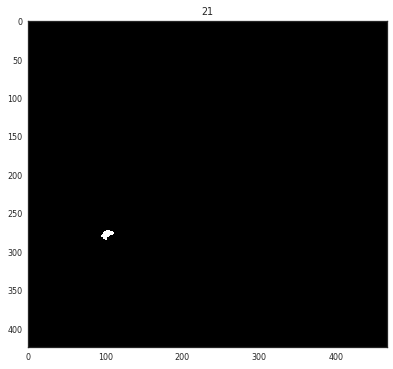

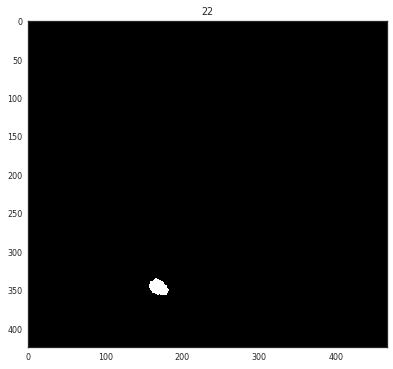

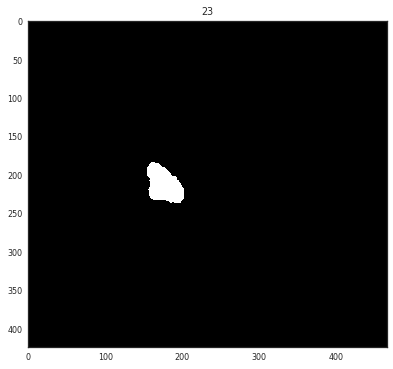

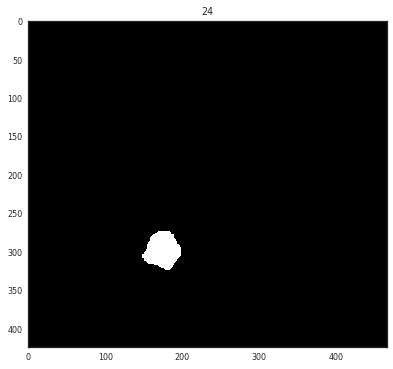

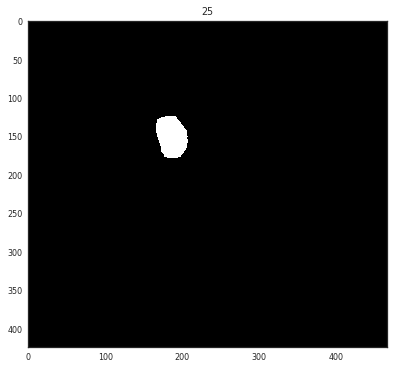

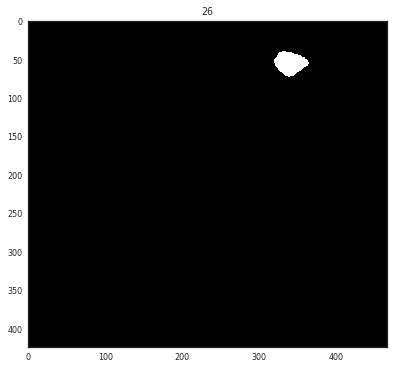

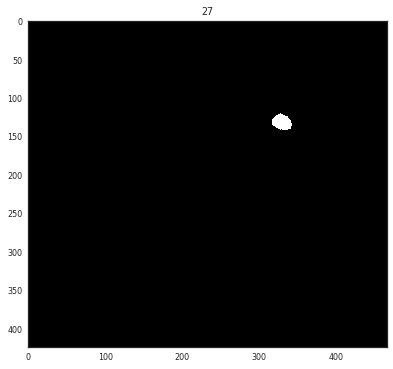

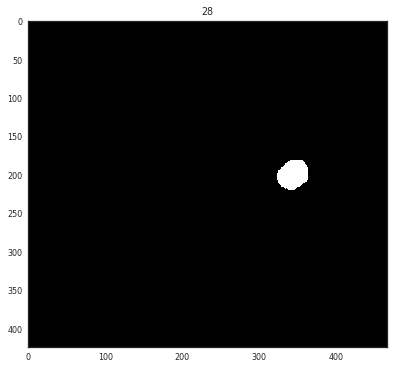

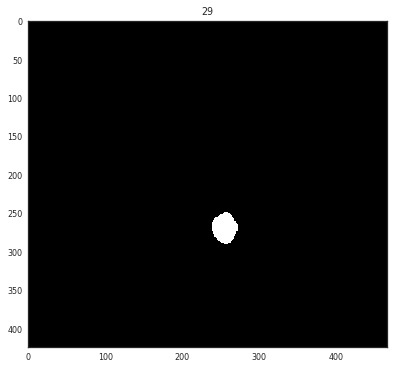

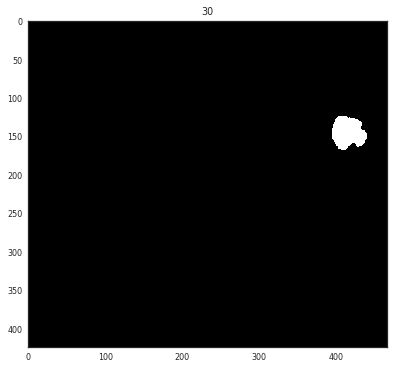

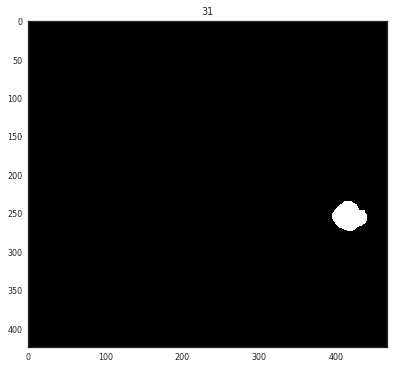

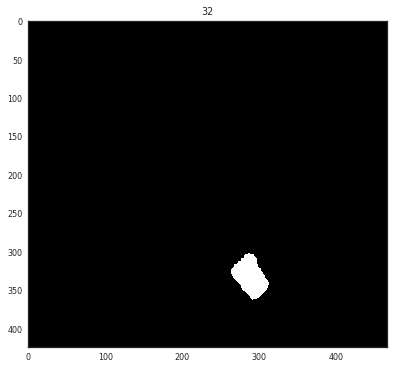

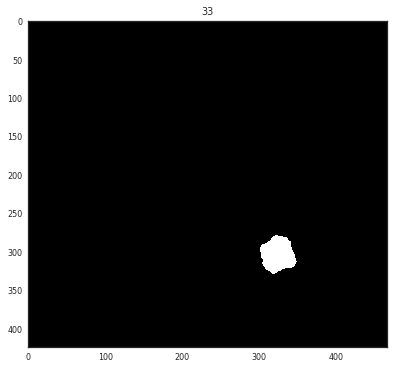

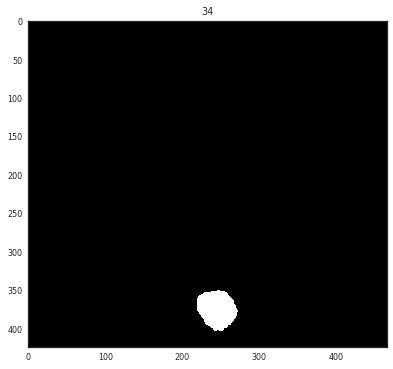

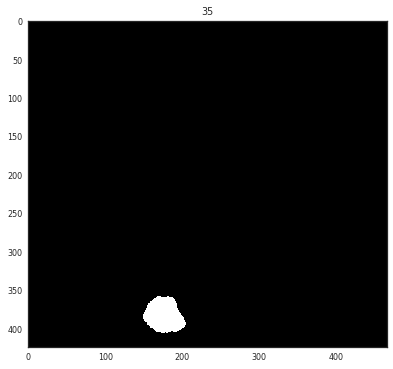

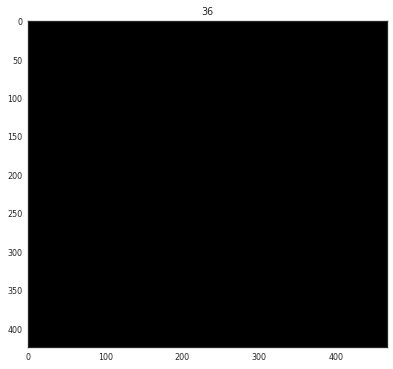

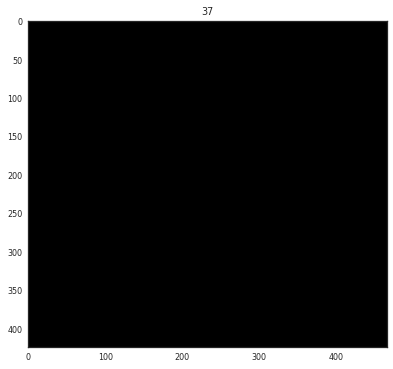

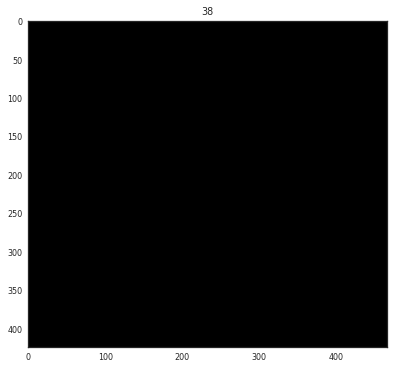

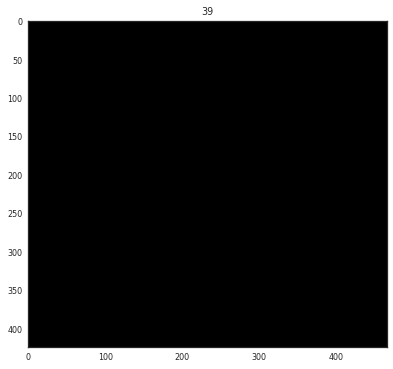

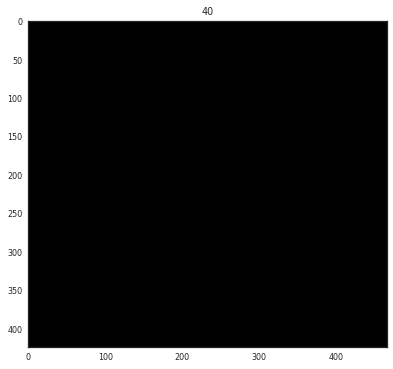

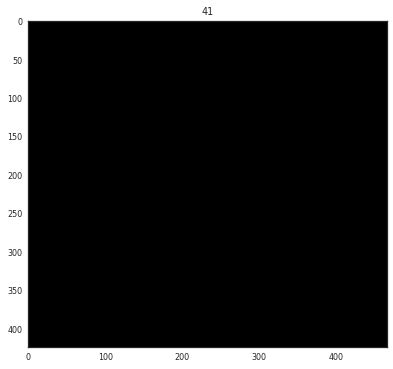

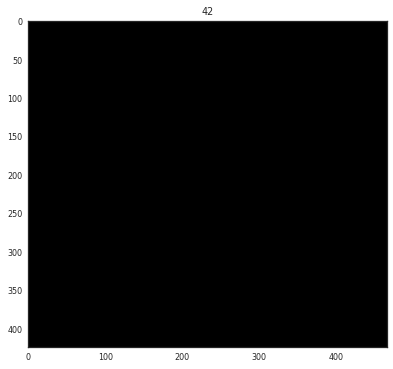

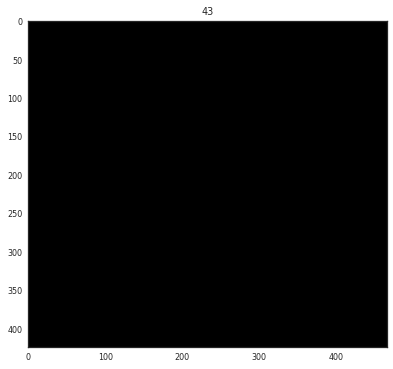

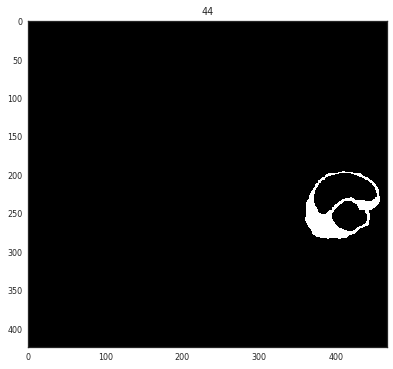

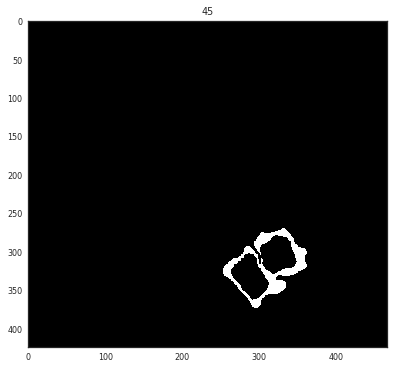

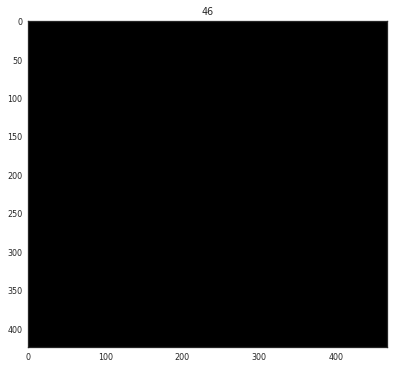

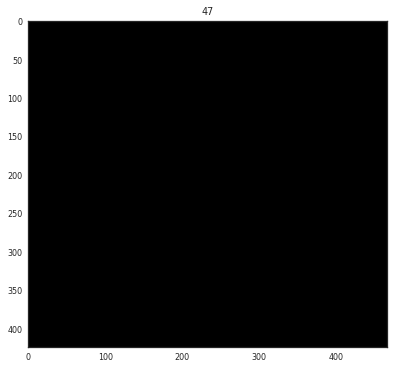

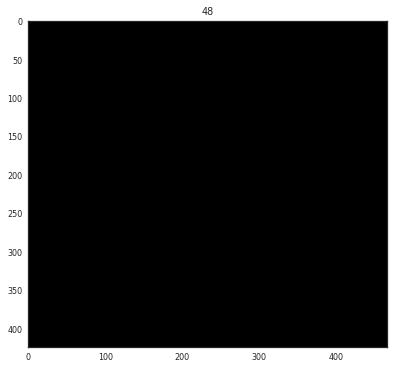

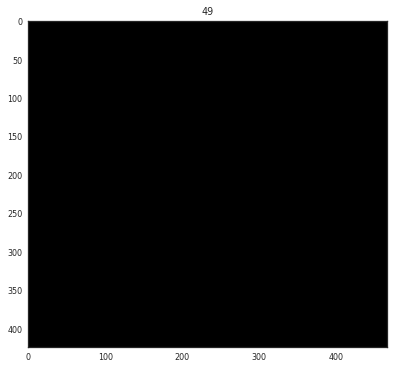

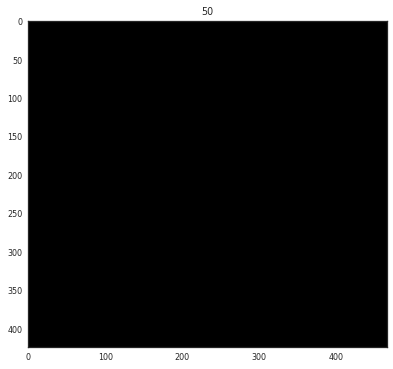

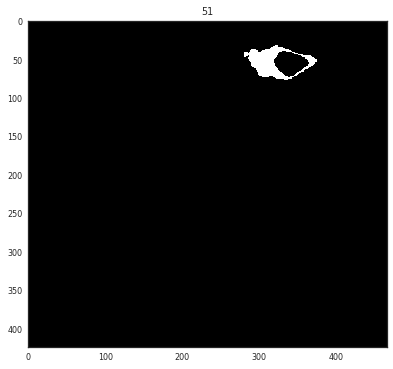

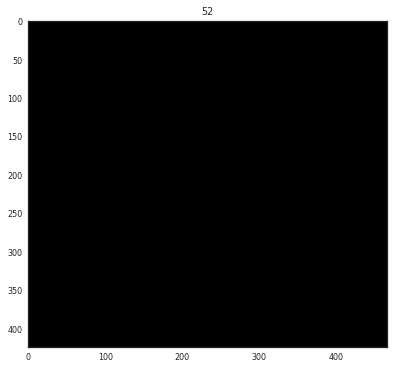

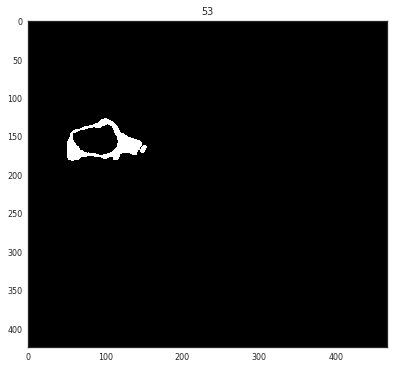

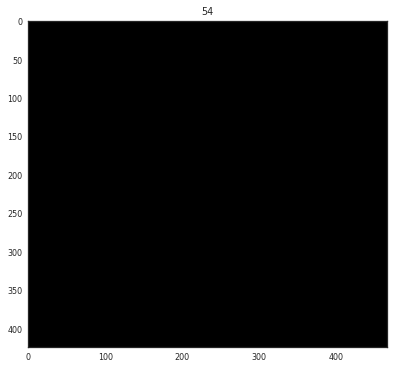

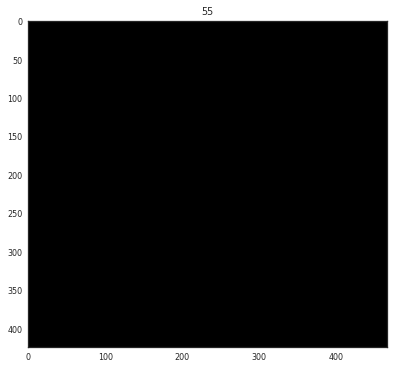

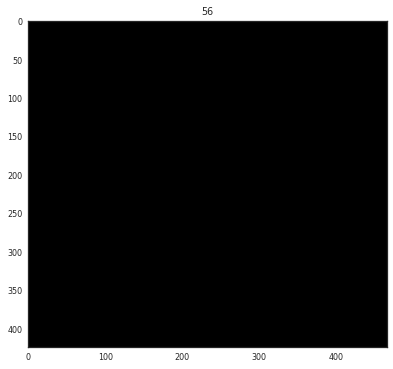

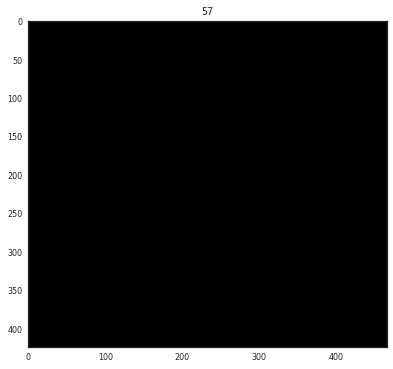

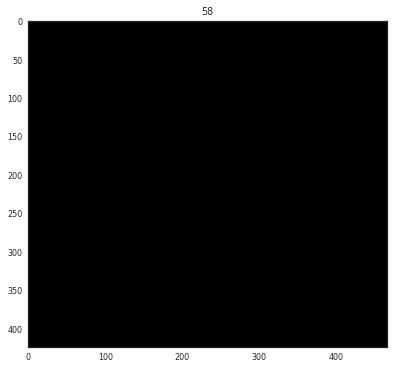

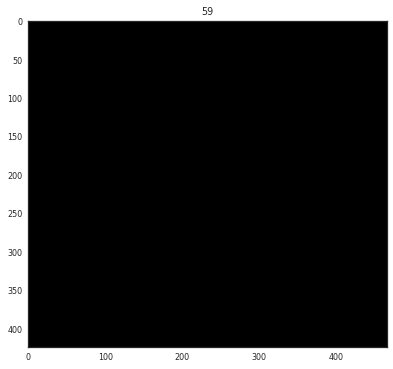

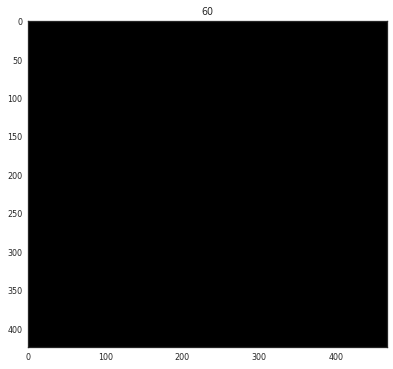

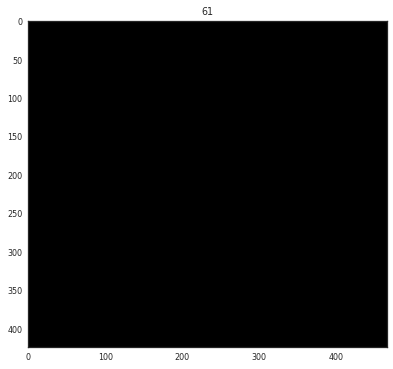

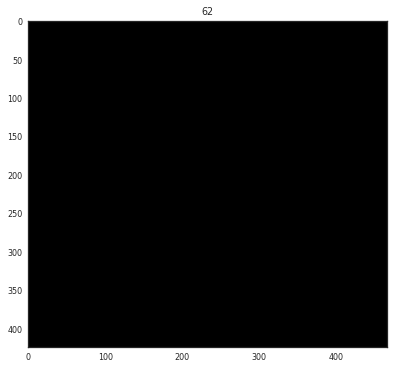

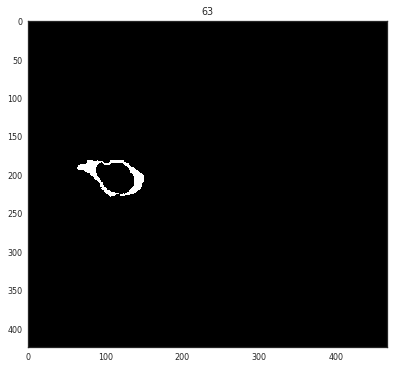

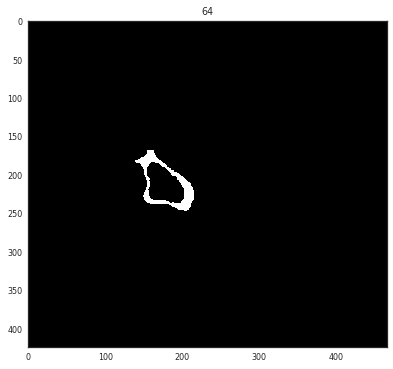

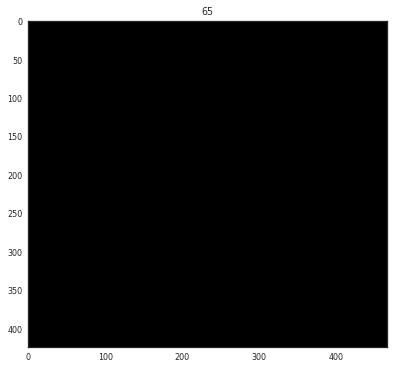

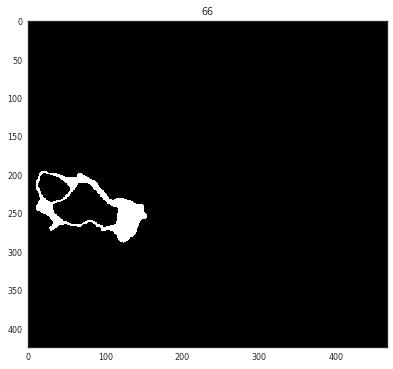

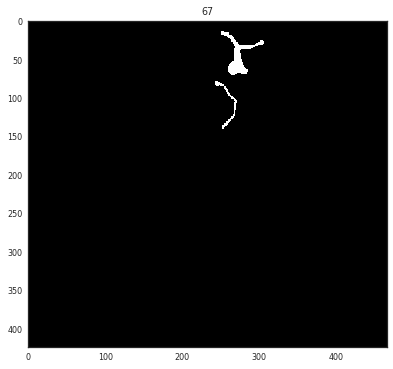

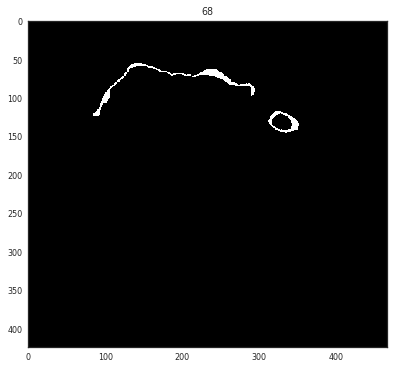

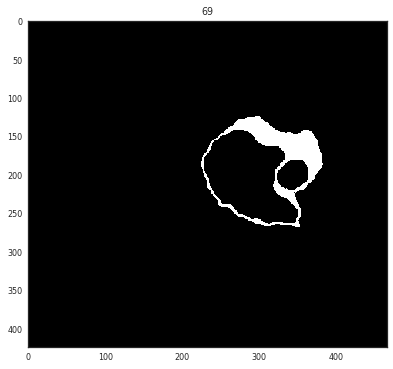

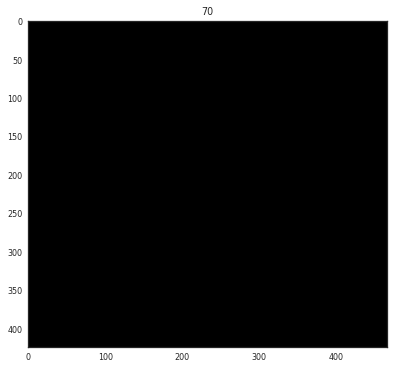

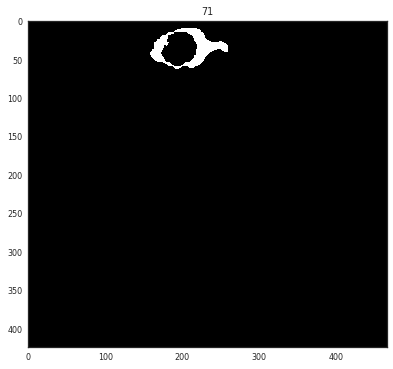

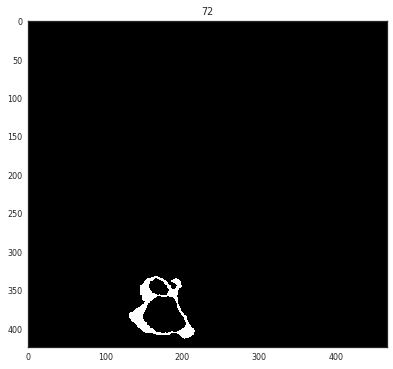

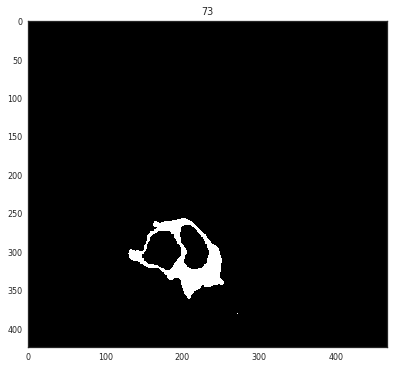

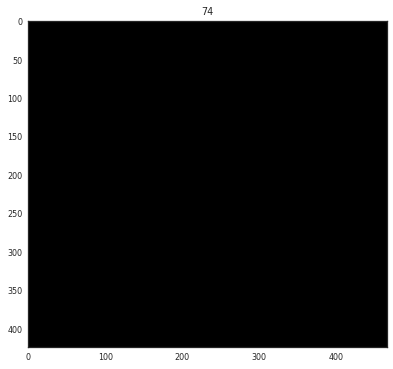

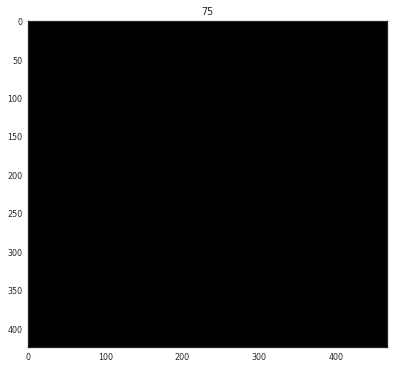

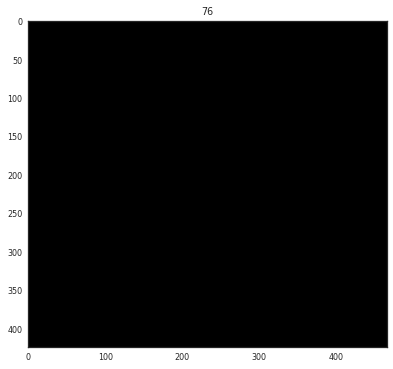

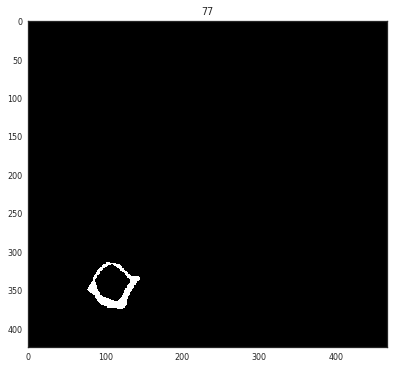

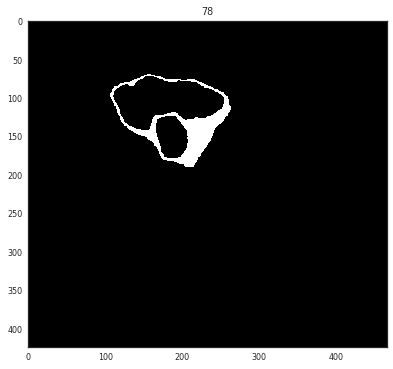

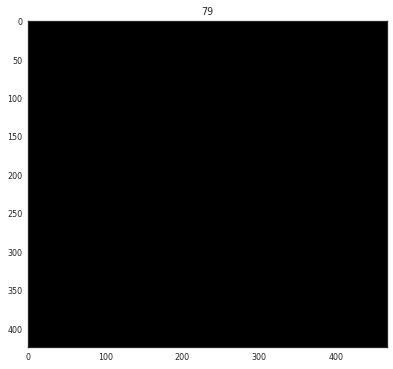

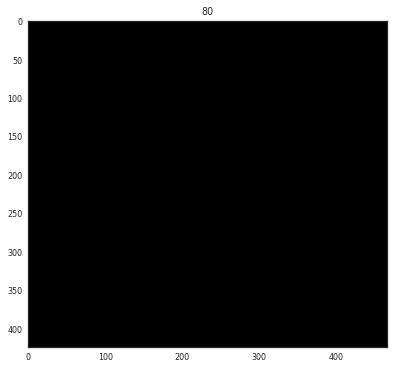

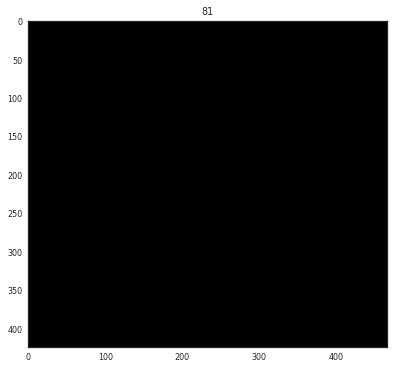

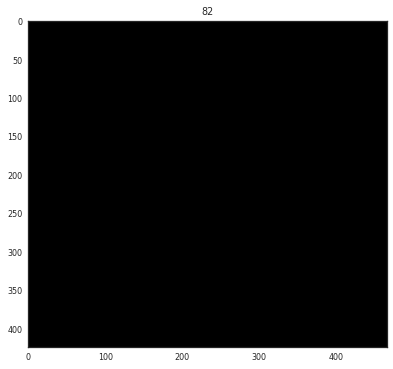

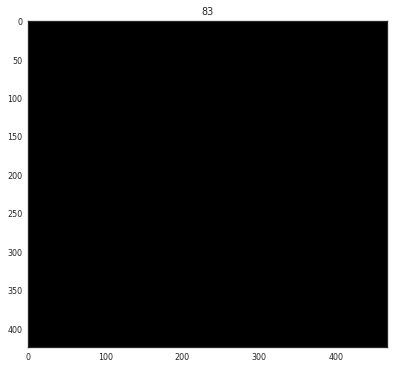

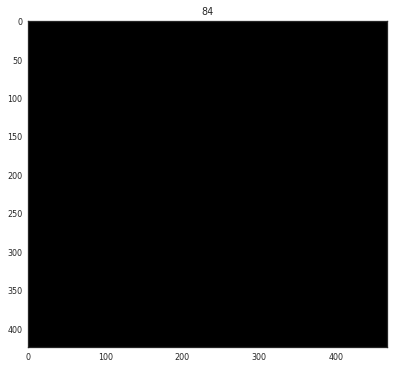

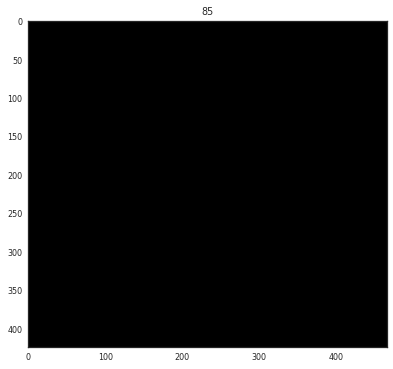

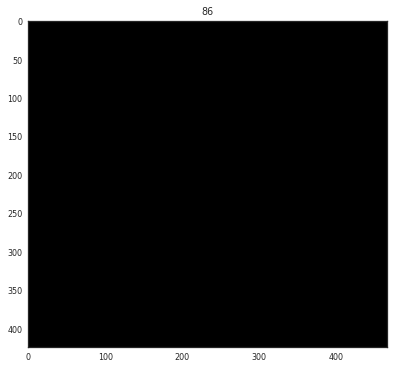

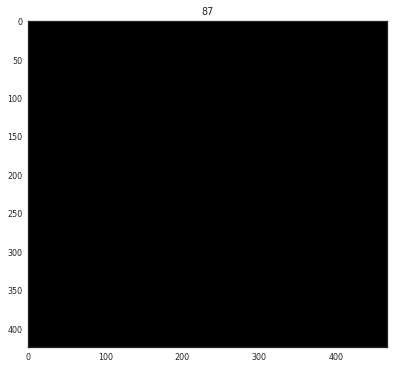

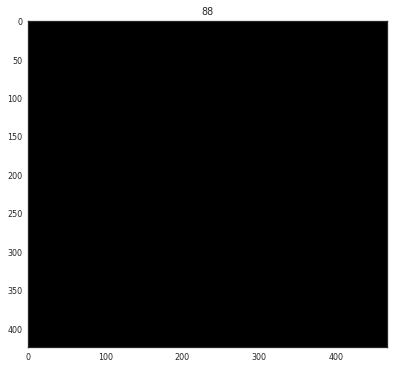

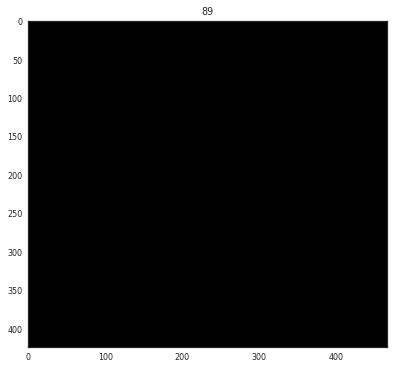

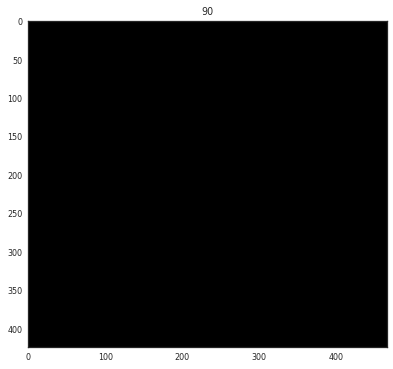

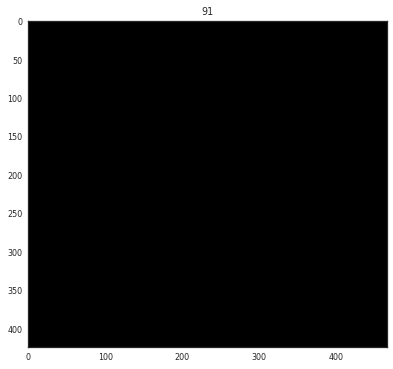

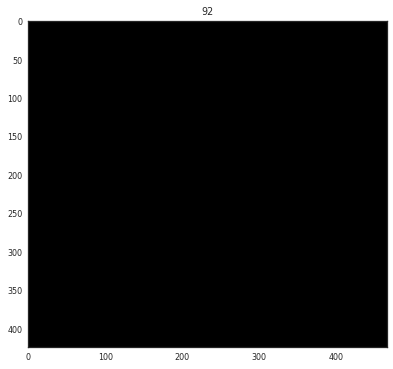

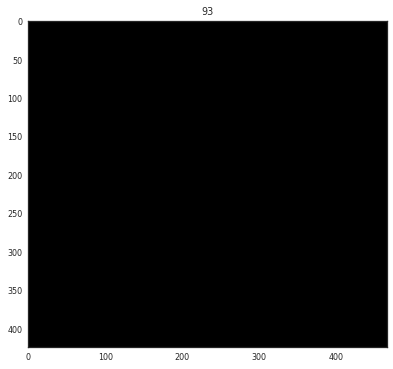

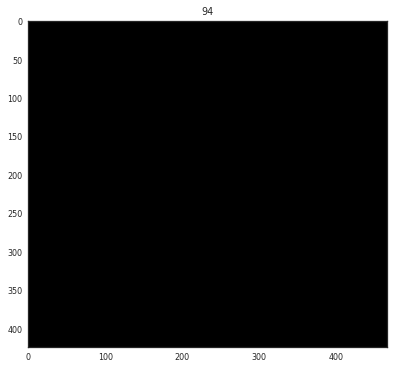

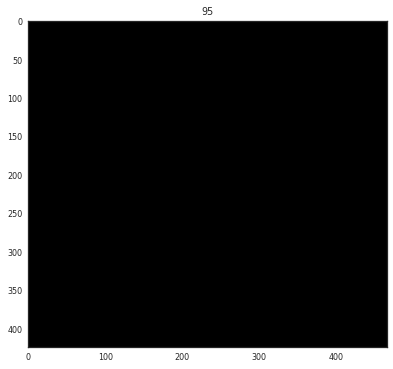

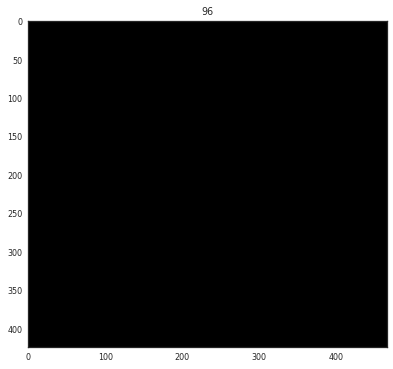

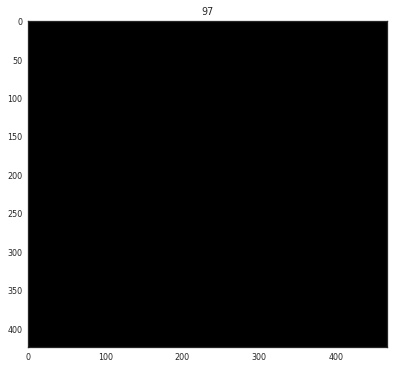

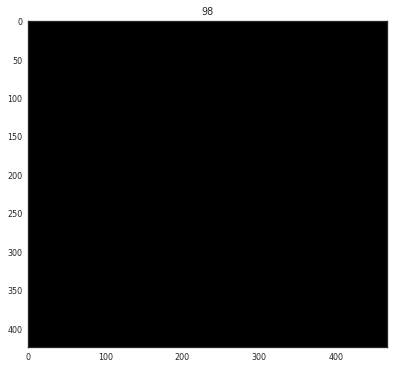

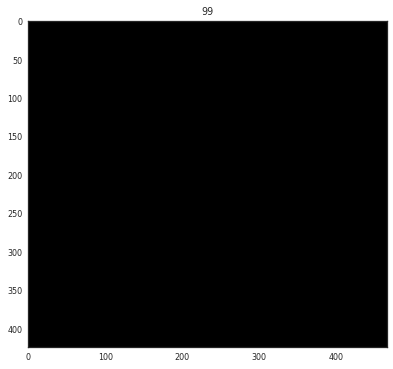

In [40]:
for i in range(100):
    zeroarr = np.zeros(segdata[1].shape)
    fig,ax=plt.subplots(1,figsize=(8,6))
    zeroarr[np.where(segdata[1] ==i)] =1
    ax.set_title(str(i))
    ax.imshow(zeroarr[(xmin-10): (xmax+10), (ymin-10): (ymax+10)])

In [72]:
for i in tqdm(np.arange(1,1445)):
    xmin, xmax, ymin, ymax = find_bounding(segdata[i])   
    print (i,segdata[i][(xmin-10): (xmax+10), (ymin-10): (ymax+10)].shape)



  0%|          | 0/1444 [00:00<?, ?it/s]

  0%|          | 4/1444 [00:00<00:37, 38.53it/s]

1 (424, 466, 3)
2 (425, 468, 3)
3 (426, 467, 3)
4 (424, 468, 3)
5 (424, 468, 3)




  1%|          | 8/1444 [00:00<00:36, 38.90it/s]

6 (425, 467, 3)
7 (423, 467, 3)
8 (423, 468, 3)




  1%|          | 12/1444 [00:00<00:37, 38.62it/s]

9 (423, 467, 3)
10 (423, 468, 3)
11 (423, 469, 3)
12 (421, 469, 3)
13 (422, 469, 3)




  1%|          | 16/1444 [00:00<00:36, 38.69it/s]

14 (422, 468, 3)
15 (422, 469, 3)
16 (421, 469, 3)




  1%|▏         | 20/1444 [00:00<00:36, 38.77it/s]

17 (420, 469, 3)
18 (421, 469, 3)
19 (420, 469, 3)
20 (419, 468, 3)
21 (419, 467, 3)




  2%|▏         | 24/1444 [00:00<00:36, 38.81it/s]

22 (418, 467, 3)
23 (420, 467, 3)
24 (421, 467, 3)




  2%|▏         | 28/1444 [00:00<00:36, 38.88it/s]

25 (421, 467, 3)
26 (421, 466, 3)
27 (421, 465, 3)
28 (422, 466, 3)
29 (422, 466, 3)




  2%|▏         | 32/1444 [00:00<00:36, 38.74it/s]

30 (420, 467, 3)
31 (419, 467, 3)
32 (421, 466, 3)




  2%|▏         | 36/1444 [00:00<00:36, 38.76it/s]

33 (420, 463, 3)
34 (418, 465, 3)
35 (420, 467, 3)
36 (419, 465, 3)
37 (418, 464, 3)




  3%|▎         | 40/1444 [00:01<00:36, 38.79it/s]

38 (419, 467, 3)
39 (418, 466, 3)
40 (416, 467, 3)




  3%|▎         | 44/1444 [00:01<00:36, 38.84it/s]

41 (416, 466, 3)
42 (415, 465, 3)
43 (415, 464, 3)
44 (418, 463, 3)
45 (417, 462, 3)




  3%|▎         | 48/1444 [00:01<00:35, 38.88it/s]

46 (418, 460, 3)
47 (418, 460, 3)
48 (419, 458, 3)




  4%|▎         | 52/1444 [00:01<00:35, 38.75it/s]

49 (420, 457, 3)
50 (421, 457, 3)
51 (423, 457, 3)
52 (422, 456, 3)
53 (424, 454, 3)




  4%|▍         | 56/1444 [00:01<00:35, 38.80it/s]

54 (424, 456, 3)
55 (424, 456, 3)
56 (425, 458, 3)




  4%|▍         | 60/1444 [00:01<00:35, 38.83it/s]

57 (425, 457, 3)
58 (425, 457, 3)
59 (425, 463, 3)
60 (425, 465, 3)
61 (423, 468, 3)




  4%|▍         | 64/1444 [00:01<00:35, 38.85it/s]

62 (426, 470, 3)
63 (425, 472, 3)
64 (427, 471, 3)




  5%|▍         | 68/1444 [00:01<00:35, 38.86it/s]

65 (424, 472, 3)
66 (426, 470, 3)
67 (426, 470, 3)
68 (426, 470, 3)
69 (424, 470, 3)




  5%|▍         | 72/1444 [00:01<00:35, 38.78it/s]

70 (425, 470, 3)
71 (423, 470, 3)
72 (423, 471, 3)




  5%|▌         | 76/1444 [00:01<00:35, 38.80it/s]

73 (424, 472, 3)
74 (424, 472, 3)
75 (425, 474, 3)
76 (427, 473, 3)
77 (426, 472, 3)




  6%|▌         | 80/1444 [00:02<00:35, 38.82it/s]

78 (425, 473, 3)
79 (425, 474, 3)
80 (425, 473, 3)




  6%|▌         | 84/1444 [00:02<00:35, 38.83it/s]

81 (428, 474, 3)
82 (426, 473, 3)
83 (425, 473, 3)
84 (427, 473, 3)
85 (426, 473, 3)




  6%|▌         | 88/1444 [00:02<00:34, 38.85it/s]

86 (426, 474, 3)
87 (427, 476, 3)
88 (428, 475, 3)




  6%|▋         | 92/1444 [00:02<00:34, 38.76it/s]

89 (426, 475, 3)
90 (428, 476, 3)
91 (427, 477, 3)
92 (428, 477, 3)
93 (430, 476, 3)




  7%|▋         | 96/1444 [00:02<00:34, 38.67it/s]

94 (426, 478, 3)
95 (428, 477, 3)
96 (427, 477, 3)




  7%|▋         | 100/1444 [00:02<00:34, 38.58it/s]

97 (430, 477, 3)
98 (427, 477, 3)
99 (427, 476, 3)
100 (426, 476, 3)
101 (429, 474, 3)




  7%|▋         | 104/1444 [00:02<00:34, 38.51it/s]

102 (427, 477, 3)
103 (426, 477, 3)
104 (429, 475, 3)




  7%|▋         | 108/1444 [00:02<00:34, 38.46it/s]

105 (427, 476, 3)
106 (426, 475, 3)
107 (425, 475, 3)
108 (426, 476, 3)
109 (426, 477, 3)




  8%|▊         | 112/1444 [00:02<00:34, 38.48it/s]

110 (425, 476, 3)
111 (430, 478, 3)
112 (426, 476, 3)




  8%|▊         | 116/1444 [00:03<00:34, 38.46it/s]

113 (427, 477, 3)
114 (424, 475, 3)
115 (427, 476, 3)
116 (425, 476, 3)
117 (423, 478, 3)




  8%|▊         | 120/1444 [00:03<00:34, 38.44it/s]

118 (422, 477, 3)
119 (423, 479, 3)
120 (422, 476, 3)




  9%|▊         | 124/1444 [00:03<00:34, 38.44it/s]

121 (421, 476, 3)
122 (421, 475, 3)
123 (422, 477, 3)
124 (422, 474, 3)
125 (421, 474, 3)




  9%|▉         | 128/1444 [00:03<00:34, 38.46it/s]

126 (421, 474, 3)
127 (425, 474, 3)
128 (419, 474, 3)




  9%|▉         | 132/1444 [00:03<00:34, 38.47it/s]

129 (417, 474, 3)
130 (419, 476, 3)
131 (417, 477, 3)
132 (416, 477, 3)
133 (417, 477, 3)




  9%|▉         | 136/1444 [00:03<00:34, 38.45it/s]

134 (415, 478, 3)
135 (415, 479, 3)
136 (414, 479, 3)




 10%|▉         | 140/1444 [00:03<00:33, 38.44it/s]

137 (415, 480, 3)
138 (414, 480, 3)
139 (413, 480, 3)
140 (413, 481, 3)
141 (413, 482, 3)




 10%|▉         | 144/1444 [00:03<00:33, 38.42it/s]

142 (413, 483, 3)
143 (412, 484, 3)
144 (410, 484, 3)




 10%|█         | 148/1444 [00:03<00:33, 38.36it/s]

145 (410, 484, 3)
146 (409, 484, 3)
147 (407, 485, 3)
148 (405, 484, 3)
149 (404, 484, 3)




 11%|█         | 152/1444 [00:03<00:33, 38.36it/s]

150 (405, 484, 3)
151 (404, 484, 3)
152 (403, 483, 3)




 11%|█         | 156/1444 [00:04<00:33, 38.36it/s]

153 (404, 483, 3)
154 (400, 482, 3)
155 (402, 484, 3)
156 (401, 484, 3)
157 (400, 484, 3)




 11%|█         | 160/1444 [00:04<00:33, 38.34it/s]

158 (399, 485, 3)
159 (398, 487, 3)
160 (397, 487, 3)




 11%|█▏        | 164/1444 [00:04<00:33, 38.34it/s]

161 (396, 487, 3)
162 (395, 488, 3)
163 (393, 486, 3)
164 (392, 489, 3)
165 (391, 488, 3)




 12%|█▏        | 168/1444 [00:04<00:33, 38.30it/s]

166 (391, 488, 3)
167 (390, 487, 3)
168 (389, 486, 3)




 12%|█▏        | 172/1444 [00:04<00:33, 38.32it/s]

169 (388, 485, 3)
170 (388, 489, 3)
171 (389, 489, 3)
172 (389, 488, 3)
173 (388, 490, 3)




 12%|█▏        | 176/1444 [00:04<00:33, 38.33it/s]

174 (389, 489, 3)
175 (388, 491, 3)
176 (390, 490, 3)




 12%|█▏        | 180/1444 [00:04<00:32, 38.35it/s]

177 (390, 490, 3)
178 (391, 491, 3)
179 (391, 492, 3)
180 (389, 493, 3)
181 (391, 493, 3)




 13%|█▎        | 184/1444 [00:04<00:32, 38.36it/s]

182 (390, 493, 3)
183 (390, 493, 3)
184 (390, 493, 3)




 13%|█▎        | 188/1444 [00:04<00:32, 38.37it/s]

185 (389, 492, 3)
186 (388, 494, 3)
187 (391, 494, 3)
188 (390, 497, 3)
189 (391, 495, 3)




 13%|█▎        | 192/1444 [00:05<00:32, 38.37it/s]

190 (388, 494, 3)
191 (387, 495, 3)
192 (386, 493, 3)




 14%|█▎        | 196/1444 [00:05<00:32, 38.38it/s]

193 (387, 492, 3)
194 (389, 491, 3)
195 (388, 490, 3)
196 (388, 488, 3)
197 (389, 489, 3)




 14%|█▍        | 200/1444 [00:05<00:32, 38.39it/s]

198 (389, 488, 3)
199 (388, 487, 3)
200 (388, 488, 3)




 14%|█▍        | 204/1444 [00:05<00:32, 38.40it/s]

201 (388, 489, 3)
202 (386, 488, 3)
203 (388, 486, 3)
204 (389, 489, 3)
205 (390, 488, 3)




 14%|█▍        | 208/1444 [00:05<00:32, 38.39it/s]

206 (389, 486, 3)
207 (390, 486, 3)
208 (388, 487, 3)




 15%|█▍        | 212/1444 [00:05<00:32, 38.40it/s]

209 (389, 486, 3)
210 (387, 485, 3)
211 (387, 484, 3)
212 (388, 484, 3)
213 (385, 482, 3)




 15%|█▍        | 216/1444 [00:05<00:32, 38.32it/s]

214 (389, 483, 3)
215 (393, 483, 3)
216 (395, 485, 3)




 15%|█▌        | 220/1444 [00:05<00:31, 38.30it/s]

217 (396, 483, 3)
218 (397, 483, 3)
219 (397, 480, 3)
220 (398, 480, 3)
221 (399, 479, 3)




 16%|█▌        | 224/1444 [00:05<00:31, 38.29it/s]

222 (398, 478, 3)
223 (398, 477, 3)
224 (400, 479, 3)




 16%|█▌        | 228/1444 [00:05<00:31, 38.26it/s]

225 (399, 480, 3)
226 (402, 478, 3)
227 (404, 478, 3)
228 (405, 478, 3)
229 (408, 478, 3)




 16%|█▌        | 232/1444 [00:06<00:31, 38.24it/s]

230 (407, 478, 3)
231 (410, 478, 3)
232 (412, 477, 3)




 16%|█▋        | 236/1444 [00:06<00:31, 38.16it/s]

233 (410, 475, 3)
234 (409, 476, 3)
235 (410, 475, 3)
236 (414, 475, 3)
237 (417, 476, 3)




 17%|█▋        | 240/1444 [00:06<00:31, 38.13it/s]

238 (415, 475, 3)
239 (412, 473, 3)
240 (417, 476, 3)




 17%|█▋        | 244/1444 [00:06<00:31, 38.11it/s]

241 (418, 474, 3)
242 (420, 472, 3)
243 (422, 473, 3)
244 (422, 472, 3)
245 (422, 472, 3)




 17%|█▋        | 248/1444 [00:06<00:31, 38.12it/s]

246 (422, 471, 3)
247 (423, 472, 3)
248 (423, 470, 3)




 17%|█▋        | 252/1444 [00:06<00:31, 38.13it/s]

249 (426, 471, 3)
250 (426, 471, 3)
251 (427, 470, 3)
252 (427, 471, 3)
253 (427, 474, 3)




 18%|█▊        | 256/1444 [00:06<00:31, 38.12it/s]

254 (428, 475, 3)
255 (429, 475, 3)
256 (432, 475, 3)




 18%|█▊        | 260/1444 [00:06<00:31, 38.12it/s]

257 (433, 477, 3)
258 (433, 479, 3)
259 (433, 478, 3)
260 (434, 477, 3)
261 (436, 478, 3)




 18%|█▊        | 264/1444 [00:06<00:30, 38.12it/s]

262 (436, 479, 3)
263 (438, 479, 3)
264 (437, 479, 3)




 19%|█▊        | 268/1444 [00:07<00:30, 38.12it/s]

265 (437, 480, 3)
266 (436, 480, 3)
267 (436, 481, 3)
268 (437, 483, 3)
269 (437, 483, 3)




 19%|█▉        | 272/1444 [00:07<00:30, 38.12it/s]

270 (437, 481, 3)
271 (438, 480, 3)
272 (438, 480, 3)




 19%|█▉        | 276/1444 [00:07<00:30, 38.13it/s]

273 (439, 481, 3)
274 (440, 481, 3)
275 (439, 483, 3)
276 (440, 483, 3)
277 (441, 487, 3)




 19%|█▉        | 280/1444 [00:07<00:30, 38.13it/s]

278 (442, 487, 3)
279 (443, 489, 3)
280 (444, 489, 3)




 20%|█▉        | 284/1444 [00:07<00:30, 38.13it/s]

281 (447, 490, 3)
282 (446, 490, 3)
283 (447, 489, 3)
284 (448, 489, 3)
285 (449, 489, 3)




 20%|█▉        | 288/1444 [00:07<00:30, 38.13it/s]

286 (450, 488, 3)
287 (449, 487, 3)
288 (449, 486, 3)




 20%|██        | 292/1444 [00:07<00:30, 38.12it/s]

289 (449, 485, 3)
290 (451, 484, 3)
291 (452, 482, 3)
292 (452, 482, 3)
293 (454, 482, 3)




 20%|██        | 296/1444 [00:07<00:30, 38.12it/s]

294 (456, 483, 3)
295 (456, 483, 3)
296 (455, 482, 3)




 21%|██        | 300/1444 [00:07<00:30, 38.11it/s]

297 (457, 480, 3)
298 (457, 481, 3)
299 (458, 480, 3)
300 (458, 481, 3)
301 (458, 481, 3)




 21%|██        | 304/1444 [00:07<00:29, 38.10it/s]

302 (459, 482, 3)
303 (459, 481, 3)
304 (459, 480, 3)




 21%|██▏       | 308/1444 [00:08<00:29, 38.09it/s]

305 (459, 480, 3)
306 (460, 479, 3)
307 (459, 478, 3)
308 (458, 477, 3)
309 (458, 476, 3)




 22%|██▏       | 312/1444 [00:08<00:29, 38.08it/s]

310 (460, 476, 3)
311 (461, 476, 3)
312 (461, 476, 3)




 22%|██▏       | 316/1444 [00:08<00:29, 38.07it/s]

313 (461, 476, 3)
314 (459, 475, 3)
315 (462, 475, 3)
316 (461, 474, 3)
317 (462, 473, 3)




 22%|██▏       | 320/1444 [00:08<00:29, 38.05it/s]

318 (461, 472, 3)
319 (460, 471, 3)
320 (462, 471, 3)




 22%|██▏       | 324/1444 [00:08<00:29, 38.05it/s]

321 (461, 469, 3)
322 (462, 468, 3)
323 (460, 469, 3)
324 (460, 467, 3)
325 (461, 466, 3)
326 (461, 467, 3)
327 (459, 464, 3)




 23%|██▎       | 328/1444 [00:08<00:29, 37.94it/s]

 23%|██▎       | 332/1444 [00:08<00:29, 37.93it/s]

328 (460, 464, 3)
329 (459, 464, 3)
330 (460, 463, 3)
331 (461, 463, 3)
332 (460, 461, 3)
333 (462, 461, 3)
334 (463, 461, 3)
335 (462, 460, 3)




 23%|██▎       | 336/1444 [00:08<00:29, 37.91it/s]

 24%|██▎       | 340/1444 [00:08<00:29, 37.91it/s]

336 (464, 458, 3)
337 (463, 458, 3)
338 (464, 457, 3)
339 (464, 455, 3)
340 (466, 456, 3)
341 (464, 454, 3)
342 (467, 456, 3)
343 (465, 454, 3)




 24%|██▍       | 344/1444 [00:09<00:29, 37.90it/s]

 24%|██▍       | 348/1444 [00:09<00:28, 37.89it/s]

344 (469, 453, 3)
345 (469, 453, 3)
346 (468, 451, 3)
347 (469, 452, 3)
348 (470, 451, 3)
349 (471, 451, 3)
350 (471, 451, 3)
351 (472, 450, 3)




 24%|██▍       | 352/1444 [00:09<00:28, 37.88it/s]

 25%|██▍       | 356/1444 [00:09<00:28, 37.87it/s]

352 (472, 449, 3)
353 (474, 449, 3)
354 (475, 448, 3)
355 (476, 446, 3)
356 (477, 448, 3)
357 (476, 445, 3)
358 (478, 446, 3)
359 (477, 447, 3)




 25%|██▍       | 360/1444 [00:09<00:28, 37.86it/s]

 25%|██▌       | 364/1444 [00:09<00:28, 37.85it/s]

360 (478, 445, 3)
361 (478, 444, 3)
362 (478, 443, 3)
363 (478, 443, 3)
364 (479, 443, 3)
365 (480, 440, 3)
366 (481, 439, 3)
367 (480, 438, 3)




 25%|██▌       | 368/1444 [00:09<00:28, 37.84it/s]

 26%|██▌       | 372/1444 [00:09<00:28, 37.83it/s]

368 (481, 436, 3)
369 (480, 432, 3)
370 (480, 433, 3)
371 (481, 433, 3)
372 (483, 433, 3)
373 (481, 433, 3)
374 (483, 434, 3)
375 (484, 434, 3)




 26%|██▌       | 376/1444 [00:09<00:28, 37.82it/s]

 26%|██▋       | 380/1444 [00:10<00:28, 37.81it/s]

376 (483, 436, 3)
377 (484, 436, 3)
378 (484, 437, 3)
379 (483, 437, 3)
380 (484, 435, 3)
381 (483, 435, 3)
382 (483, 436, 3)
383 (484, 436, 3)




 27%|██▋       | 384/1444 [00:10<00:28, 37.80it/s]

 27%|██▋       | 388/1444 [00:10<00:27, 37.79it/s]

384 (484, 436, 3)
385 (484, 435, 3)
386 (486, 435, 3)
387 (487, 435, 3)
388 (484, 432, 3)
389 (484, 432, 3)
390 (484, 430, 3)
391 (483, 432, 3)




 27%|██▋       | 392/1444 [00:10<00:27, 37.77it/s]

 27%|██▋       | 396/1444 [00:10<00:27, 37.77it/s]

392 (484, 431, 3)
393 (484, 432, 3)
394 (483, 431, 3)
395 (482, 431, 3)
396 (484, 430, 3)
397 (484, 428, 3)
398 (482, 428, 3)
399 (483, 428, 3)




 28%|██▊       | 400/1444 [00:10<00:27, 37.76it/s]

 28%|██▊       | 404/1444 [00:10<00:27, 37.75it/s]

400 (483, 428, 3)
401 (484, 429, 3)
402 (483, 428, 3)
403 (484, 428, 3)
404 (484, 428, 3)
405 (486, 428, 3)
406 (486, 427, 3)
407 (486, 426, 3)




 28%|██▊       | 408/1444 [00:10<00:27, 37.74it/s]

 29%|██▊       | 412/1444 [00:10<00:27, 37.72it/s]

408 (485, 429, 3)
409 (485, 429, 3)
410 (485, 429, 3)
411 (486, 429, 3)
412 (484, 427, 3)
413 (485, 428, 3)
414 (484, 428, 3)
415 (485, 428, 3)




 29%|██▉       | 416/1444 [00:11<00:27, 37.71it/s]

 29%|██▉       | 420/1444 [00:11<00:27, 37.71it/s]

416 (483, 430, 3)
417 (484, 429, 3)
418 (483, 428, 3)
419 (484, 430, 3)
420 (481, 430, 3)
421 (482, 429, 3)
422 (480, 429, 3)
423 (479, 430, 3)




 29%|██▉       | 424/1444 [00:11<00:27, 37.70it/s]

 30%|██▉       | 428/1444 [00:11<00:26, 37.70it/s]

424 (478, 429, 3)
425 (478, 429, 3)
426 (478, 430, 3)
427 (477, 429, 3)
428 (477, 428, 3)
429 (476, 428, 3)
430 (475, 427, 3)
431 (475, 427, 3)




 30%|██▉       | 432/1444 [00:11<00:26, 37.70it/s]

 30%|███       | 436/1444 [00:11<00:26, 37.70it/s]

432 (473, 426, 3)
433 (473, 427, 3)
434 (470, 425, 3)
435 (469, 424, 3)
436 (469, 420, 3)
437 (470, 421, 3)
438 (470, 419, 3)
439 (469, 418, 3)




 30%|███       | 440/1444 [00:11<00:26, 37.70it/s]

 31%|███       | 444/1444 [00:11<00:26, 37.71it/s]

440 (469, 418, 3)
441 (467, 416, 3)
442 (465, 418, 3)
443 (466, 414, 3)
444 (466, 412, 3)
445 (465, 414, 3)
446 (466, 411, 3)
447 (464, 413, 3)




 31%|███       | 448/1444 [00:11<00:26, 37.70it/s]

 31%|███▏      | 452/1444 [00:11<00:26, 37.71it/s]

448 (464, 412, 3)
449 (460, 411, 3)
450 (459, 411, 3)
451 (458, 411, 3)
452 (456, 410, 3)
453 (456, 409, 3)
454 (456, 408, 3)
455 (456, 408, 3)




 32%|███▏      | 456/1444 [00:12<00:26, 37.72it/s]

 32%|███▏      | 460/1444 [00:12<00:26, 37.73it/s]

456 (456, 405, 3)
457 (457, 407, 3)
458 (458, 408, 3)
459 (458, 408, 3)
460 (457, 406, 3)
461 (457, 408, 3)
462 (455, 411, 3)
463 (456, 404, 3)




 32%|███▏      | 464/1444 [00:12<00:25, 37.74it/s]

 32%|███▏      | 468/1444 [00:12<00:25, 37.73it/s]

464 (456, 407, 3)
465 (455, 403, 3)
466 (455, 404, 3)
467 (453, 403, 3)
468 (454, 403, 3)
469 (454, 402, 3)
470 (453, 399, 3)
471 (455, 401, 3)




 33%|███▎      | 472/1444 [00:12<00:25, 37.73it/s]

 33%|███▎      | 476/1444 [00:12<00:25, 37.74it/s]

472 (453, 401, 3)
473 (454, 399, 3)
474 (454, 399, 3)
475 (450, 397, 3)
476 (448, 395, 3)
477 (448, 395, 3)
478 (446, 395, 3)
479 (445, 393, 3)




 33%|███▎      | 480/1444 [00:12<00:25, 37.74it/s]

 34%|███▎      | 484/1444 [00:12<00:25, 37.73it/s]

480 (444, 392, 3)
481 (442, 390, 3)
482 (441, 390, 3)
483 (441, 389, 3)
484 (439, 386, 3)
485 (435, 388, 3)
486 (434, 386, 3)
487 (432, 384, 3)




 34%|███▍      | 489/1444 [00:12<00:25, 37.77it/s]

 34%|███▍      | 494/1444 [00:13<00:25, 37.80it/s]

488 (431, 385, 3)
489 (428, 383, 3)
490 (426, 383, 3)
491 (424, 383, 3)
492 (422, 381, 3)
493 (420, 381, 3)
494 (419, 378, 3)
495 (418, 376, 3)
496 (417, 374, 3)




 35%|███▍      | 499/1444 [00:13<00:24, 37.83it/s]

497 (415, 375, 3)
498 (412, 376, 3)
499 (410, 377, 3)
500 (407, 374, 3)
501 (405, 375, 3)
502 (402, 374, 3)
503 (398, 375, 3)




 35%|███▍      | 504/1444 [00:13<00:24, 37.86it/s]

504 (397, 378, 3)
505 (396, 374, 3)




 35%|███▌      | 509/1444 [00:13<00:24, 37.90it/s]

506 (394, 376, 3)
507 (392, 378, 3)
508 (393, 376, 3)
509 (391, 377, 3)
510 (388, 376, 3)
511 (387, 378, 3)
512 (386, 384, 3)




 36%|███▌      | 514/1444 [00:13<00:24, 37.93it/s]

513 (387, 388, 3)
514 (388, 392, 3)




 36%|███▌      | 519/1444 [00:13<00:24, 37.96it/s]

515 (385, 396, 3)
516 (384, 400, 3)
517 (383, 404, 3)
518 (385, 404, 3)
519 (386, 407, 3)
520 (386, 410, 3)
521 (386, 412, 3)
522 (386, 414, 3)
523 (385, 413, 3)




 36%|███▋      | 524/1444 [00:13<00:24, 37.99it/s]

 37%|███▋      | 529/1444 [00:13<00:24, 38.02it/s]

524 (386, 414, 3)
525 (387, 418, 3)
526 (385, 417, 3)
527 (385, 419, 3)
528 (385, 417, 3)
529 (385, 415, 3)
530 (385, 413, 3)
531 (386, 414, 3)
532 (386, 413, 3)




 37%|███▋      | 534/1444 [00:14<00:23, 38.04it/s]

 37%|███▋      | 539/1444 [00:14<00:23, 38.07it/s]

533 (386, 413, 3)
534 (386, 411, 3)
535 (385, 411, 3)
536 (387, 411, 3)
537 (389, 412, 3)
538 (386, 412, 3)
539 (387, 412, 3)
540 (388, 410, 3)
541 (388, 409, 3)




 38%|███▊      | 544/1444 [00:14<00:23, 38.10it/s]

542 (390, 410, 3)
543 (392, 411, 3)
544 (393, 410, 3)
545 (394, 411, 3)
546 (396, 411, 3)
547 (397, 412, 3)
548 (398, 414, 3)




 38%|███▊      | 549/1444 [00:14<00:23, 38.13it/s]

549 (398, 411, 3)
550 (398, 413, 3)




 38%|███▊      | 554/1444 [00:14<00:23, 38.15it/s]

551 (399, 413, 3)
552 (399, 414, 3)
553 (401, 414, 3)
554 (402, 415, 3)
555 (402, 416, 3)
556 (403, 416, 3)
557 (402, 416, 3)




 39%|███▊      | 559/1444 [00:14<00:23, 38.17it/s]

558 (404, 418, 3)
559 (405, 420, 3)




 39%|███▉      | 564/1444 [00:14<00:23, 38.19it/s]

560 (405, 419, 3)
561 (406, 421, 3)
562 (407, 422, 3)
563 (407, 424, 3)
564 (410, 427, 3)
565 (411, 428, 3)
566 (413, 431, 3)
567 (413, 435, 3)
568 (413, 435, 3)




 39%|███▉      | 569/1444 [00:14<00:22, 38.20it/s]

 40%|███▉      | 574/1444 [00:15<00:22, 38.21it/s]

569 (414, 439, 3)
570 (416, 444, 3)
571 (415, 447, 3)
572 (416, 452, 3)
573 (418, 455, 3)
574 (418, 457, 3)
575 (419, 460, 3)
576 (420, 461, 3)




 40%|████      | 579/1444 [00:15<00:22, 38.22it/s]

577 (421, 462, 3)
578 (423, 463, 3)
579 (424, 463, 3)
580 (425, 466, 3)
581 (425, 469, 3)
582 (423, 470, 3)
583 (425, 469, 3)




 40%|████      | 584/1444 [00:15<00:22, 38.24it/s]

584 (426, 471, 3)




 41%|████      | 588/1444 [00:15<00:22, 38.24it/s]

585 (425, 470, 3)
586 (426, 474, 3)
587 (425, 473, 3)
588 (423, 476, 3)
589 (424, 475, 3)
590 (423, 476, 3)
591 (423, 473, 3)




 41%|████      | 592/1444 [00:15<00:22, 38.24it/s]

592 (422, 476, 3)




 41%|████▏     | 596/1444 [00:15<00:22, 38.25it/s]

593 (423, 473, 3)
594 (423, 477, 3)
595 (422, 474, 3)
596 (421, 475, 3)
597 (421, 476, 3)
598 (423, 475, 3)
599 (421, 474, 3)




 42%|████▏     | 600/1444 [00:15<00:22, 38.25it/s]

600 (422, 475, 3)




 42%|████▏     | 604/1444 [00:15<00:21, 38.25it/s]

601 (422, 474, 3)
602 (424, 474, 3)
603 (425, 474, 3)
604 (425, 473, 3)
605 (423, 471, 3)
606 (422, 473, 3)
607 (424, 468, 3)




 42%|████▏     | 608/1444 [00:15<00:21, 38.25it/s]

608 (421, 468, 3)




 42%|████▏     | 612/1444 [00:15<00:21, 38.25it/s]

609 (420, 468, 3)
610 (419, 467, 3)
611 (418, 468, 3)
612 (417, 467, 3)
613 (418, 466, 3)
614 (417, 463, 3)
615 (416, 463, 3)




 43%|████▎     | 616/1444 [00:16<00:21, 38.25it/s]

616 (417, 461, 3)




 43%|████▎     | 620/1444 [00:16<00:21, 38.26it/s]

617 (415, 459, 3)
618 (413, 460, 3)
619 (415, 458, 3)
620 (419, 457, 3)
621 (421, 456, 3)
622 (426, 456, 3)
623 (426, 454, 3)




 43%|████▎     | 624/1444 [00:16<00:21, 38.26it/s]

624 (427, 452, 3)




 43%|████▎     | 628/1444 [00:16<00:21, 38.26it/s]

625 (427, 454, 3)
626 (427, 453, 3)
627 (427, 449, 3)
628 (430, 450, 3)
629 (429, 450, 3)
630 (432, 450, 3)
631 (437, 449, 3)




 44%|████▍     | 632/1444 [00:16<00:21, 38.25it/s]

632 (436, 447, 3)




 44%|████▍     | 636/1444 [00:16<00:21, 38.26it/s]

633 (435, 446, 3)
634 (436, 444, 3)
635 (438, 442, 3)
636 (437, 443, 3)
637 (436, 440, 3)
638 (437, 439, 3)
639 (435, 438, 3)




 44%|████▍     | 640/1444 [00:16<00:21, 38.25it/s]

640 (436, 435, 3)




 45%|████▍     | 644/1444 [00:16<00:20, 38.25it/s]

641 (438, 435, 3)
642 (439, 434, 3)
643 (441, 433, 3)
644 (442, 432, 3)
645 (442, 428, 3)
646 (443, 428, 3)
647 (444, 427, 3)




 45%|████▍     | 648/1444 [00:16<00:20, 38.25it/s]

648 (445, 428, 3)




 45%|████▌     | 652/1444 [00:17<00:20, 38.24it/s]

649 (445, 425, 3)
650 (445, 428, 3)
651 (446, 431, 3)
652 (447, 432, 3)
653 (447, 433, 3)
654 (448, 436, 3)
655 (448, 438, 3)




 45%|████▌     | 656/1444 [00:17<00:20, 38.24it/s]

656 (450, 440, 3)




 46%|████▌     | 660/1444 [00:17<00:20, 38.25it/s]

657 (449, 439, 3)
658 (450, 441, 3)
659 (449, 443, 3)
660 (448, 481, 3)
661 (440, 491, 3)
662 (440, 492, 3)
663 (440, 495, 3)




 46%|████▌     | 664/1444 [00:17<00:20, 38.24it/s]

664 (440, 497, 3)




 46%|████▋     | 668/1444 [00:17<00:20, 38.23it/s]

665 (440, 503, 3)
666 (440, 502, 3)
667 (441, 501, 3)
668 (441, 498, 3)
669 (443, 501, 3)
670 (442, 501, 3)
671 (443, 499, 3)




 47%|████▋     | 672/1444 [00:17<00:20, 38.22it/s]

672 (441, 496, 3)




 47%|████▋     | 676/1444 [00:17<00:20, 38.21it/s]

673 (440, 494, 3)
674 (441, 496, 3)
675 (440, 495, 3)
676 (440, 493, 3)
677 (439, 492, 3)
678 (438, 491, 3)
679 (438, 489, 3)




 47%|████▋     | 680/1444 [00:17<00:19, 38.21it/s]

680 (439, 489, 3)




 47%|████▋     | 684/1444 [00:17<00:19, 38.20it/s]

681 (438, 486, 3)
682 (437, 486, 3)
683 (436, 484, 3)
684 (435, 482, 3)
685 (434, 512, 3)
686 (436, 520, 3)
687 (434, 520, 3)




 48%|████▊     | 688/1444 [00:18<00:19, 38.20it/s]

688 (434, 535, 3)




 48%|████▊     | 692/1444 [00:18<00:19, 38.19it/s]

689 (435, 541, 3)
690 (432, 541, 3)
691 (431, 546, 3)
692 (433, 548, 3)
693 (430, 547, 3)
694 (429, 552, 3)
695 (427, 551, 3)




 48%|████▊     | 696/1444 [00:18<00:19, 38.18it/s]

696 (427, 553, 3)




 48%|████▊     | 700/1444 [00:18<00:19, 38.18it/s]

697 (431, 556, 3)
698 (430, 557, 3)
699 (430, 561, 3)
700 (430, 562, 3)
701 (431, 566, 3)
702 (437, 566, 3)
703 (438, 566, 3)




 49%|████▉     | 704/1444 [00:18<00:19, 38.16it/s]

704 (441, 569, 3)




 49%|████▉     | 708/1444 [00:18<00:19, 38.15it/s]

705 (441, 569, 3)
706 (441, 571, 3)
707 (441, 571, 3)
708 (436, 575, 3)
709 (440, 577, 3)
710 (440, 582, 3)
711 (440, 583, 3)




 49%|████▉     | 712/1444 [00:18<00:19, 38.14it/s]

712 (442, 584, 3)




 50%|████▉     | 716/1444 [00:18<00:19, 38.14it/s]

713 (440, 585, 3)
714 (442, 586, 3)
715 (451, 586, 3)
716 (440, 588, 3)
717 (439, 590, 3)
718 (437, 591, 3)
719 (436, 590, 3)




 50%|████▉     | 720/1444 [00:18<00:18, 38.12it/s]

720 (434, 594, 3)




 50%|█████     | 724/1444 [00:18<00:18, 38.12it/s]

721 (433, 593, 3)
722 (431, 593, 3)
723 (431, 594, 3)
724 (433, 593, 3)
725 (431, 593, 3)
726 (429, 593, 3)
727 (430, 593, 3)




 50%|█████     | 728/1444 [00:19<00:18, 38.11it/s]

728 (430, 591, 3)




 51%|█████     | 732/1444 [00:19<00:18, 38.11it/s]

729 (432, 591, 3)
730 (434, 592, 3)
731 (434, 594, 3)
732 (431, 592, 3)
733 (431, 594, 3)
734 (431, 595, 3)
735 (431, 598, 3)




 51%|█████     | 736/1444 [00:19<00:18, 38.10it/s]

736 (431, 602, 3)




 51%|█████     | 740/1444 [00:19<00:18, 38.09it/s]

737 (431, 604, 3)
738 (428, 605, 3)
739 (427, 609, 3)
740 (426, 613, 3)
741 (426, 615, 3)
742 (435, 616, 3)
743 (436, 619, 3)




 52%|█████▏    | 744/1444 [00:19<00:18, 38.08it/s]

744 (436, 623, 3)




 52%|█████▏    | 748/1444 [00:19<00:18, 38.07it/s]

745 (431, 624, 3)
746 (428, 620, 3)
747 (430, 623, 3)
748 (429, 624, 3)
749 (430, 628, 3)
750 (426, 629, 3)
751 (427, 631, 3)




 52%|█████▏    | 752/1444 [00:19<00:18, 38.06it/s]

752 (425, 635, 3)




 52%|█████▏    | 756/1444 [00:19<00:18, 38.05it/s]

753 (424, 638, 3)
754 (423, 641, 3)
755 (422, 642, 3)
756 (419, 645, 3)
757 (415, 646, 3)
758 (416, 647, 3)
759 (414, 643, 3)




 53%|█████▎    | 760/1444 [00:19<00:17, 38.03it/s]

760 (416, 647, 3)




 53%|█████▎    | 764/1444 [00:20<00:17, 38.02it/s]

761 (416, 653, 3)
762 (414, 657, 3)
763 (413, 654, 3)
764 (412, 657, 3)
765 (413, 660, 3)
766 (410, 662, 3)
767 (410, 663, 3)




 53%|█████▎    | 768/1444 [00:20<00:17, 38.01it/s]

768 (412, 665, 3)




 53%|█████▎    | 772/1444 [00:20<00:17, 38.00it/s]

769 (413, 664, 3)
770 (411, 666, 3)
771 (413, 667, 3)
772 (412, 669, 3)
773 (412, 668, 3)
774 (415, 669, 3)
775 (415, 673, 3)




 54%|█████▎    | 776/1444 [00:20<00:17, 37.98it/s]

776 (416, 671, 3)




 54%|█████▍    | 780/1444 [00:20<00:17, 37.97it/s]

777 (417, 674, 3)
778 (420, 675, 3)
779 (420, 677, 3)
780 (422, 677, 3)
781 (422, 680, 3)
782 (424, 682, 3)
783 (424, 686, 3)




 54%|█████▍    | 784/1444 [00:20<00:17, 37.95it/s]

784 (426, 685, 3)




 55%|█████▍    | 788/1444 [00:20<00:17, 37.93it/s]

785 (425, 685, 3)
786 (425, 685, 3)
787 (426, 682, 3)
788 (428, 682, 3)
789 (429, 677, 3)
790 (431, 676, 3)




 55%|█████▍    | 792/1444 [00:20<00:17, 37.91it/s]

791 (431, 679, 3)
792 (433, 678, 3)




 55%|█████▌    | 796/1444 [00:21<00:17, 37.90it/s]

793 (435, 681, 3)
794 (435, 681, 3)
795 (437, 684, 3)
796 (436, 680, 3)
797 (437, 683, 3)
798 (436, 685, 3)
799 (438, 687, 3)




 55%|█████▌    | 800/1444 [00:21<00:17, 37.88it/s]

 56%|█████▌    | 804/1444 [00:21<00:16, 37.86it/s]

800 (439, 686, 3)
801 (440, 687, 3)
802 (440, 684, 3)
803 (442, 684, 3)
804 (444, 685, 3)
805 (442, 683, 3)
806 (443, 685, 3)




 56%|█████▌    | 808/1444 [00:21<00:16, 37.83it/s]

807 (444, 685, 3)
808 (446, 683, 3)
809 (445, 685, 3)
810 (443, 680, 3)
811 (444, 683, 3)




 56%|█████▌    | 812/1444 [00:21<00:16, 37.82it/s]

812 (450, 685, 3)
813 (448, 681, 3)




 57%|█████▋    | 816/1444 [00:21<00:16, 37.80it/s]

814 (448, 682, 3)
815 (447, 682, 3)
816 (445, 681, 3)
817 (448, 678, 3)
818 (448, 674, 3)




 57%|█████▋    | 820/1444 [00:21<00:16, 37.78it/s]

819 (449, 675, 3)
820 (449, 678, 3)




 57%|█████▋    | 824/1444 [00:21<00:16, 37.76it/s]

821 (448, 676, 3)
822 (449, 671, 3)
823 (447, 673, 3)
824 (448, 667, 3)
825 (447, 664, 3)
826 (449, 665, 3)
827 (446, 663, 3)




 57%|█████▋    | 828/1444 [00:21<00:16, 37.74it/s]

 58%|█████▊    | 832/1444 [00:22<00:16, 37.72it/s]

828 (448, 660, 3)
829 (449, 657, 3)
830 (445, 654, 3)
831 (446, 653, 3)
832 (446, 653, 3)
833 (444, 648, 3)
834 (443, 642, 3)




 58%|█████▊    | 836/1444 [00:22<00:16, 37.70it/s]

835 (444, 641, 3)
836 (442, 638, 3)
837 (445, 638, 3)
838 (442, 632, 3)
839 (439, 631, 3)




 58%|█████▊    | 840/1444 [00:22<00:16, 37.68it/s]

840 (440, 641, 3)
841 (442, 637, 3)




 58%|█████▊    | 844/1444 [00:22<00:15, 37.66it/s]

842 (440, 637, 3)
843 (440, 649, 3)
844 (441, 647, 3)
845 (442, 647, 3)
846 (443, 655, 3)




 59%|█████▊    | 848/1444 [00:22<00:15, 37.64it/s]

847 (444, 653, 3)
848 (442, 652, 3)




 59%|█████▉    | 852/1444 [00:22<00:15, 37.62it/s]

849 (442, 651, 3)
850 (441, 654, 3)
851 (441, 649, 3)
852 (440, 652, 3)
853 (438, 651, 3)
854 (435, 655, 3)
855 (434, 652, 3)




 59%|█████▉    | 856/1444 [00:22<00:15, 37.60it/s]

 60%|█████▉    | 860/1444 [00:22<00:15, 37.58it/s]

856 (431, 658, 3)
857 (436, 656, 3)
858 (440, 658, 3)
859 (442, 660, 3)
860 (439, 663, 3)
861 (439, 659, 3)
862 (440, 660, 3)




 60%|█████▉    | 864/1444 [00:23<00:15, 37.55it/s]

863 (443, 663, 3)
864 (444, 660, 3)
865 (443, 651, 3)
866 (445, 658, 3)
867 (446, 660, 3)




 60%|██████    | 868/1444 [00:23<00:15, 37.53it/s]

868 (445, 665, 3)
869 (446, 666, 3)




 60%|██████    | 872/1444 [00:23<00:15, 37.50it/s]

870 (451, 662, 3)
871 (452, 663, 3)
872 (452, 667, 3)
873 (453, 669, 3)
874 (456, 667, 3)




 61%|██████    | 876/1444 [00:23<00:15, 37.48it/s]

875 (455, 672, 3)
876 (456, 672, 3)




 61%|██████    | 880/1444 [00:23<00:15, 37.45it/s]

877 (458, 675, 3)
878 (459, 674, 3)
879 (458, 676, 3)
880 (461, 674, 3)
881 (459, 682, 3)
882 (458, 681, 3)
883 (457, 683, 3)




 61%|██████    | 884/1444 [00:23<00:14, 37.43it/s]

 61%|██████▏   | 888/1444 [00:23<00:14, 37.40it/s]

884 (458, 685, 3)
885 (460, 688, 3)
886 (460, 689, 3)
887 (460, 686, 3)
888 (467, 689, 3)
889 (467, 690, 3)
890 (463, 688, 3)




 62%|██████▏   | 892/1444 [00:23<00:14, 37.37it/s]

891 (459, 688, 3)
892 (460, 686, 3)
893 (460, 683, 3)
894 (458, 688, 3)
895 (459, 688, 3)




 62%|██████▏   | 896/1444 [00:23<00:14, 37.35it/s]

896 (460, 688, 3)
897 (458, 689, 3)




 62%|██████▏   | 900/1444 [00:24<00:14, 37.32it/s]

898 (459, 690, 3)
899 (457, 690, 3)
900 (458, 688, 3)
901 (459, 692, 3)
902 (458, 695, 3)




 63%|██████▎   | 904/1444 [00:24<00:14, 37.30it/s]

903 (459, 705, 3)
904 (460, 705, 3)




 63%|██████▎   | 908/1444 [00:24<00:14, 37.26it/s]

905 (462, 712, 3)
906 (462, 715, 3)
907 (462, 715, 3)
908 (463, 714, 3)
909 (463, 717, 3)
910 (461, 716, 3)
911 (463, 722, 3)




 63%|██████▎   | 912/1444 [00:24<00:14, 37.23it/s]

 63%|██████▎   | 916/1444 [00:24<00:14, 37.20it/s]

912 (462, 718, 3)
913 (462, 719, 3)
914 (461, 722, 3)
915 (462, 722, 3)
916 (464, 717, 3)
917 (469, 715, 3)
918 (469, 712, 3)




 64%|██████▎   | 920/1444 [00:24<00:14, 37.17it/s]

919 (470, 714, 3)
920 (468, 713, 3)
921 (468, 713, 3)
922 (469, 717, 3)
923 (469, 713, 3)




 64%|██████▍   | 924/1444 [00:24<00:14, 37.14it/s]

924 (470, 714, 3)
925 (468, 713, 3)




 64%|██████▍   | 928/1444 [00:25<00:13, 37.11it/s]

926 (469, 713, 3)
927 (468, 714, 3)
928 (467, 715, 3)
929 (468, 719, 3)
930 (470, 718, 3)




 65%|██████▍   | 932/1444 [00:25<00:13, 37.08it/s]

931 (468, 729, 3)
932 (469, 729, 3)




 65%|██████▍   | 936/1444 [00:25<00:13, 37.05it/s]

933 (468, 730, 3)
934 (469, 731, 3)
935 (468, 737, 3)
936 (467, 740, 3)
937 (468, 740, 3)
938 (469, 743, 3)
939 (471, 742, 3)




 65%|██████▌   | 940/1444 [00:25<00:13, 37.02it/s]

 65%|██████▌   | 944/1444 [00:25<00:13, 36.98it/s]

940 (470, 742, 3)
941 (474, 739, 3)
942 (474, 745, 3)
943 (477, 746, 3)
944 (475, 745, 3)
945 (476, 746, 3)
946 (478, 747, 3)




 66%|██████▌   | 948/1444 [00:25<00:13, 36.95it/s]

947 (479, 745, 3)
948 (479, 750, 3)
949 (479, 751, 3)
950 (478, 752, 3)
951 (480, 753, 3)




 66%|██████▌   | 952/1444 [00:25<00:13, 36.93it/s]

952 (478, 754, 3)
953 (477, 756, 3)




 66%|██████▌   | 956/1444 [00:25<00:13, 36.90it/s]

954 (476, 754, 3)
955 (476, 753, 3)
956 (475, 756, 3)
957 (473, 755, 3)
958 (474, 754, 3)




 66%|██████▋   | 960/1444 [00:26<00:13, 36.87it/s]

959 (473, 755, 3)
960 (473, 753, 3)




 67%|██████▋   | 964/1444 [00:26<00:13, 36.85it/s]

961 (474, 753, 3)
962 (476, 752, 3)
963 (475, 750, 3)
964 (477, 751, 3)
965 (476, 752, 3)
966 (477, 751, 3)
967 (476, 747, 3)




 67%|██████▋   | 968/1444 [00:26<00:12, 36.82it/s]

 67%|██████▋   | 972/1444 [00:26<00:12, 36.80it/s]

968 (476, 746, 3)
969 (476, 745, 3)
970 (475, 742, 3)
971 (474, 742, 3)
972 (476, 742, 3)
973 (477, 741, 3)
974 (479, 735, 3)




 68%|██████▊   | 976/1444 [00:26<00:12, 36.77it/s]

975 (482, 732, 3)
976 (481, 732, 3)
977 (482, 730, 3)
978 (482, 729, 3)
979 (482, 727, 3)




 68%|██████▊   | 980/1444 [00:26<00:12, 36.75it/s]

980 (484, 726, 3)
981 (488, 728, 3)




 68%|██████▊   | 984/1444 [00:26<00:12, 36.72it/s]

982 (487, 728, 3)
983 (487, 727, 3)
984 (487, 724, 3)
985 (488, 725, 3)
986 (487, 720, 3)




 68%|██████▊   | 988/1444 [00:26<00:12, 36.70it/s]

987 (489, 718, 3)
988 (489, 715, 3)




 69%|██████▊   | 992/1444 [00:27<00:12, 36.68it/s]

989 (489, 713, 3)
990 (491, 710, 3)
991 (492, 710, 3)
992 (493, 710, 3)
993 (492, 712, 3)
994 (493, 715, 3)
995 (495, 715, 3)




 69%|██████▉   | 996/1444 [00:27<00:12, 36.65it/s]

 69%|██████▉   | 1000/1444 [00:27<00:12, 36.63it/s]

996 (497, 717, 3)
997 (498, 721, 3)
998 (497, 720, 3)
999 (501, 720, 3)
1000 (502, 721, 3)
1001 (504, 721, 3)
1002 (504, 722, 3)




 70%|██████▉   | 1004/1444 [00:27<00:12, 36.61it/s]

1003 (502, 723, 3)
1004 (503, 720, 3)
1005 (503, 720, 3)
1006 (502, 717, 3)
1007 (506, 718, 3)




 70%|██████▉   | 1008/1444 [00:27<00:11, 36.59it/s]

1008 (504, 714, 3)
1009 (505, 708, 3)




 70%|███████   | 1012/1444 [00:27<00:11, 36.58it/s]

1010 (505, 708, 3)
1011 (505, 704, 3)
1012 (505, 703, 3)
1013 (505, 699, 3)
1014 (506, 697, 3)




 70%|███████   | 1016/1444 [00:27<00:11, 36.56it/s]

1015 (504, 697, 3)
1016 (504, 694, 3)




 71%|███████   | 1020/1444 [00:27<00:11, 36.55it/s]

1017 (506, 702, 3)
1018 (503, 704, 3)
1019 (503, 710, 3)
1020 (504, 705, 3)
1021 (505, 708, 3)
1022 (504, 717, 3)
1023 (504, 716, 3)




 71%|███████   | 1024/1444 [00:28<00:11, 36.53it/s]

 71%|███████   | 1028/1444 [00:28<00:11, 36.52it/s]

1024 (504, 715, 3)
1025 (505, 718, 3)
1026 (504, 715, 3)
1027 (506, 720, 3)
1028 (505, 714, 3)
1029 (504, 714, 3)
1030 (506, 714, 3)




 71%|███████▏  | 1032/1444 [00:28<00:11, 36.51it/s]

1031 (506, 712, 3)
1032 (506, 713, 3)
1033 (504, 710, 3)
1034 (505, 715, 3)
1035 (505, 715, 3)




 72%|███████▏  | 1036/1444 [00:28<00:11, 36.49it/s]

1036 (504, 713, 3)
1037 (503, 716, 3)




 72%|███████▏  | 1040/1444 [00:28<00:11, 36.48it/s]

1038 (502, 715, 3)
1039 (502, 717, 3)
1040 (503, 713, 3)
1041 (503, 718, 3)
1042 (500, 715, 3)




 72%|███████▏  | 1044/1444 [00:28<00:10, 36.47it/s]

1043 (500, 711, 3)
1044 (499, 712, 3)




 73%|███████▎  | 1048/1444 [00:28<00:10, 36.46it/s]

1045 (498, 712, 3)
1046 (499, 713, 3)
1047 (499, 721, 3)
1048 (498, 723, 3)
1049 (498, 724, 3)
1050 (494, 724, 3)
1051 (494, 724, 3)




 73%|███████▎  | 1052/1444 [00:28<00:10, 36.44it/s]

 73%|███████▎  | 1056/1444 [00:28<00:10, 36.42it/s]

1052 (493, 728, 3)
1053 (493, 728, 3)
1054 (494, 730, 3)
1055 (492, 728, 3)
1056 (492, 726, 3)
1057 (489, 721, 3)
1058 (489, 720, 3)




 73%|███████▎  | 1060/1444 [00:29<00:10, 36.40it/s]

1059 (489, 715, 3)
1060 (487, 714, 3)
1061 (487, 717, 3)
1062 (484, 713, 3)
1063 (488, 715, 3)




 74%|███████▎  | 1064/1444 [00:29<00:10, 36.39it/s]

1064 (489, 717, 3)
1065 (491, 718, 3)




 74%|███████▍  | 1068/1444 [00:29<00:10, 36.37it/s]

1066 (492, 719, 3)
1067 (494, 721, 3)
1068 (493, 723, 3)
1069 (493, 724, 3)
1070 (495, 726, 3)




 74%|███████▍  | 1072/1444 [00:29<00:10, 36.36it/s]

1071 (496, 729, 3)
1072 (496, 736, 3)




 75%|███████▍  | 1076/1444 [00:29<00:10, 36.35it/s]

1073 (499, 733, 3)
1074 (500, 737, 3)
1075 (500, 735, 3)
1076 (499, 736, 3)
1077 (500, 735, 3)
1078 (501, 736, 3)
1079 (501, 733, 3)




 75%|███████▍  | 1080/1444 [00:29<00:10, 36.33it/s]

 75%|███████▌  | 1084/1444 [00:29<00:09, 36.32it/s]

1080 (501, 735, 3)
1081 (501, 735, 3)
1082 (500, 736, 3)
1083 (499, 734, 3)
1084 (498, 734, 3)
1085 (499, 735, 3)
1086 (499, 735, 3)




 75%|███████▌  | 1088/1444 [00:29<00:09, 36.31it/s]

1087 (502, 740, 3)
1088 (501, 741, 3)
1089 (501, 743, 3)
1090 (501, 744, 3)
1091 (501, 745, 3)




 76%|███████▌  | 1092/1444 [00:30<00:09, 36.29it/s]

1092 (501, 744, 3)
1093 (500, 745, 3)




 76%|███████▌  | 1096/1444 [00:30<00:09, 36.28it/s]

1094 (499, 745, 3)
1095 (499, 755, 3)
1096 (498, 753, 3)
1097 (498, 755, 3)
1098 (498, 761, 3)




 76%|███████▌  | 1100/1444 [00:30<00:09, 36.26it/s]

1099 (495, 760, 3)
1100 (494, 762, 3)




 76%|███████▋  | 1104/1444 [00:30<00:09, 36.24it/s]

1101 (495, 764, 3)
1102 (496, 766, 3)
1103 (498, 767, 3)
1104 (496, 766, 3)
1105 (502, 766, 3)
1106 (504, 766, 3)
1107 (504, 768, 3)




 77%|███████▋  | 1108/1444 [00:30<00:09, 36.22it/s]

 77%|███████▋  | 1112/1444 [00:30<00:09, 36.20it/s]

1108 (505, 770, 3)
1109 (503, 771, 3)
1110 (506, 768, 3)
1111 (504, 768, 3)
1112 (507, 769, 3)
1113 (507, 767, 3)
1114 (509, 766, 3)




 77%|███████▋  | 1116/1444 [00:30<00:09, 36.18it/s]

1115 (507, 762, 3)
1116 (509, 767, 3)
1117 (509, 768, 3)
1118 (509, 760, 3)
1119 (510, 760, 3)




 78%|███████▊  | 1120/1444 [00:30<00:08, 36.16it/s]

1120 (509, 758, 3)
1121 (509, 756, 3)




 78%|███████▊  | 1124/1444 [00:31<00:08, 36.15it/s]

1122 (511, 755, 3)
1123 (508, 752, 3)
1124 (506, 749, 3)
1125 (509, 747, 3)
1126 (510, 747, 3)




 78%|███████▊  | 1128/1444 [00:31<00:08, 36.13it/s]

1127 (508, 744, 3)
1128 (508, 741, 3)




 78%|███████▊  | 1132/1444 [00:31<00:08, 36.12it/s]

1129 (508, 742, 3)
1130 (508, 742, 3)
1131 (510, 728, 3)
1132 (509, 727, 3)
1133 (510, 729, 3)
1134 (512, 724, 3)
1135 (512, 727, 3)




 79%|███████▊  | 1136/1444 [00:31<00:08, 36.10it/s]

 79%|███████▉  | 1140/1444 [00:31<00:08, 36.09it/s]

1136 (514, 725, 3)
1137 (516, 729, 3)
1138 (511, 730, 3)
1139 (513, 733, 3)
1140 (515, 734, 3)
1141 (511, 737, 3)
1142 (518, 735, 3)




 79%|███████▉  | 1144/1444 [00:31<00:08, 36.07it/s]

1143 (516, 738, 3)
1144 (518, 738, 3)
1145 (515, 740, 3)
1146 (518, 740, 3)
1147 (517, 743, 3)




 80%|███████▉  | 1148/1444 [00:31<00:08, 36.06it/s]

1148 (515, 745, 3)
1149 (518, 747, 3)




 80%|███████▉  | 1152/1444 [00:31<00:08, 36.03it/s]

1150 (516, 747, 3)
1151 (516, 749, 3)
1152 (517, 750, 3)
1153 (516, 751, 3)
1154 (516, 753, 3)




 80%|████████  | 1156/1444 [00:32<00:07, 36.02it/s]

1155 (519, 752, 3)
1156 (517, 756, 3)




 80%|████████  | 1160/1444 [00:32<00:07, 36.00it/s]

1157 (513, 756, 3)
1158 (518, 755, 3)
1159 (523, 757, 3)
1160 (519, 758, 3)
1161 (520, 758, 3)
1162 (518, 761, 3)
1163 (520, 763, 3)




 81%|████████  | 1164/1444 [00:32<00:07, 35.98it/s]

 81%|████████  | 1168/1444 [00:32<00:07, 35.97it/s]

1164 (520, 763, 3)
1165 (526, 763, 3)
1166 (522, 766, 3)
1167 (522, 767, 3)
1168 (522, 768, 3)
1169 (521, 769, 3)
1170 (520, 769, 3)




 81%|████████  | 1172/1444 [00:32<00:07, 35.95it/s]

1171 (534, 775, 3)
1172 (534, 777, 3)
1173 (538, 785, 3)
1174 (537, 786, 3)
1175 (537, 787, 3)




 81%|████████▏ | 1176/1444 [00:32<00:07, 35.93it/s]

1176 (533, 787, 3)
1177 (537, 796, 3)




 82%|████████▏ | 1180/1444 [00:32<00:07, 35.91it/s]

1178 (537, 800, 3)
1179 (538, 798, 3)
1180 (539, 801, 3)
1181 (541, 805, 3)
1182 (539, 808, 3)
1183 (544, 808, 3)




 82%|████████▏ | 1184/1444 [00:33<00:07, 35.88it/s]

 82%|████████▏ | 1188/1444 [00:33<00:07, 35.85it/s]

1184 (545, 811, 3)
1185 (542, 811, 3)
1186 (542, 811, 3)
1187 (545, 813, 3)
1188 (541, 815, 3)
1189 (542, 823, 3)




 83%|████████▎ | 1192/1444 [00:33<00:07, 35.83it/s]

1190 (540, 826, 3)
1191 (541, 830, 3)
1192 (539, 0, 3)
1193 (538, 0, 3)
1194 (537, 0, 3)
1195 (535, 0, 3)




 83%|████████▎ | 1196/1444 [00:33<00:06, 35.80it/s]

 83%|████████▎ | 1199/1444 [00:33<00:06, 35.78it/s]

1196 (535, 0, 3)
1197 (533, 0, 3)
1198 (534, 0, 3)
1199 (532, 0, 3)
1200 (533, 0, 3)
1201 (535, 850, 3)




 83%|████████▎ | 1202/1444 [00:33<00:06, 35.73it/s]

 83%|████████▎ | 1205/1444 [00:33<00:06, 35.66it/s]

1202 (532, 850, 3)
1203 (533, 852, 3)
1204 (531, 858, 3)
1205 (531, 859, 3)




 84%|████████▎ | 1208/1444 [00:33<00:06, 35.58it/s]

1206 (534, 862, 3)
1207 (537, 863, 3)
1208 (540, 866, 3)
1209 (546, 866, 3)




 84%|████████▍ | 1211/1444 [00:34<00:06, 35.51it/s]



1210 (547, 862, 3)
1211 (547, 866, 3)
1212 (548, 865, 3)
1213 (550, 863, 3)
1214 (550, 863, 3)


 84%|████████▍ | 1214/1444 [00:34<00:06, 35.44it/s]

 84%|████████▍ | 1217/1444 [00:34<00:06, 35.37it/s]

1215 (551, 868, 3)
1216 (551, 863, 3)
1217 (551, 869, 3)
1218 (551, 869, 3)
1219 (554, 871, 3)




 84%|████████▍ | 1220/1444 [00:34<00:06, 35.31it/s]

 85%|████████▍ | 1223/1444 [00:34<00:06, 35.23it/s]

1220 (551, 877, 3)
1221 (553, 874, 3)
1222 (555, 875, 3)
1223 (554, 874, 3)




 85%|████████▍ | 1225/1444 [00:34<00:06, 35.18it/s]

 85%|████████▍ | 1227/1444 [00:34<00:06, 35.13it/s]

1224 (554, 874, 3)
1225 (553, 873, 3)
1226 (552, 871, 3)
1227 (553, 872, 3)




 85%|████████▌ | 1229/1444 [00:35<00:06, 35.08it/s]

 85%|████████▌ | 1231/1444 [00:35<00:06, 35.02it/s]

1228 (554, 871, 3)
1229 (556, 874, 3)
1230 (557, 870, 3)
1231 (558, 870, 3)




 85%|████████▌ | 1233/1444 [00:35<00:06, 34.97it/s]

 86%|████████▌ | 1235/1444 [00:35<00:05, 34.92it/s]

1232 (559, 868, 3)
1233 (559, 867, 3)
1234 (559, 867, 3)
1235 (558, 864, 3)




 86%|████████▌ | 1237/1444 [00:35<00:05, 34.87it/s]

 86%|████████▌ | 1239/1444 [00:35<00:05, 34.82it/s]

1236 (555, 862, 3)
1237 (560, 865, 3)
1238 (557, 864, 3)
1239 (559, 864, 3)




 86%|████████▌ | 1241/1444 [00:35<00:05, 34.76it/s]

 86%|████████▌ | 1243/1444 [00:35<00:05, 34.71it/s]

1240 (558, 864, 3)
1241 (556, 867, 3)
1242 (557, 870, 3)
1243 (557, 871, 3)




 86%|████████▌ | 1245/1444 [00:35<00:05, 34.66it/s]

 86%|████████▋ | 1247/1444 [00:36<00:05, 34.62it/s]

1244 (555, 871, 3)
1245 (554, 872, 3)
1246 (552, 875, 3)
1247 (554, 875, 3)




 86%|████████▋ | 1249/1444 [00:36<00:05, 34.56it/s]

 87%|████████▋ | 1251/1444 [00:36<00:05, 34.51it/s]

1248 (554, 873, 3)
1249 (552, 875, 3)
1250 (551, 873, 3)
1251 (550, 872, 3)




 87%|████████▋ | 1253/1444 [00:36<00:05, 34.46it/s]

 87%|████████▋ | 1255/1444 [00:36<00:05, 34.41it/s]

1252 (551, 874, 3)
1253 (549, 873, 3)
1254 (549, 875, 3)
1255 (552, 875, 3)




 87%|████████▋ | 1257/1444 [00:36<00:05, 34.36it/s]

 87%|████████▋ | 1259/1444 [00:36<00:05, 34.32it/s]

1256 (551, 876, 3)
1257 (553, 875, 3)
1258 (553, 874, 3)
1259 (552, 870, 3)




 87%|████████▋ | 1261/1444 [00:36<00:05, 34.27it/s]

 87%|████████▋ | 1263/1444 [00:36<00:05, 34.22it/s]

1260 (551, 869, 3)
1261 (553, 870, 3)
1262 (551, 868, 3)
1263 (551, 869, 3)




 88%|████████▊ | 1265/1444 [00:37<00:05, 34.18it/s]

 88%|████████▊ | 1267/1444 [00:37<00:05, 34.13it/s]

1264 (550, 867, 3)
1265 (551, 867, 3)
1266 (549, 866, 3)
1267 (551, 868, 3)




 88%|████████▊ | 1269/1444 [00:37<00:05, 34.09it/s]

 88%|████████▊ | 1271/1444 [00:37<00:05, 34.04it/s]

1268 (552, 866, 3)
1269 (551, 866, 3)
1270 (553, 866, 3)
1271 (556, 865, 3)




 88%|████████▊ | 1273/1444 [00:37<00:05, 34.00it/s]

 88%|████████▊ | 1275/1444 [00:37<00:04, 33.96it/s]

1272 (555, 866, 3)
1273 (555, 866, 3)
1274 (555, 865, 3)
1275 (556, 867, 3)




 88%|████████▊ | 1277/1444 [00:37<00:04, 33.92it/s]

 89%|████████▊ | 1279/1444 [00:37<00:04, 33.88it/s]

1276 (555, 866, 3)
1277 (554, 869, 3)
1278 (555, 870, 3)
1279 (556, 869, 3)




 89%|████████▊ | 1281/1444 [00:37<00:04, 33.84it/s]

 89%|████████▉ | 1283/1444 [00:37<00:04, 33.80it/s]

1280 (554, 867, 3)
1281 (555, 866, 3)
1282 (556, 866, 3)
1283 (557, 866, 3)




 89%|████████▉ | 1285/1444 [00:38<00:04, 33.77it/s]

 89%|████████▉ | 1287/1444 [00:38<00:04, 33.73it/s]

1284 (556, 864, 3)
1285 (556, 867, 3)
1286 (554, 868, 3)
1287 (554, 869, 3)




 89%|████████▉ | 1289/1444 [00:38<00:04, 33.69it/s]

 89%|████████▉ | 1291/1444 [00:38<00:04, 33.65it/s]

1288 (553, 872, 3)
1289 (553, 876, 3)
1290 (552, 874, 3)
1291 (551, 869, 3)




 90%|████████▉ | 1293/1444 [00:38<00:04, 33.61it/s]

 90%|████████▉ | 1296/1444 [00:38<00:04, 33.56it/s]

1292 (547, 874, 3)
1293 (546, 873, 3)
1294 (544, 873, 3)
1295 (541, 871, 3)
1296 (541, 867, 3)




 90%|████████▉ | 1299/1444 [00:38<00:04, 33.51it/s]

1297 (540, 870, 3)
1298 (540, 870, 3)
1299 (539, 867, 3)
1300 (543, 864, 3)




 90%|█████████ | 1301/1444 [00:38<00:04, 33.47it/s]

 90%|█████████ | 1303/1444 [00:38<00:04, 33.43it/s]

1301 (544, 862, 3)
1302 (545, 865, 3)
1303 (544, 861, 3)
1304 (545, 856, 3)




 90%|█████████ | 1305/1444 [00:39<00:04, 33.39it/s]

 91%|█████████ | 1307/1444 [00:39<00:04, 33.35it/s]

1305 (545, 858, 3)
1306 (546, 857, 3)
1307 (538, 856, 3)
1308 (542, 855, 3)




 91%|█████████ | 1309/1444 [00:39<00:04, 33.32it/s]

 91%|█████████ | 1311/1444 [00:39<00:03, 33.28it/s]

1309 (540, 855, 3)
1310 (539, 853, 3)
1311 (538, 854, 3)
1312 (536, 851, 3)




 91%|█████████ | 1313/1444 [00:39<00:03, 33.25it/s]

 91%|█████████ | 1316/1444 [00:39<00:03, 33.20it/s]

1313 (537, 852, 3)
1314 (538, 852, 3)
1315 (539, 851, 3)
1316 (538, 850, 3)
1317 (545, 851, 3)




 91%|█████████▏| 1319/1444 [00:39<00:03, 33.15it/s]

 92%|█████████▏| 1322/1444 [00:39<00:03, 33.10it/s]

1318 (543, 853, 3)
1319 (546, 854, 3)
1320 (545, 854, 3)
1321 (548, 856, 3)
1322 (547, 855, 3)




 92%|█████████▏| 1324/1444 [00:40<00:03, 33.07it/s]

 92%|█████████▏| 1327/1444 [00:40<00:03, 33.02it/s]

1323 (546, 854, 3)
1324 (545, 855, 3)
1325 (545, 854, 3)
1326 (545, 857, 3)
1327 (546, 862, 3)




 92%|█████████▏| 1330/1444 [00:40<00:03, 32.97it/s]

1328 (547, 865, 3)
1329 (548, 867, 3)
1330 (549, 871, 3)
1331 (552, 873, 3)




 92%|█████████▏| 1333/1444 [00:40<00:03, 32.92it/s]

 92%|█████████▏| 1335/1444 [00:40<00:03, 32.88it/s]

1332 (551, 873, 3)
1333 (552, 871, 3)
1334 (548, 873, 3)
1335 (550, 874, 3)




 93%|█████████▎| 1337/1444 [00:40<00:03, 32.85it/s]

 93%|█████████▎| 1339/1444 [00:40<00:03, 32.82it/s]

1336 (548, 874, 3)
1337 (549, 871, 3)
1338 (548, 869, 3)
1339 (548, 872, 3)




 93%|█████████▎| 1341/1444 [00:40<00:03, 32.78it/s]

 93%|█████████▎| 1344/1444 [00:41<00:03, 32.74it/s]

1340 (547, 870, 3)
1341 (547, 870, 3)
1342 (549, 871, 3)
1343 (551, 868, 3)
1344 (550, 868, 3)




 93%|█████████▎| 1347/1444 [00:41<00:02, 32.70it/s]

1345 (551, 869, 3)
1346 (548, 866, 3)
1347 (548, 864, 3)
1348 (548, 863, 3)
1349 (548, 862, 3)




 93%|█████████▎| 1350/1444 [00:41<00:02, 32.65it/s]

 94%|█████████▎| 1353/1444 [00:41<00:02, 32.61it/s]

1350 (549, 864, 3)
1351 (548, 862, 3)
1352 (549, 861, 3)
1353 (551, 863, 3)
1354 (553, 860, 3)




 94%|█████████▍| 1356/1444 [00:41<00:02, 32.57it/s]

 94%|█████████▍| 1359/1444 [00:41<00:02, 32.53it/s]

1355 (552, 857, 3)
1356 (553, 859, 3)
1357 (552, 860, 3)
1358 (549, 862, 3)
1359 (549, 864, 3)




 94%|█████████▍| 1362/1444 [00:41<00:02, 32.48it/s]

1360 (550, 861, 3)
1361 (551, 858, 3)
1362 (550, 860, 3)
1363 (550, 856, 3)
1364 (552, 850, 3)




 95%|█████████▍| 1365/1444 [00:42<00:02, 32.44it/s]

 95%|█████████▍| 1368/1444 [00:42<00:02, 32.40it/s]

1365 (551, 849, 3)
1366 (550, 836, 3)
1367 (551, 830, 3)
1368 (549, 817, 3)
1369 (550, 813, 3)




 95%|█████████▍| 1371/1444 [00:42<00:02, 32.37it/s]

 95%|█████████▌| 1374/1444 [00:42<00:02, 32.33it/s]

1370 (548, 807, 3)
1371 (548, 804, 3)
1372 (549, 801, 3)
1373 (549, 799, 3)
1374 (549, 799, 3)




 95%|█████████▌| 1377/1444 [00:42<00:02, 32.29it/s]

1375 (549, 799, 3)
1376 (551, 805, 3)
1377 (550, 805, 3)
1378 (553, 808, 3)
1379 (553, 809, 3)




 96%|█████████▌| 1380/1444 [00:42<00:01, 32.26it/s]

 96%|█████████▌| 1383/1444 [00:42<00:01, 32.22it/s]

1380 (550, 807, 3)
1381 (551, 806, 3)
1382 (553, 807, 3)
1383 (550, 802, 3)
1384 (553, 805, 3)




 96%|█████████▌| 1386/1444 [00:43<00:01, 32.18it/s]

 96%|█████████▌| 1389/1444 [00:43<00:01, 32.15it/s]

1385 (553, 802, 3)
1386 (552, 801, 3)
1387 (552, 798, 3)
1388 (553, 800, 3)
1389 (552, 802, 3)




 96%|█████████▋| 1392/1444 [00:43<00:01, 32.11it/s]

1390 (552, 800, 3)
1391 (553, 800, 3)
1392 (551, 801, 3)
1393 (552, 802, 3)
1394 (550, 803, 3)




 97%|█████████▋| 1395/1444 [00:43<00:01, 32.08it/s]

 97%|█████████▋| 1398/1444 [00:43<00:01, 32.04it/s]

1395 (551, 802, 3)
1396 (552, 796, 3)
1397 (552, 786, 3)
1398 (555, 785, 3)
1399 (556, 784, 3)




 97%|█████████▋| 1401/1444 [00:43<00:01, 32.01it/s]

 97%|█████████▋| 1404/1444 [00:43<00:01, 31.97it/s]

1400 (556, 786, 3)
1401 (555, 787, 3)
1402 (555, 785, 3)
1403 (555, 787, 3)
1404 (556, 784, 3)




 97%|█████████▋| 1407/1444 [00:44<00:01, 31.94it/s]

1405 (558, 774, 3)
1406 (559, 770, 3)
1407 (564, 769, 3)
1408 (565, 769, 3)
1409 (565, 768, 3)




 98%|█████████▊| 1410/1444 [00:44<00:01, 31.91it/s]

 98%|█████████▊| 1413/1444 [00:44<00:00, 31.88it/s]

1410 (565, 766, 3)
1411 (564, 711, 3)
1412 (564, 715, 3)
1413 (563, 715, 3)
1414 (562, 721, 3)




 98%|█████████▊| 1416/1444 [00:44<00:00, 31.85it/s]

 98%|█████████▊| 1419/1444 [00:44<00:00, 31.81it/s]

1415 (562, 724, 3)
1416 (559, 728, 3)
1417 (560, 740, 3)
1418 (558, 742, 3)
1419 (556, 745, 3)




 98%|█████████▊| 1422/1444 [00:44<00:00, 31.78it/s]

1420 (555, 749, 3)
1421 (554, 751, 3)
1422 (552, 752, 3)
1423 (551, 755, 3)
1424 (549, 754, 3)




 99%|█████████▊| 1425/1444 [00:44<00:00, 31.75it/s]

 99%|█████████▉| 1428/1444 [00:45<00:00, 31.72it/s]

1425 (548, 759, 3)
1426 (548, 760, 3)
1427 (547, 760, 3)
1428 (546, 762, 3)
1429 (545, 762, 3)




 99%|█████████▉| 1431/1444 [00:45<00:00, 31.69it/s]

 99%|█████████▉| 1434/1444 [00:45<00:00, 31.65it/s]

1430 (545, 762, 3)
1431 (546, 760, 3)
1432 (546, 763, 3)
1433 (547, 761, 3)
1434 (545, 760, 3)




100%|█████████▉| 1437/1444 [00:45<00:00, 31.62it/s]

1435 (545, 764, 3)
1436 (544, 768, 3)
1437 (541, 769, 3)
1438 (542, 770, 3)
1439 (540, 770, 3)




100%|█████████▉| 1440/1444 [00:45<00:00, 31.59it/s]

100%|█████████▉| 1443/1444 [00:45<00:00, 31.56it/s]

100%|██████████| 1444/1444 [00:45<00:00, 31.55it/s]

1440 (536, 771, 3)
1441 (534, 769, 3)
1442 (535, 774, 3)
1443 (535, 774, 3)
1444 (535, 774, 3)


In [59]:
np.unique(segdata[1191].reshape(-1,3),axis=0).shape[0]

46

In [74]:
np.isin(11,np.arange(0,10))

array(False)

In [77]:
removedimg = {}
for i in tqdm(np.arange(1,1445)):
    if np.isin(i,np.arange(1192,1201)):
        print ('pass')
    else:
        xmin, xmax, ymin, ymax = find_bounding(segdata[i])   
        removedimg[i] = remove_schwann(segdata[i][(xmin-10): (xmax+10), (ymin-10): (ymax+10)],uniqueind)





  0%|          | 0/1444 [00:00<?, ?it/s]



  0%|          | 1/1444 [00:00<04:25,  5.44it/s]



  0%|          | 2/1444 [00:00<04:14,  5.66it/s]



  0%|          | 3/1444 [00:00<04:12,  5.71it/s]



  0%|          | 4/1444 [00:00<04:13,  5.69it/s]



  0%|          | 5/1444 [00:00<04:14,  5.65it/s]



  0%|          | 6/1444 [00:01<04:14,  5.65it/s]



  0%|          | 7/1444 [00:01<04:12,  5.68it/s]



  1%|          | 8/1444 [00:01<04:12,  5.68it/s]



  1%|          | 9/1444 [00:01<04:13,  5.66it/s]



  1%|          | 10/1444 [00:01<04:14,  5.64it/s]



  1%|          | 11/1444 [00:01<04:12,  5.66it/s]



  1%|          | 12/1444 [00:02<04:13,  5.65it/s]



  1%|          | 13/1444 [00:02<04:13,  5.65it/s]



  1%|          | 14/1444 [00:02<04:12,  5.67it/s]



  1%|          | 15/1444 [00:02<04:12,  5.65it/s]



  1%|          | 16/1444 [00:02<04:14,  5.61it/s]



  1%|          | 17/1444 [00:03<04:13,  5.62it/s]



  1%|          | 18/1444 [00:03<04:13,  5.63it/s]



  1%|▏ 

 17%|█▋        | 249/1444 [00:43<03:28,  5.72it/s]



 17%|█▋        | 250/1444 [00:43<03:28,  5.72it/s]



 17%|█▋        | 251/1444 [00:43<03:28,  5.72it/s]



 17%|█▋        | 252/1444 [00:44<03:28,  5.72it/s]



 18%|█▊        | 253/1444 [00:44<03:28,  5.72it/s]



 18%|█▊        | 254/1444 [00:44<03:28,  5.72it/s]



 18%|█▊        | 255/1444 [00:44<03:27,  5.72it/s]



 18%|█▊        | 256/1444 [00:44<03:27,  5.72it/s]



 18%|█▊        | 257/1444 [00:44<03:27,  5.72it/s]



 18%|█▊        | 258/1444 [00:45<03:27,  5.72it/s]



 18%|█▊        | 259/1444 [00:45<03:27,  5.72it/s]



 18%|█▊        | 260/1444 [00:45<03:27,  5.71it/s]



 18%|█▊        | 261/1444 [00:45<03:27,  5.71it/s]



 18%|█▊        | 262/1444 [00:45<03:27,  5.71it/s]



 18%|█▊        | 263/1444 [00:46<03:26,  5.71it/s]



 18%|█▊        | 264/1444 [00:46<03:26,  5.71it/s]



 18%|█▊        | 265/1444 [00:46<03:26,  5.71it/s]



 18%|█▊        | 266/1444 [00:46<03:26,  5.71it/s]



 18%|█▊        | 267/1444 [0

 34%|███▍      | 497/1444 [01:28<02:48,  5.63it/s]



 34%|███▍      | 498/1444 [01:28<02:47,  5.63it/s]



 35%|███▍      | 499/1444 [01:28<02:47,  5.64it/s]



 35%|███▍      | 500/1444 [01:28<02:47,  5.64it/s]



 35%|███▍      | 501/1444 [01:28<02:47,  5.64it/s]



 35%|███▍      | 502/1444 [01:28<02:46,  5.64it/s]



 35%|███▍      | 503/1444 [01:29<02:46,  5.65it/s]



 35%|███▍      | 504/1444 [01:29<02:46,  5.65it/s]



 35%|███▍      | 505/1444 [01:29<02:46,  5.65it/s]



 35%|███▌      | 506/1444 [01:29<02:45,  5.66it/s]



 35%|███▌      | 507/1444 [01:29<02:45,  5.66it/s]



 35%|███▌      | 508/1444 [01:29<02:45,  5.66it/s]



 35%|███▌      | 509/1444 [01:29<02:45,  5.66it/s]



 35%|███▌      | 510/1444 [01:29<02:44,  5.67it/s]



 35%|███▌      | 511/1444 [01:30<02:44,  5.67it/s]



 35%|███▌      | 512/1444 [01:30<02:44,  5.67it/s]



 36%|███▌      | 513/1444 [01:30<02:44,  5.68it/s]



 36%|███▌      | 514/1444 [01:30<02:43,  5.68it/s]



 36%|███▌      | 515/1444 [0

 52%|█████▏    | 745/1444 [02:13<02:05,  5.59it/s]



 52%|█████▏    | 746/1444 [02:13<02:04,  5.59it/s]



 52%|█████▏    | 747/1444 [02:13<02:04,  5.58it/s]



 52%|█████▏    | 748/1444 [02:14<02:04,  5.58it/s]



 52%|█████▏    | 749/1444 [02:14<02:04,  5.58it/s]



 52%|█████▏    | 750/1444 [02:14<02:04,  5.57it/s]



 52%|█████▏    | 751/1444 [02:14<02:04,  5.57it/s]



 52%|█████▏    | 752/1444 [02:15<02:04,  5.57it/s]



 52%|█████▏    | 753/1444 [02:15<02:04,  5.57it/s]



 52%|█████▏    | 754/1444 [02:15<02:04,  5.56it/s]



 52%|█████▏    | 755/1444 [02:15<02:03,  5.56it/s]



 52%|█████▏    | 756/1444 [02:15<02:03,  5.56it/s]



 52%|█████▏    | 757/1444 [02:16<02:03,  5.56it/s]



 52%|█████▏    | 758/1444 [02:16<02:03,  5.55it/s]



 53%|█████▎    | 759/1444 [02:16<02:03,  5.55it/s]



 53%|█████▎    | 760/1444 [02:16<02:03,  5.55it/s]



 53%|█████▎    | 761/1444 [02:17<02:03,  5.55it/s]



 53%|█████▎    | 762/1444 [02:17<02:03,  5.54it/s]



 53%|█████▎    | 763/1444 [0

 69%|██████▉   | 993/1444 [03:23<01:32,  4.88it/s]



 69%|██████▉   | 994/1444 [03:23<01:32,  4.88it/s]



 69%|██████▉   | 995/1444 [03:24<01:32,  4.87it/s]



 69%|██████▉   | 996/1444 [03:24<01:31,  4.87it/s]



 69%|██████▉   | 997/1444 [03:24<01:31,  4.87it/s]



 69%|██████▉   | 998/1444 [03:25<01:31,  4.86it/s]



 69%|██████▉   | 999/1444 [03:25<01:31,  4.86it/s]



 69%|██████▉   | 1000/1444 [03:25<01:31,  4.86it/s]



 69%|██████▉   | 1001/1444 [03:26<01:31,  4.85it/s]



 69%|██████▉   | 1002/1444 [03:26<01:31,  4.85it/s]



 69%|██████▉   | 1003/1444 [03:26<01:30,  4.85it/s]



 70%|██████▉   | 1004/1444 [03:27<01:30,  4.85it/s]



 70%|██████▉   | 1005/1444 [03:27<01:30,  4.84it/s]



 70%|██████▉   | 1006/1444 [03:27<01:30,  4.84it/s]



 70%|██████▉   | 1007/1444 [03:28<01:30,  4.84it/s]



 70%|██████▉   | 1008/1444 [03:28<01:30,  4.83it/s]



 70%|██████▉   | 1009/1444 [03:28<01:30,  4.83it/s]



 70%|██████▉   | 1010/1444 [03:29<01:29,  4.83it/s]



 70%|███████   | 

pass
pass
pass
pass
pass
pass
pass
pass
pass






 83%|████████▎ | 1201/1444 [04:31<00:54,  4.42it/s]



 83%|████████▎ | 1202/1444 [04:31<00:54,  4.42it/s]



 83%|████████▎ | 1203/1444 [04:32<00:54,  4.42it/s]



 83%|████████▎ | 1204/1444 [04:32<00:54,  4.42it/s]



 83%|████████▎ | 1205/1444 [04:33<00:54,  4.41it/s]



 84%|████████▎ | 1206/1444 [04:33<00:53,  4.41it/s]



 84%|████████▎ | 1207/1444 [04:33<00:53,  4.41it/s]



 84%|████████▎ | 1208/1444 [04:34<00:53,  4.40it/s]



 84%|████████▎ | 1209/1444 [04:34<00:53,  4.40it/s]



 84%|████████▍ | 1210/1444 [04:35<00:53,  4.40it/s]



 84%|████████▍ | 1211/1444 [04:35<00:53,  4.39it/s]



 84%|████████▍ | 1212/1444 [04:36<00:52,  4.39it/s]



 84%|████████▍ | 1213/1444 [04:36<00:52,  4.38it/s]



 84%|████████▍ | 1214/1444 [04:37<00:52,  4.38it/s]



 84%|████████▍ | 1215/1444 [04:37<00:52,  4.38it/s]



 84%|████████▍ | 1216/1444 [04:37<00:52,  4.37it/s]



 84%|████████▍ | 1217/1444 [04:38<00:51,  4.37it/s]



 84%|████████▍ | 1218/1444 [04:38<00:51,  4.37it/s]



 84%|█

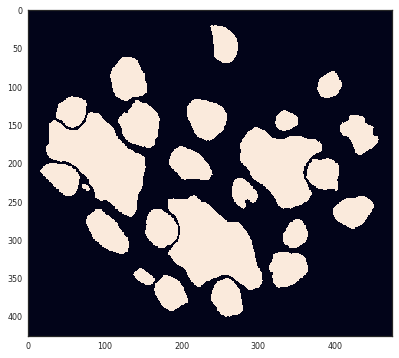

In [80]:
fig,ax=plt.subplots(1,figsize=(8,6))
imshow(removedimg[100])

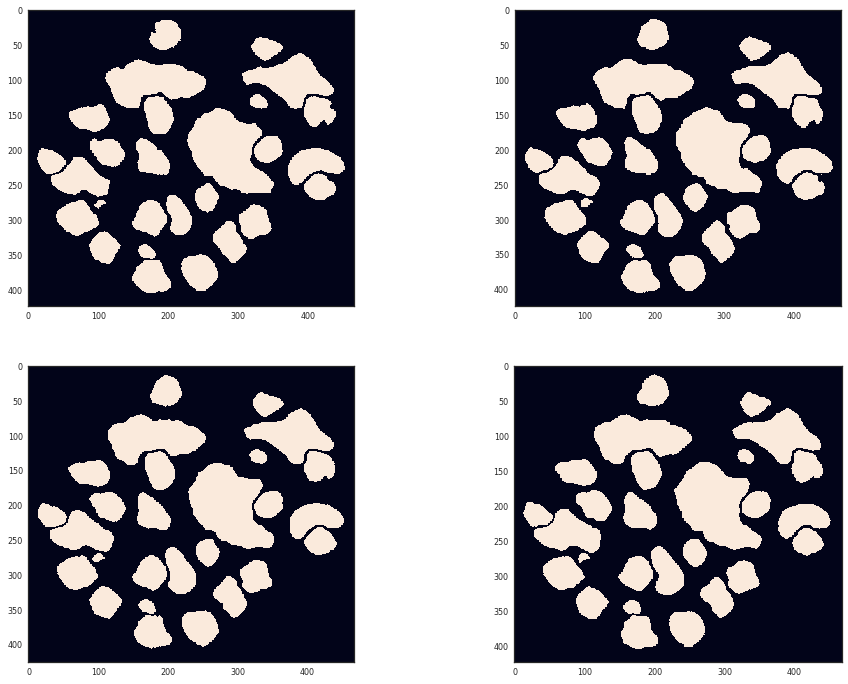

In [81]:
row = 2
fig,ax=plt.subplots(row,2,figsize=(16,6*row))
for i in range(row):
    for j in range(2):
        ax[i,j].imshow(removedimg[1+i*2+j])

In [14]:
emdata[1].shape

(999, 1745, 3)

In [22]:
emimg[10][(xmin-10): (xmax+10), (ymin-10): (ymax+10)]

array([[214, 197, 205, ..., 254, 254, 254],
       [217, 203, 212, ..., 255, 255, 254],
       [145, 211, 199, ..., 249, 254, 254],
       ...,
       [114, 104, 129, ..., 254, 254, 253],
       [152, 154, 134, ..., 254, 254, 253],
       [135, 186, 150, ..., 254, 253, 252]], dtype=uint8)

In [89]:
(xmin-10)

403

In [95]:
emimg[1].shape

(424, 466)

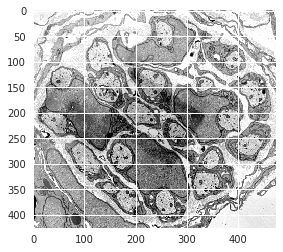

In [24]:
imshow(emimg[100],cmap='gray')

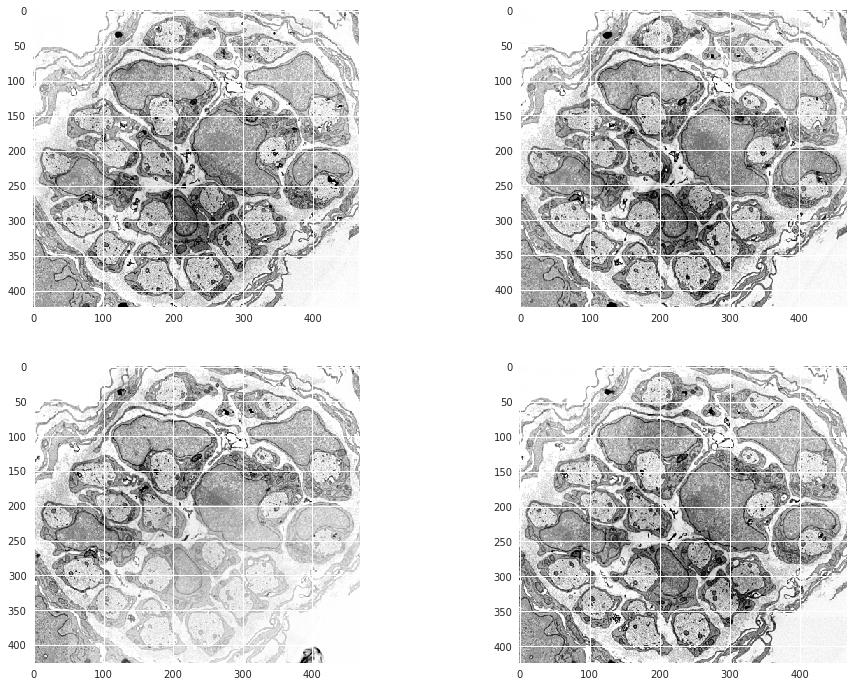

In [25]:
row = 2
fig,ax=plt.subplots(row,2,figsize=(16,6*row))
for i in range(row):
    for j in range(2):
        ax[i,j].imshow(emimg[1+i*2+j],cmap='gray')

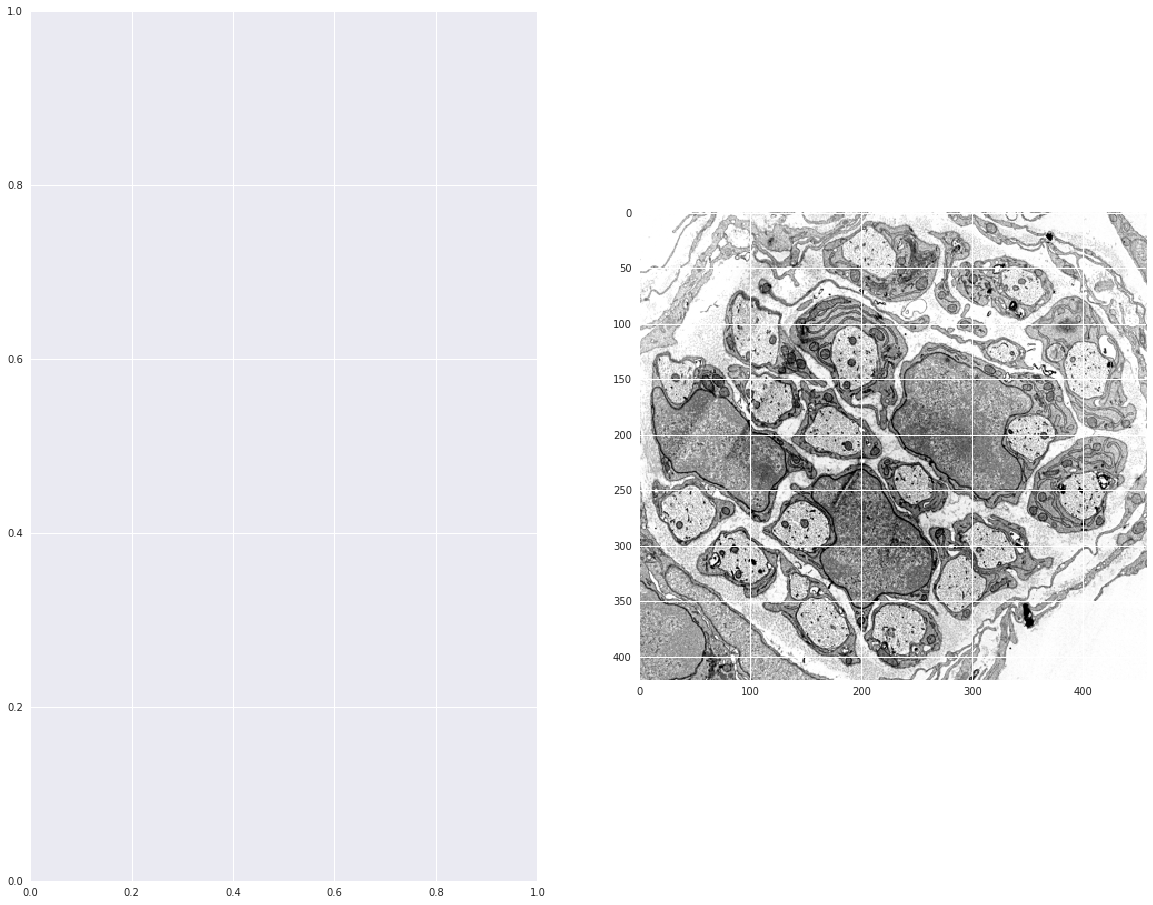

In [27]:
fig,ax=plt.subplots(1,2,figsize=(20,16))
#ax[0].imshow(removedimg[50])
ax[1].imshow(emimg[50],cmap='gray')

In [102]:
import cv2

In [33]:
ret,thresh = cv2.threshold(grayimg,0,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img=cv2.drawContours(image,contours,-1,(0,255,0),3)

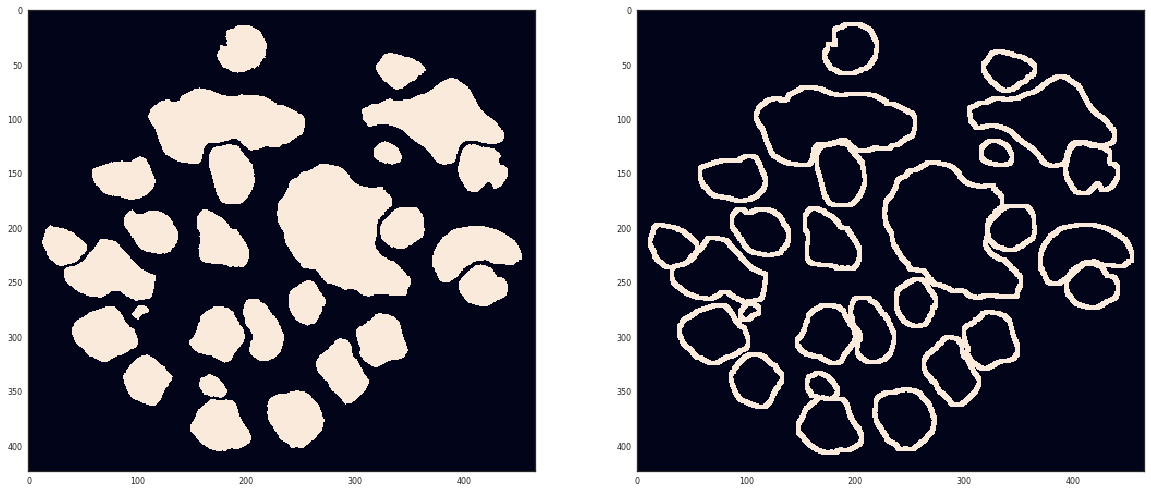

In [103]:
grayimg = np.uint8(removedimg[1] * 255)
fig,ax=plt.subplots(1,2,figsize=(20,16))
open0 = cv2.erode(grayimg, None, iterations = 1)
open1 = cv2.dilate(open0, None, iterations = 4)
ax[0].imshow(grayimg)
ax[1].imshow(open1-open0)

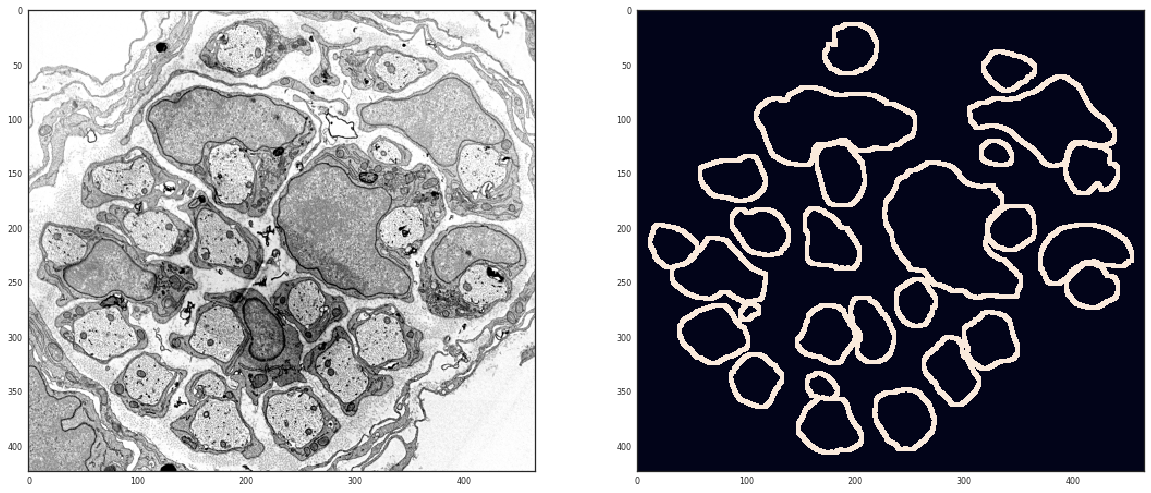

In [105]:
#grayimg = np.uint8(removedimg[0] * 255)
fig,ax=plt.subplots(1,2,figsize=(20,16))
open0 = cv2.erode(removedimg[1], None, iterations = 1)
open1 = cv2.dilate(open0, None, iterations = 4)
ax[0].imshow(emimg[1],cmap='gray')
ax[1].imshow(open1-open0)

In [107]:
binary_mask = {}
for i in tqdm(np.arange(1,1445)):
    if np.isin(i,np.arange(1192,1201)):
        print ('pass')
    else:
        open0 = cv2.erode(removedimg[i], None, iterations = 1)
        open1 = cv2.dilate(open0, None, iterations = 4)
        binary_mask[i] = open1-open0





  0%|          | 0/1444 [00:00<?, ?it/s]



  4%|▎         | 51/1444 [00:00<00:02, 494.07it/s]



  7%|▋         | 101/1444 [00:00<00:02, 497.03it/s]



 11%|█         | 157/1444 [00:00<00:02, 517.39it/s]



 15%|█▍        | 215/1444 [00:00<00:02, 532.96it/s]



 18%|█▊        | 266/1444 [00:00<00:02, 526.95it/s]



 22%|██▏       | 319/1444 [00:00<00:02, 526.47it/s]



 26%|██▌       | 372/1444 [00:00<00:02, 526.02it/s]



 30%|██▉       | 427/1444 [00:00<00:01, 528.67it/s]



 34%|███▍      | 489/1444 [00:00<00:01, 538.27it/s]



 39%|███▉      | 561/1444 [00:01<00:01, 555.61it/s]



 43%|████▎     | 620/1444 [00:01<00:01, 558.22it/s]



 47%|████▋     | 679/1444 [00:01<00:01, 558.55it/s]



 51%|█████     | 738/1444 [00:01<00:01, 550.84it/s]



 55%|█████▍    | 793/1444 [00:01<00:01, 538.85it/s]



 58%|█████▊    | 844/1444 [00:01<00:01, 528.06it/s]



 62%|██████▏   | 892/1444 [00:01<00:01, 518.98it/s]



 65%|██████▍   | 938/1444 [00:01<00:00, 508.02it/s]



 68%|██████▊   | 9

pass
pass
pass
pass
pass
pass
pass
pass
pass






 88%|████████▊ | 1270/1444 [00:02<00:00, 434.47it/s]



 90%|█████████ | 1300/1444 [00:03<00:00, 427.00it/s]



 92%|█████████▏| 1328/1444 [00:03<00:00, 420.84it/s]



 94%|█████████▍| 1356/1444 [00:03<00:00, 414.75it/s]



 96%|█████████▌| 1383/1444 [00:03<00:00, 409.95it/s]



 98%|█████████▊| 1411/1444 [00:03<00:00, 405.87it/s]



100%|█████████▉| 1440/1444 [00:03<00:00, 402.47it/s]



100%|██████████| 1444/1444 [00:03<00:00, 401.75it/s]

In [120]:
for i in tqdm(np.arange(1,1445)):
    if np.isin(i,np.arange(1192,1201)):
        print ('pass')
    else:
        if binary_mask[i].shape[0] >565:
            print (i)
        if binary_mask[i].shape[1] >875:
            print (i)





  0%|          | 0/1444 [00:00<?, ?it/s]



100%|██████████| 1444/1444 [00:00<00:00, 32552.78it/s]

pass
pass
pass
pass
pass
pass
pass
pass
pass
1220
1256
1289


In [123]:
binary_mask[1289].shape

(553, 876)

# 最大的binary mask shape

In [116]:
(565,877)

(530, 835)

In [124]:
i = 1
xnan = 565 - emimg[i].shape[0]
ynan = 877 - emimg[i].shape[1]
xleft = int(xnan/2)
xright = int(xnan - xleft)
yleft = int(ynan/2)
yright = int(ynan - yleft)

In [129]:
1444-(1201-1192)

1435

In [28]:
paddedem = np.ndarray([1435,565,877])
#paddedmaskmem = np.ndarray([1435,565,877])
count=0
for i in tqdm(np.arange(0,1434)):
    if np.isin(i,np.arange(1191,1201)):
        print ('pass')
        count+=1
    else:
        xnan = 565 - emimg[i+1+count].shape[0]
        ynan = 877 - emimg[i+1+count].shape[1]
        xleft = int(xnan/2)
        xright = int(xnan - xleft)
        yleft = int(ynan/2)
        yright = int(ynan - yleft)
        paddedem[i] = np.pad(emimg[i+1+count], ((xleft,xright),(yleft,yright)), 'reflect')
        #paddedmaskmem[i] = np.pad(binary_mask[i+1+count], ((xleft,xright),(yleft,yright)), 'reflect')
paddedmask = np.ndarray([1435,565,877])
count=0
for i in tqdm(np.arange(0,1434)):
    if np.isin(i,np.arange(1191,1201)):
        print ('pass')
        count+=1
    else:
        xnan = 565 - emimg[i+1+count].shape[0]
        ynan = 877 - emimg[i+1+count].shape[1]
        xleft = int(xnan/2)
        xright = int(xnan - xleft)
        yleft = int(ynan/2)
        yright = int(ynan - yleft)
        paddedem[i] = np.pad(emimg[i+1+count], ((xleft,xright),(yleft,yright)), 'reflect')
        paddedmask[i] = np.pad(removedimg[i+1+count], ((xleft,xright),(yleft,yright)), 'reflect')

 88%|████████▊ | 1260/1434 [00:02<00:00, 623.59it/s]

pass
pass
pass
pass
pass
pass
pass
pass
pass
pass


100%|██████████| 1434/1434 [00:02<00:00, 620.27it/s]


In [138]:
paddedmask = np.ndarray([1435,565,877])
count=0
for i in tqdm(np.arange(0,1434)):
    if np.isin(i,np.arange(1191,1201)):
        print ('pass')
        count+=1
    else:
        xnan = 565 - emimg[i+1+count].shape[0]
        ynan = 877 - emimg[i+1+count].shape[1]
        xleft = int(xnan/2)
        xright = int(xnan - xleft)
        yleft = int(ynan/2)
        yright = int(ynan - yleft)
        paddedem[i] = np.pad(emimg[i+1+count], ((xleft,xright),(yleft,yright)), 'reflect')
        paddedmask[i] = np.pad(removedimg[i+1+count], ((xleft,xright),(yleft,yright)), 'reflect')









  0%|          | 0/1434 [00:00<?, ?it/s]







  2%|▏         | 31/1434 [00:00<00:04, 297.84it/s]







  4%|▍         | 61/1434 [00:00<00:04, 298.81it/s]







  6%|▋         | 91/1434 [00:00<00:04, 298.98it/s]







  8%|▊         | 121/1434 [00:00<00:04, 298.08it/s]







 11%|█         | 151/1434 [00:00<00:04, 297.28it/s]







 13%|█▎        | 181/1434 [00:00<00:04, 297.09it/s]







 15%|█▍        | 211/1434 [00:00<00:04, 297.29it/s]







 17%|█▋        | 241/1434 [00:00<00:04, 297.16it/s]







 19%|█▉        | 271/1434 [00:00<00:03, 296.47it/s]







 21%|██        | 300/1434 [00:01<00:03, 295.37it/s]







 23%|██▎       | 329/1434 [00:01<00:03, 294.60it/s]







 25%|██▌       | 359/1434 [00:01<00:03, 294.30it/s]







 27%|██▋       | 389/1434 [00:01<00:03, 294.63it/s]







 29%|██▉       | 419/1434 [00:01<00:03, 294.78it/s]







 31%|███▏      | 449/1434 [00:01<00:03, 295.09it/s]







 33%|███▎      | 480/1434 [00:01<00:03, 295.99it/s]







 36

pass
pass
pass
pass
pass
pass
pass
pass
pass
pass










 89%|████████▉ | 1274/1434 [00:04<00:00, 277.72it/s]







 91%|█████████ | 1300/1434 [00:04<00:00, 276.76it/s]







 92%|█████████▏| 1325/1434 [00:04<00:00, 275.87it/s]







 94%|█████████▍| 1350/1434 [00:04<00:00, 274.97it/s]







 96%|█████████▌| 1375/1434 [00:05<00:00, 274.24it/s]







 98%|█████████▊| 1400/1434 [00:05<00:00, 273.65it/s]







 99%|█████████▉| 1425/1434 [00:05<00:00, 273.10it/s]







100%|██████████| 1434/1434 [00:05<00:00, 272.80it/s]

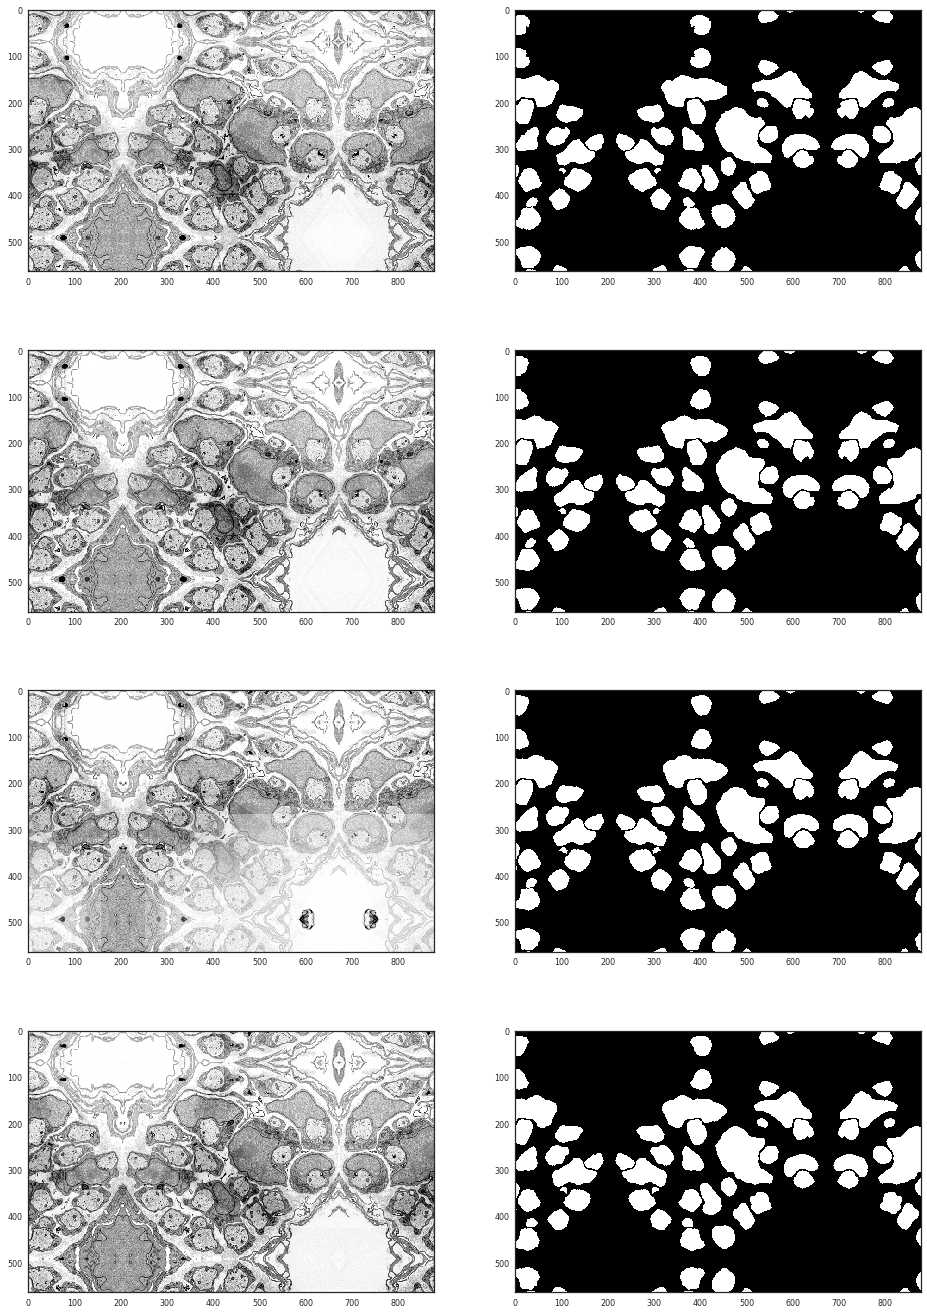

In [139]:
row = 4
fig,ax=plt.subplots(row,2,figsize=(16,6*row))
for i in range(row):
    for j in range(2):
        ax[i,0].imshow(paddedem[i],cmap='gray')
        ax[i,1].imshow(paddedmask[i],cmap='gray')

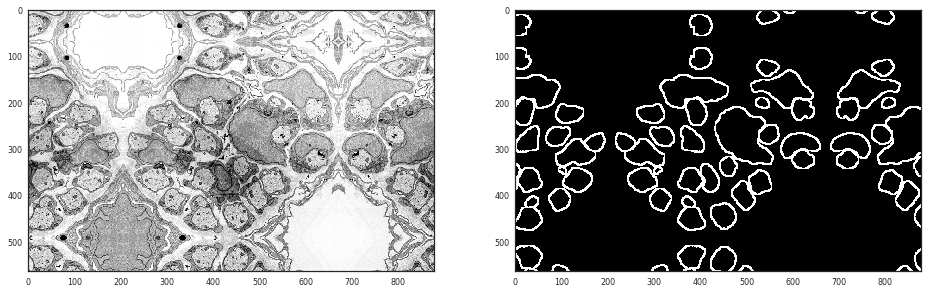

In [140]:
fig,ax=plt.subplots(1,2,figsize=(16,6*1))
ax[0].imshow(paddedem[0],cmap='gray')
ax[1].imshow(paddedmaskmem[0],cmap='gray')

In [141]:
paddedmask.shape,paddedem.shape

((1435, 565, 877), (1435, 565, 877))

In [145]:
with h5py.File('data/marco_1435_mask') as f:
    f.create_dataset('main',data= paddedmask,dtype =uint8)

In [144]:
with h5py.File('data/marco_1435_membrane') as f:
    f.create_dataset('main',data= paddedmaskmem,dtype =uint8)

In [29]:
with h5py.File('data/marco_1435_em') as f:
    f.create_dataset('main',data= paddedem,dtype =uint8)

In [32]:
with h5py.File('data/train_set/marco/marco_1435_mask') as f:
    ttttmask = f['main'][:100]

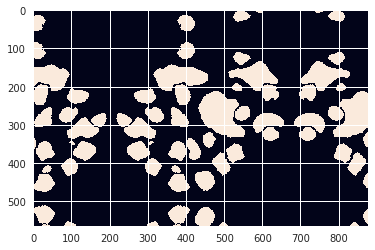

In [33]:
imshow(ttttmask[0])

In [34]:
np.unique(ttttmask[0])

array([0, 1], dtype=uint8)

In [89]:
with h5py.File('data/train_set/em_51') as f:
    f.create_dataset('main',data= paddedem,dtype = uint8)
with h5py.File('data/train_set/mask_51') as f:
    f.create_dataset('main',data= paddedmask,dtype =uint8)

In [37]:
with h5py.File('data/train_set/mask_51') as f:
    masktest = f['main'][:]

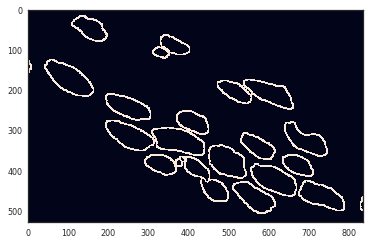

In [39]:
imshow(masktest[10])